In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
steer_data = pd.read_csv("data/steer_data.csv")

In [4]:
steer_data.head()

1.7640000581741333  1.7000000476837158  11.018577575683594  \
0               1.708                 1.7           10.984266   
1               1.708                 1.6           10.954857   
2               1.652                 1.6           10.925447   
3               1.652                 1.6           10.905841   
4               1.652                 1.6           10.896037   

   0.006666666666666667  11.81944465637207  11.81944465637207.1  \
0              0.013333          11.850000            11.830556   
1              0.020000          11.850000            11.830556   
2              0.026667          11.836111            11.844444   
3              0.033333          11.819445            11.805555   
4              0.040000          11.786111            11.819445   

   11.83055591583252  11.850000381469727  
0          11.811111           11.850000  
1          11.811111           11.850000  
2          11.811111           11.819445  
3          11.825000           11.811111  
4          11.811111           11.813889

## Why are the Column names fucked? :)

In [5]:
# Got the column name - Development Continue :) 
column_names = ['EPS Angle', 'Bad Angle', 'ZSS', 'Steer Command', 'wheel_speeds.fl', 'wheel_speeds.fr', 'wheel_speeds.rl', 'wheel_speeds.rr']

In [6]:
steer_data = pd.read_csv("data/steer_data.csv", names = column_names)

In [7]:
steer_data.head()

EPS Angle  Bad Angle        ZSS  Steer Command  wheel_speeds.fl  \
0      1.764        1.7  11.018578       0.006667        11.819445   
1      1.708        1.7  10.984266       0.013333        11.850000   
2      1.708        1.6  10.954857       0.020000        11.850000   
3      1.652        1.6  10.925447       0.026667        11.836111   
4      1.652        1.6  10.905841       0.033333        11.819445   

   wheel_speeds.fr  wheel_speeds.rl  wheel_speeds.rr  
0        11.819445        11.830556        11.850000  
1        11.830556        11.811111        11.850000  
2        11.830556        11.811111        11.850000  
3        11.844444        11.811111        11.819445  
4        11.805555        11.825000        11.811111

# Makes some sense now! Yaay! 

In [8]:
devl_dataset = steer_data.copy()
devl_dataset.shape

(52404, 8)

In [9]:
devl_dataset.isna().sum()

EPS Angle          0
Bad Angle          0
ZSS                0
Steer Command      0
wheel_speeds.fl    0
wheel_speeds.fr    0
wheel_speeds.rl    0
wheel_speeds.rr    0
dtype: int64

## Bach Gyaa 😣😣

In [10]:
train_dataset = devl_dataset.sample(frac = 0.8, random_state = 7)
test_dataset = devl_dataset.drop(train_dataset.index)

In [11]:
train_dataset.shape

(41923, 8)

In [12]:
test_dataset.shape

(10481, 8)

### Let's look at some Joint distributions 😁
Might take sometime.... :) The Magic is happening! 

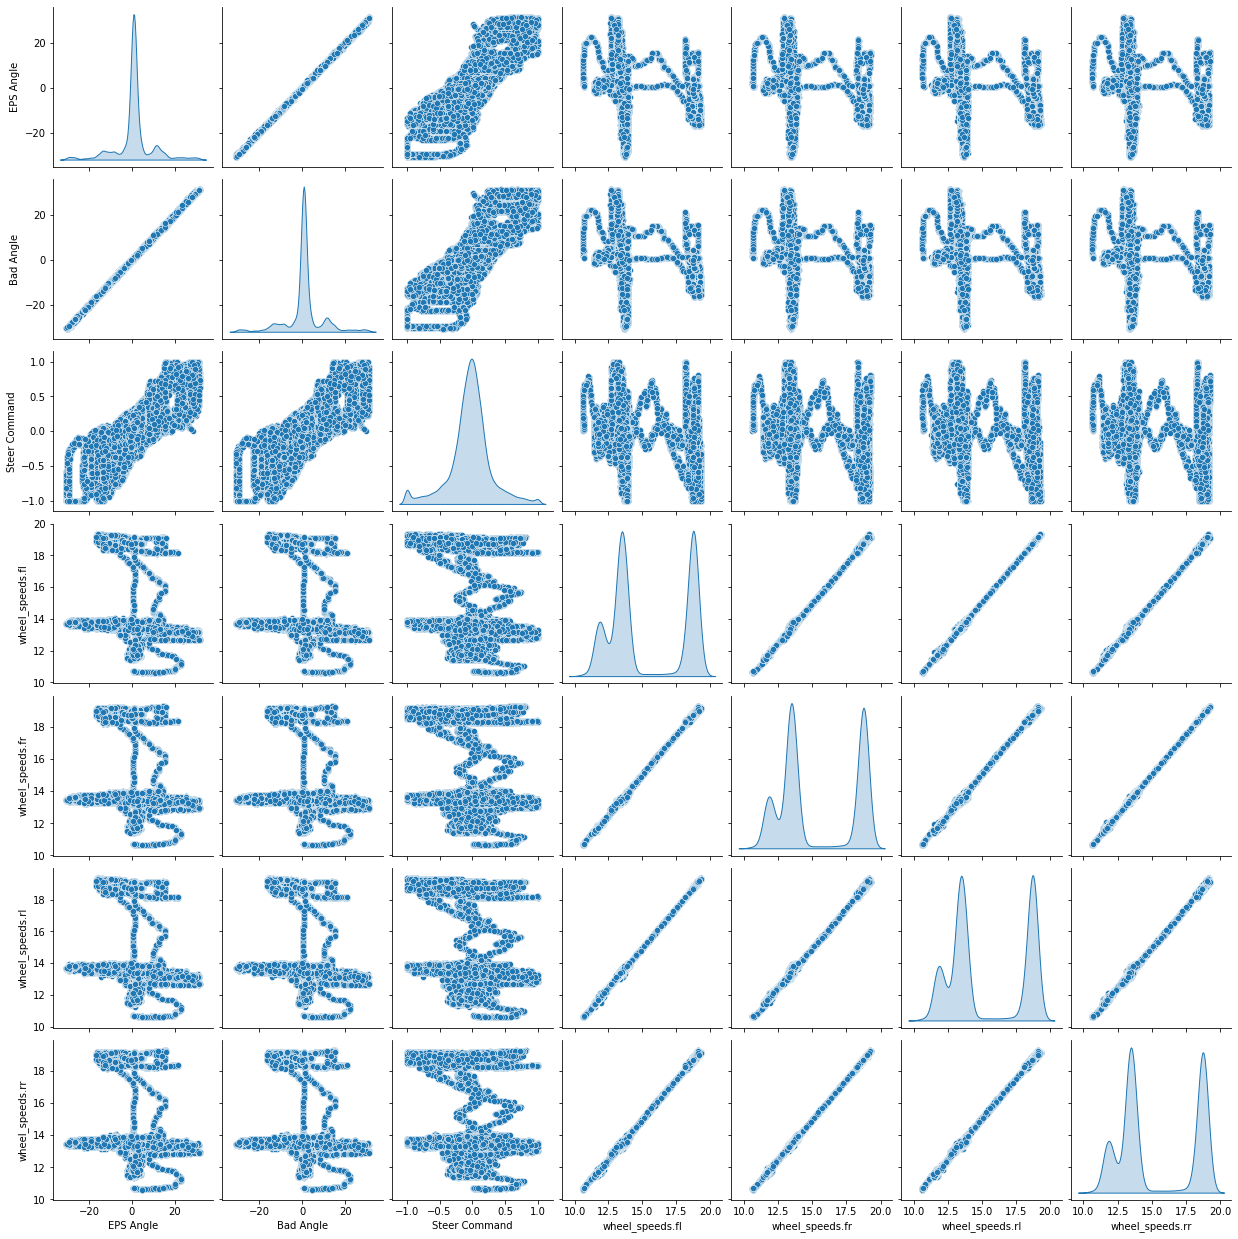

In [13]:
sns.pairplot(train_dataset[['EPS Angle', 'Bad Angle', 'Steer Command', 'wheel_speeds.fl', 'wheel_speeds.fr', 'wheel_speeds.rl', 'wheel_speeds.rr']], diag_kind="kde")

In [14]:
train_stats = train_dataset.describe()
train_stats

EPS Angle     Bad Angle           ZSS  Steer Command  \
count  41923.000000  41923.000000  41923.000000   41923.000000   
mean       0.896520      0.866517     10.158201      -0.039326   
std        8.539525      8.492761      8.813877       0.319315   
min      -30.604000    -30.700001    -22.322069      -1.000000   
25%       -0.364000     -0.200000      8.866777      -0.170667   
50%        0.868000      0.900000     10.116684      -0.026667   
75%        2.100000      2.000000     11.405803       0.108667   
max       31.556000     31.200001     41.830002       1.000000   

       wheel_speeds.fl  wheel_speeds.fr  wheel_speeds.rl  wheel_speeds.rr  
count     41923.000000     41923.000000     41923.000000     41923.000000  
mean         15.362052        15.363203        15.345483        15.350082  
std           2.838578         2.833246         2.836154         2.830927  
min          10.594444        10.636111        10.586111        10.613889  
25%          13.286111        13.325000        13.269444        13.313889  
50%          13.780556        13.730556        13.763889        13.719444  
75%          18.730556        18.719444        18.705555        18.711111  
max          19.361111        19.299999        19.344444        19.288889

## Does EPS effect Fuel Efficiency? 
### Me: I don't think so....... 2 seconds later...... Optimized path means better fuel efficiency
### Me: But the relation isn't that simple na? ..... Naah! Drop it!
### Me(again): Chal na EPS ko hi predict maarte hai

In [15]:
train_stats.pop("EPS Angle")

count    41923.000000
mean         0.896520
std          8.539525
min        -30.604000
25%         -0.364000
50%          0.868000
75%          2.100000
max         31.556000
Name: EPS Angle, dtype: float64

In [16]:
train_stats = train_stats.transpose() 
train_stats

count       mean       std        min        25%  \
Bad Angle        41923.0   0.866517  8.492761 -30.700001  -0.200000   
ZSS              41923.0  10.158201  8.813877 -22.322069   8.866777   
Steer Command    41923.0  -0.039326  0.319315  -1.000000  -0.170667   
wheel_speeds.fl  41923.0  15.362052  2.838578  10.594444  13.286111   
wheel_speeds.fr  41923.0  15.363203  2.833246  10.636111  13.325000   
wheel_speeds.rl  41923.0  15.345483  2.836154  10.586111  13.269444   
wheel_speeds.rr  41923.0  15.350082  2.830927  10.613889  13.313889   

                       50%        75%        max  
Bad Angle         0.900000   2.000000  31.200001  
ZSS              10.116684  11.405803  41.830002  
Steer Command    -0.026667   0.108667   1.000000  
wheel_speeds.fl  13.780556  18.730556  19.361111  
wheel_speeds.fr  13.730556  18.719444  19.299999  
wheel_speeds.rl  13.763889  18.705555  19.344444  
wheel_speeds.rr  13.719444  18.711111  19.288889

In [17]:
train_labels = train_dataset.pop("EPS Angle")
test_labels = test_dataset.pop("EPS Angle")

## Should we normalize it? 
### Is that a Question?! Look at the difference between min and max! 

In [18]:
def normalize(x):
    return (x - train_stats["mean"]) / train_stats["std"]

In [19]:
train_data = normalize(train_dataset)
test_data = normalize(test_dataset)

In [20]:
test_data.describe()

Bad Angle           ZSS  Steer Command  wheel_speeds.fl  \
count  10481.000000  10481.000000   10481.000000     10481.000000   
mean       0.005185      0.005412       0.004415         0.002112   
std        0.990565      0.990512       0.991319         0.997932   
min       -3.716873     -3.685129      -3.008543        -1.672726   
25%       -0.125580     -0.143741      -0.415496        -0.728395   
50%        0.003943     -0.004154       0.039644        -0.557144   
75%        0.133465      0.134876       0.461380         1.186687   
max        3.559912      3.593402       3.254855         1.400996   

       wheel_speeds.fr  wheel_speeds.rl  wheel_speeds.rr  
count     10481.000000     10481.000000     10481.000000  
mean          0.002305         0.002233         0.002313  
std           0.997929         0.997949         0.998010  
min          -1.667456        -1.671252        -1.662225  
25%          -0.719388        -0.730032        -0.719267  
50%          -0.574285        -0.557654        -0.574046  
75%           1.184592         1.184728         1.185291  
max           1.384599         1.405097         1.391349

### Dekho ab!! Looks more reliable! 

## Neural Network bana liya jaaye ab? 

In [39]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

## PyTorch Baby!! 

In [59]:
class EffReg(nn.Module):
    def __init__(self):
        super(EffReg, self).__init__()
        self.l1 = nn.Linear(7, 64)
        self.l2 = nn.Linear(64, 32)
        self.out = nn.Linear(32, 1)
    def forward(self, x):
        x = F.relu(self.l1(x))
        x = F.relu(self.l2(x))        
        x = self.out(x)  
        return x

``` Linear [64] --> Relu --> Linear [32] --> Relu --> Linear [1] ```

Simple!! 

In [76]:
!python --version

Python 3.8.0


In [77]:
!pip3 install torch==1.10.1+cu113 torchvision==0.11.2+cu113 torchaudio===0.10.1+cu113 -f https://download.pytorch.org/whl/cu113/torch_stable.html

^C


In [75]:
model = EffReg().to("cuda")
model

AssertionError: Torch not compiled with CUDA enabled

In [61]:
optimizer = optim.Adam(model.parameters())
# loss = F.mse_loss()      will use later

In [62]:
example_batch = train_data[:15]
example_batch.values.astype(np.float32)

array([[-0.4317226 , -0.36396554,  0.46764335,  1.1358008 ,  1.1267474 ,
         1.129881  ,  1.1283807 ],
       [-0.11380482, -0.14707778, -0.84349465,  1.2062589 ,  1.195377  ,
         1.1935438 ,  1.1990285 ],
       [ 3.2302194 ,  3.2486057 ,  1.689006  , -0.7704742 , -0.7037009 ,
        -0.7878177 , -0.6927739 ],
       [ 0.03926672,  0.04033548, -0.15452085,  1.2003868 ,  1.197338  ,
         1.2043167 ,  1.1990285 ],
       [-0.11380482, -0.12038393, -0.31319362,  1.119165  ,  1.1404732 ,
         1.129881  ,  1.1303426 ],
       [-3.6462247 , -3.6384146 , -3.0085425 , -0.5786725 , -0.6576212 ,
        -0.57822216, -0.66628087],
       [-1.7151685 , -1.7687309 , -2.9062405 ,  1.3628318 ,  1.3061646 ,
         1.3659208 ,  1.3069632 ],
       [ 0.6044539 ,  0.6754273 ,  1.2568315 , -0.6696805 , -0.69781846,
        -0.6967316 , -0.6780557 ],
       [-1.6209706 , -1.6636237 , -2.442749  ,  1.1935371 ,  1.1581206 ,
         1.1896257 ,  1.1372116 ],
       [-0.24332689, -0.2254

In [65]:
model(torch.tensor(example_batch.values.astype(np.float32)))

tensor([[-0.3190],
        [-0.3172],
        [-0.4958],
        [-0.3074],
        [-0.2959],
        [-0.1561],
        [-0.4277],
        [-0.2693],
        [-0.3879],
        [-0.2204],
        [-0.3109],
        [-0.1697],
        [-0.2443],
        [-0.2961],
        [-0.4176]], grad_fn=<AddmmBackward>)

In [66]:
from torch.utils.data import DataLoader

In [71]:
train_df = DataLoader((torch.tensor(train_data.values.astype(np.float32)), torch.tensor(train_labels.values.astype(np.float32))), batch_size = 16)
test_df = DataLoader((torch.tensor(test_data.values.astype(np.float32)), torch.tensor(test_labels.values.astype(np.float32))), batch_size = 16)

In [74]:
epochs = 1
for epoch in range(epochs):
    for x, y in zip(torch.tensor(train_data.values.astype(np.float32)), torch.tensor(train_labels.values.astype(np.float32))):
        x = x.to("cuda")
        y = y.to("cuda")

tensor([-0.4317, -0.3640,  0.4676,  1.1358,  1.1267,  1.1299,  1.1284]) tensor(-2.2680)
tensor([-0.1138, -0.1471, -0.8435,  1.2063,  1.1954,  1.1935,  1.1990]) tensor(-0.3640)
tensor([ 3.2302,  3.2486,  1.6890, -0.7705, -0.7037, -0.7878, -0.6928]) tensor(28.5880)
tensor([ 0.0393,  0.0403, -0.1545,  1.2004,  1.1973,  1.2043,  1.1990]) tensor(1.2600)
tensor([-0.1138, -0.1204, -0.3132,  1.1192,  1.1405,  1.1299,  1.1303]) tensor(-0.1400)
tensor([-3.6462, -3.6384, -3.0085, -0.5787, -0.6576, -0.5782, -0.6663]) tensor(-30.2120)
tensor([-1.7152, -1.7687, -2.9062,  1.3628,  1.3062,  1.3659,  1.3070]) tensor(-14.1960)
tensor([ 0.6045,  0.6754,  1.2568, -0.6697, -0.6978, -0.6967, -0.6781]) tensor(6.6920)
tensor([-1.6210, -1.6636, -2.4427,  1.1935,  1.1581,  1.1896,  1.1372]) tensor(-13.3560)
tensor([-0.2433, -0.2255,  0.1837, -0.6472, -0.6576, -0.6556, -0.6663]) tensor(-1.0360)
tensor([-0.1138, -0.0748, -0.1524,  1.2415,  1.2483,  1.2288,  1.2402]) tensor(0.2520)
tensor([-3.5520, -3.5461, -1.847

tensor([ 0.0275, -0.0292, -0.6013,  1.2063,  1.2111,  1.2131,  1.2049]) tensor(0.6440)
tensor([ 0.0039, -0.0214,  0.0605,  1.1299,  1.1405,  1.1318,  1.1343]) tensor(0.7560)
tensor([-0.0432, -0.0297,  0.0292, -0.5992, -0.5959, -0.6027, -0.6162]) tensor(0.6440)
tensor([1.3345, 1.4090, 2.0084, 1.0595, 1.1003, 1.0633, 1.1088]) tensor(12.7960)
tensor([-0.0196, -0.0742,  0.0167, -0.5483, -0.5410, -0.5341, -0.5426]) tensor(0.2520)
tensor([-0.0549, -0.0125,  0.3883,  0.2913,  0.3042,  0.3033,  0.2875]) tensor(0.8120)
tensor([-0.1491, -0.1193,  0.0793,  1.2483,  1.2434,  1.2406,  1.2402]) tensor(-0.0840)
tensor([ 2.1705,  2.2426,  2.7621, -0.7460, -0.7106, -0.7496, -0.7202]) tensor(19.7960)
tensor([-0.1138, -0.0948, -0.4907,  1.1544,  1.1620,  1.1563,  1.1529]) tensor(0.0840)
tensor([-2.3157, -2.3271, -1.8937, -0.6364, -0.6949, -0.6419, -0.6781]) tensor(-19.0120)
tensor([ 0.0157, -0.0108, -0.3195,  1.2797,  1.2875,  1.2846,  1.2824]) tensor(0.8120)
tensor([ 0.1335,  0.1204, -0.3090, -0.5434, -

tensor([ 0.0275,  0.0097,  0.0042, -0.7039, -0.7125, -0.6997, -0.6957]) tensor(1.0360)
tensor([-0.0314,  0.0109,  0.3633, -1.3097, -1.3194, -1.3138, -1.3247]) tensor(1.0360)
tensor([0.0039, 0.0604, 0.5428, 1.2023, 1.2091, 1.2073, 1.2049]) tensor(1.4280)
tensor([0.3807, 0.3862, 0.7015, 1.1886, 1.2238, 1.1916, 1.2030]) tensor(4.2280)
tensor([ 0.0275,  0.0459,  0.5553, -0.7127, -0.7086, -0.6987, -0.7085]) tensor(1.3160)
tensor([-0.2198, -0.1677,  0.3528,  1.2376,  1.2356,  1.2288,  1.2275]) tensor(-0.5320)
tensor([-0.7379, -0.7866, -0.2526, -0.7020, -0.7106, -0.7016, -0.7202]) tensor(-5.8520)
tensor([-1.0676, -1.0024, -0.1357, -0.5219, -0.5566, -0.5028, -0.5348]) tensor(-7.6440)
tensor([-1.1029, -1.0235,  0.2192, -0.5082, -0.5272, -0.5714, -0.6133]) tensor(-7.9240)
tensor([-0.0432, -0.0731, -0.0439, -0.3869, -0.3968, -0.3970, -0.3974]) tensor(0.3080)
tensor([-1.0911, -1.1253, -0.9583, -0.5131, -0.5390, -0.5273, -0.5652]) tensor(-8.7640)
tensor([-0.5141, -0.4719, -0.0126,  1.2239,  1.2179,

tensor([ 1.1579,  1.2087,  1.6493, -0.5415, -0.5115, -0.5273, -0.4906]) tensor(11.2280)
tensor([-0.0903, -0.1476, -0.3299, -1.0914, -1.0900, -1.0718, -1.0823]) tensor(-0.3640)
tensor([-0.2551, -0.1960,  0.3674,  1.2415,  1.2415,  1.2249,  1.2294]) tensor(-0.7560)
tensor([ 0.0510,  0.0609, -0.2485, -1.2970, -1.2949, -1.2903, -1.3002]) tensor(1.4280)
tensor([ 0.0981,  0.0709,  0.0772, -1.3116, -1.3174, -1.3157, -1.3139]) tensor(1.5400)
tensor([ 0.3572,  0.3184, -0.0334, -0.5523, -0.5410, -0.5674, -0.5701]) tensor(3.6120)
tensor([ 0.0393,  0.0971,  0.8142, -0.7372, -0.7351, -0.7261, -0.7281]) tensor(1.7640)
tensor([-0.5141, -0.5041, -1.2861,  1.2180,  1.2150,  1.2317,  1.2137]) tensor(-3.4440)
tensor([0.1923, 0.2433, 1.0146, 1.2023, 1.1934, 1.1984, 1.2059]) tensor(2.9960)
tensor([-0.1845, -0.1276,  0.2213, -0.7176, -0.7390, -0.7124, -0.7173]) tensor(-0.1960)
tensor([0.0039, 0.0259, 0.3758, 1.1984, 1.1973, 1.1984, 1.2010]) tensor(1.1480)
tensor([1.4169, 1.3522, 0.8977, 0.3265, 0.3659, 0.31

tensor([ 0.1335,  0.1149, -0.2714, -0.7127, -0.7037, -0.7055, -0.6888]) tensor(1.8760)
tensor([0.0157, 0.0431, 0.2046, 1.1867, 1.1797, 1.1700, 1.1794]) tensor(1.2600)
tensor([ 3.0654,  3.1140,  3.2549, -0.7284, -0.6576, -0.7496, -0.6731]) tensor(27.4120)
tensor([-1.2913, -1.2482, -0.9416,  1.3677,  1.3258,  1.3747,  1.3295]) tensor(-9.7720)
tensor([-0.0549, -0.0598, -0.1733,  0.1347,  0.1414,  0.1181,  0.1148]) tensor(0.4200)
tensor([ 0.1452,  0.1215,  0.0814, -1.1913, -1.1910, -1.1776, -1.1883]) tensor(1.9880)
tensor([ 0.0510,  0.0609, -0.2067, -1.2989, -1.2949, -1.2942, -1.3031]) tensor(1.4280)
tensor([ 0.0746,  0.1393,  0.6368, -1.2412, -1.2508, -1.2589, -1.2491]) tensor(2.1000)
tensor([-0.0078,  0.0303,  0.3090, -0.6961, -0.6978, -0.6879, -0.6781]) tensor(1.2040)
tensor([-0.1491, -0.1838,  0.1858, -0.5982, -0.5978, -0.6066, -0.6005]) tensor(-0.6440)
tensor([-2.0213, -2.0596, -2.6954,  1.2513,  1.1915,  1.2670,  1.2010]) tensor(-16.6600)
tensor([ 0.0275,  0.0592,  0.2672, -0.7137, -

tensor([-0.0314,  0.0153,  0.7725, -1.1795, -1.1851, -1.1845, -1.1834]) tensor(1.0360)
tensor([-0.0903, -0.0842, -0.7829,  1.1847,  1.1954,  1.1808,  1.1833]) tensor(0.1960)
tensor([-0.1256, -0.0759, -0.1065,  1.1231,  1.1267,  1.1142,  1.1195]) tensor(0.2520)
tensor([ 0.1452,  0.1343,  0.1858, -0.9133, -0.8978, -0.9044, -0.9116]) tensor(1.9880)
tensor([-2.0213, -1.9228, -0.7704, -0.6345, -0.6880, -0.6546, -0.6957]) tensor(-15.4840)
tensor([-0.0432,  0.0014, -0.0647,  1.1583,  1.1640,  1.1602,  1.1500]) tensor(0.9240)
tensor([ 0.0393,  0.0025, -0.2005,  1.0859,  1.1003,  1.0878,  1.0931]) tensor(0.9240)
tensor([ 0.1099,  0.1794,  0.9437, -0.6804, -0.6841, -0.6438, -0.6516]) tensor(2.4920)
tensor([-0.0196, -0.0614,  0.2067, -0.6345, -0.6351, -0.6331, -0.6398]) tensor(0.3640)
tensor([-0.3258, -0.2705, -0.0230, -0.7480, -0.7566, -0.7369, -0.7634]) tensor(-1.4840)
tensor([0.0039, 0.0364, 0.1691, 1.1886, 1.2042, 1.1828, 1.1941]) tensor(1.2600)
tensor([ 0.0628,  0.0937, -0.2735, -1.2764, -1.

tensor([-2.0213, -2.0601, -2.5179,  1.2552,  1.1866,  1.2484,  1.2010]) tensor(-16.7160)
tensor([-0.0903, -0.1165, -0.7704,  1.1916,  1.1915,  1.1896,  1.2030]) tensor(-0.0840)
tensor([ 1.2638,  1.1576,  0.3382, -0.3565, -0.3311, -0.3530, -0.3307]) tensor(11.1160)
tensor([ 1.1225,  1.1131,  1.5470, -0.1735, -0.1507, -0.1835, -0.1502]) tensor(10.3880)
tensor([-0.0078,  0.0448,  0.2067,  1.2425,  1.2346,  1.2425,  1.2432]) tensor(1.3160)
tensor([ 0.0393,  0.0804,  0.1482, -0.7049, -0.7066, -0.6997, -0.7193]) tensor(1.5960)
tensor([-2.7867, -2.8142, -3.0085, -0.5112, -0.5674, -0.4969, -0.5740]) tensor(-23.0440)
tensor([ 0.1688,  0.1627, -0.0961, -1.0366, -1.0370, -1.0317, -1.0293]) tensor(2.3240)
tensor([ 0.0510,  0.0731,  0.5699, -1.2950, -1.2772, -1.2893, -1.2854]) tensor(1.5400)
tensor([ 0.0510,  0.0948,  0.7286, -1.6532, -1.6498, -1.6428, -1.6465]) tensor(1.6520)
tensor([ 0.1099,  0.0681, -0.0126, -0.6472, -0.6508, -0.6546, -0.6516]) tensor(1.4840)
tensor([1.2638, 1.2927, 1.7725, 1.24

tensor([-0.2904, -0.3200,  0.2422, -1.2480, -1.2576, -1.2521, -1.2629]) tensor(-1.8760)
tensor([ 0.0275,  0.0031, -0.0167, -0.7127, -0.7125, -0.7193, -0.7193]) tensor(0.9240)
tensor([-0.3140, -0.2516,  0.1232, -0.7000, -0.7155, -0.6899, -0.7026]) tensor(-1.3720)
tensor([ 0.0393,  0.0298, -0.2359,  1.0859,  1.0767,  1.0878,  1.0882]) tensor(1.1480)
tensor([1.4051, 1.4668, 1.7475, 1.0614, 1.0964, 1.0662, 1.1038]) tensor(13.3560)
tensor([-0.1138, -0.1215, -0.8727,  1.1847,  1.1738,  1.1877,  1.1794]) tensor(-0.1400)
tensor([0.0039, 0.0298, 0.2505, 1.1564, 1.1689, 1.1632, 1.1588]) tensor(1.2040)
tensor([-0.4788, -0.5186, -0.7892, -0.6873, -0.6968, -0.6860, -0.7045]) tensor(-3.6120)
tensor([ 0.0393,  0.0882,  0.7224, -0.6844, -0.6802, -0.6752, -0.6800]) tensor(1.7080)
tensor([-1.4914, -1.5407, -1.9438, -0.5219, -0.5557, -0.5234, -0.5603]) tensor(-12.2360)
tensor([ 0.0275,  0.0570,  0.4760, -0.7176, -0.7263, -0.7124, -0.6977]) tensor(1.4280)
tensor([-0.1138, -0.0753, -0.3654,  1.1544,  1.153

tensor([0.4161, 0.4708, 1.0501, 1.1847, 1.2042, 1.2043, 1.2206]) tensor(4.9000)
tensor([-0.1256, -0.0726,  0.1190,  1.2444,  1.2503,  1.2406,  1.2608]) tensor(0.2520)
tensor([-0.0314,  0.0120,  0.2589,  1.2072,  1.2199,  1.2161,  1.2167]) tensor(1.0360)
tensor([-1.7623, -1.8060, -2.6139,  1.1975,  1.1562,  1.2073,  1.1549]) tensor(-14.5880)
tensor([ 1.2167,  1.1815,  1.2005, -0.7049, -0.6910, -0.6997, -0.6761]) tensor(11.0040)
tensor([-0.0196, -0.0709, -0.1796, -1.2852, -1.2822, -1.2746, -1.2825]) tensor(0.3080)
tensor([-0.0078,  0.0309,  0.4217, -0.6667, -0.6596, -0.6370, -0.6447]) tensor(1.2040)
tensor([ 0.0039, -0.0659, -0.6723, -1.1100, -1.1214, -1.1140, -1.1059]) tensor(0.4760)
tensor([-2.7278, -2.6963, -1.1734, -0.6824, -0.7459, -0.6732, -0.7330]) tensor(-22.2040)
tensor([-0.0314,  0.0353,  0.7098, -0.7157, -0.7145, -0.6987, -0.7173]) tensor(1.1480)
tensor([-0.1609, -0.1827, -0.1462, -0.4867, -0.5057, -0.4901, -0.4985]) tensor(-0.7000)
tensor([ 0.0393,  0.0225, -0.2568, -1.2265, 

tensor([-0.2904, -0.2294,  0.1733, -1.3821, -1.3831, -1.3804, -1.3885]) tensor(-1.0920)
tensor([-0.5141, -0.4874, -0.7934,  1.2249,  1.2218,  1.2131,  1.2147]) tensor(-3.3320)
tensor([-0.3140, -0.3328,  0.2693, -1.3566, -1.3773, -1.3696, -1.3639]) tensor(-1.9880)
tensor([ 0.1688,  0.2016,  0.5073, -1.1580, -1.1625, -1.1551, -1.1549]) tensor(2.6600)
tensor([ 1.2167,  1.1993,  0.9917, -0.6981, -0.6792, -0.6840, -0.6555]) tensor(11.1720)
tensor([ 0.0275,  0.0025, -0.0126, -0.5258, -0.5233, -0.5253, -0.5250]) tensor(0.9240)
tensor([ 0.0628,  0.0420, -0.7120, -1.2921, -1.2880, -1.2726, -1.2756]) tensor(1.2600)
tensor([1.5700, 1.5797, 1.1295, 0.9782, 1.0316, 0.9781, 1.0371]) tensor(14.3080)
tensor([-0.0549, -0.0865, -0.4364,  1.1916,  1.1954,  1.1955,  1.1941]) tensor(0.1960)
tensor([ 1.3698,  1.2983,  0.7391, -0.6951, -0.6792, -0.7036, -0.6839]) tensor(11.9000)
tensor([ 0.1335,  0.2022,  1.0689, -0.6785, -0.6704, -0.6556, -0.6555]) tensor(2.6600)
tensor([ 0.0393,  0.0859,  0.6263, -0.7245, 

tensor([ 0.5574,  0.4897, -0.2109,  0.6847,  0.6963,  0.6764,  0.7045]) tensor(5.0680)
tensor([-0.0314, -0.0386, -0.4364, -0.7441, -0.7459, -0.7369, -0.7438]) tensor(0.5880)
tensor([ 2.9359,  2.9672,  2.6953, -0.8126, -0.7331, -0.7957, -0.7350]) tensor(26.1800)
tensor([-3.2106, -3.2313, -3.0085, -0.5571, -0.6380, -0.5449, -0.6319]) tensor(-26.7400)
tensor([-0.4553, -0.5319, -1.5325,  1.3560,  1.3434,  1.3679,  1.3443]) tensor(-3.6680)
tensor([-0.3258, -0.3768, -1.0627,  1.2112,  1.2042,  1.2092,  1.2167]) tensor(-2.3800)
tensor([-0.1256, -0.1132, -0.4009,  1.1280,  1.1375,  1.1211,  1.1343]) tensor(-0.0840)
tensor([-0.0196,  0.0503,  0.2526,  0.3412,  0.3395,  0.3209,  0.3267]) tensor(1.3720)
tensor([-1.9624, -2.0156, -1.9646,  1.4010,  1.3346,  1.3836,  1.3295]) tensor(-16.3240)
tensor([-0.1491, -0.1788, -0.7308,  1.2092,  1.2238,  1.2073,  1.2137]) tensor(-0.6440)
tensor([-0.5612, -0.5008,  0.2902, -0.5454, -0.5674, -0.5361, -0.5348]) tensor(-3.4440)
tensor([ 0.8517,  0.9668,  2.4051

tensor([-1.6916, -1.6291, -0.7412,  1.1691,  1.1316,  1.1720,  1.1284]) tensor(-13.0760)
tensor([ 0.2865,  0.3123,  0.0814, -1.2764, -1.2488, -1.2550, -1.2717]) tensor(3.6120)
tensor([-0.5730, -0.6265, -1.2297,  1.2180,  1.2111,  1.2317,  1.1990]) tensor(-4.5080)
tensor([-0.1256, -0.1059, -0.1587,  1.1387,  1.1267,  1.1426,  1.1323]) tensor(-0.0280)
tensor([ 0.0510,  0.0353, -0.3529, -0.6227, -0.6223, -0.6292, -0.6378]) tensor(1.2040)
tensor([-0.0314, -0.0909, -0.2067,  1.1808,  1.1866,  1.1779,  1.1794]) tensor(0.1400)
tensor([-0.0078,  0.0453,  0.6430, -0.6775, -0.6841, -0.6820, -0.6869]) tensor(1.3160)
tensor([-0.4317, -0.4529, -0.1545, -0.8302, -0.8233, -0.8074, -0.8174]) tensor(-3.0520)
tensor([-0.0314, -0.0331,  0.2985, -0.7264, -0.7243, -0.7281, -0.7350]) tensor(0.6440)
tensor([-0.0078,  0.0253,  0.5010,  1.2072,  1.2003,  1.2024,  1.2059]) tensor(1.1480)
tensor([ 0.0393, -0.0325, -0.4886,  1.2112,  1.2150,  1.1965,  1.2049]) tensor(0.6440)
tensor([ 0.0275,  0.0637, -0.1065, -1.

tensor([-1.1147, -1.0741, -0.8372, -0.4886, -0.5145, -0.5048, -0.5348]) tensor(-8.3160)
tensor([ 3.2891,  3.3315,  3.2444, -0.7705, -0.6821, -0.7761, -0.6938]) tensor(29.3160)
tensor([0.0157, 0.0726, 0.6013, 1.2943, 1.3032, 1.3101, 1.3070]) tensor(1.5400)
tensor([-1.7740, -1.8305, -2.9355,  1.1975,  1.1513,  1.1955,  1.1549]) tensor(-14.7000)
tensor([-0.0314,  0.0114,  0.4468, -1.3204, -1.3106, -1.3157, -1.3198]) tensor(1.0360)
tensor([0.0393, 0.0848, 0.7349, 1.1955, 1.1915, 1.1935, 1.1941]) tensor(1.6520)
tensor([0.0039, 0.0476, 0.4426, 1.1798, 1.2042, 1.1965, 1.2010]) tensor(1.3160)
tensor([-0.0314, -0.0442,  0.4823, -0.6168, -0.6272, -0.6282, -0.6310]) tensor(0.5320)
tensor([-0.1609, -0.1782, -0.2756,  1.1975,  1.1954,  1.1896,  1.1990]) tensor(-0.6440)
tensor([0.0275, 0.0064, 0.0188, 1.2836, 1.2709, 1.2729, 1.2824]) tensor(0.9800)
tensor([ 1.1461,  1.1865,  1.1691, -0.5112, -0.4880, -0.5430, -0.5368]) tensor(11.0600)
tensor([ 1.2050,  1.1604,  1.0146, -0.6697, -0.6439, -0.6703, -0.

tensor([-0.4317, -0.4830, -0.7120, -0.9417, -0.9508, -0.9592, -0.9577]) tensor(-3.2760)
tensor([-0.0196,  0.0509,  0.8163, -1.1825, -1.1831, -1.1884, -1.1814]) tensor(1.3720)
tensor([-1.7269, -1.6903, -1.1066,  1.1094,  1.0718,  1.1074,  1.0705]) tensor(-13.5240)
tensor([-1.3973, -1.3533, -1.0669,  1.1916,  1.1464,  1.1955,  1.1549]) tensor(-10.6680)
tensor([ 1.3463,  1.4117,  1.9020, -0.7039, -0.6704, -0.6879, -0.6643]) tensor(12.8520)
tensor([-0.0078,  0.0398,  0.5136,  1.2063,  1.2081,  1.2004,  1.2030]) tensor(1.2600)
tensor([-0.2787, -0.3211, -0.8351, -0.7127, -0.7243, -0.7300, -0.7222]) tensor(-1.8200)
tensor([1.2638, 1.2149, 1.5846, 1.2415, 1.2944, 1.2445, 1.2981]) tensor(11.2840)
tensor([ 0.1335,  0.1360, -0.0794, -0.5434, -0.5390, -0.5488, -0.5426]) tensor(2.1000)
tensor([-0.9498, -1.0163, -1.9438,  1.3804,  1.3405,  1.3816,  1.3492]) tensor(-7.8120)
tensor([ 3.9425e-03, -8.1754e-04,  2.5260e-01,  1.1534e+00,  1.1532e+00,
         1.1602e+00,  1.1608e+00]) tensor(0.9240)
tenso

tensor([ 0.0628,  0.0898,  0.1440, -0.7088, -0.7086, -0.7075, -0.7153]) tensor(1.6520)
tensor([ 0.0393,  0.0570,  0.1440, -0.6071, -0.6066, -0.6154, -0.6054]) tensor(1.3720)
tensor([-1.0676, -1.0046, -0.3236, -0.5239, -0.5566, -0.4960, -0.5191]) tensor(-7.7000)
tensor([-0.3493, -0.3156,  0.3737, -0.6100, -0.6204, -0.5841, -0.5829]) tensor(-1.8200)
tensor([-1.5268, -1.4729, -0.6138,  1.0614,  1.0062,  1.0554,  0.9910]) tensor(-11.6760)
tensor([-0.5730, -0.5213,  0.3111, -0.6951, -0.7057, -0.6909, -0.7173]) tensor(-3.6120)
tensor([ 0.2983,  0.2283, -0.0126,  1.1955,  1.2169,  1.2053,  1.2079]) tensor(2.8840)
tensor([-0.1609, -0.1209,  0.0814,  1.1828,  1.1846,  1.2004,  1.1902]) tensor(-0.1400)
tensor([-0.1138, -0.0642, -0.1065,  1.0967,  1.0983,  1.1083,  1.0999]) tensor(0.3640)
tensor([ 0.0039, -0.0030, -0.0877,  1.2023,  1.2042,  1.1896,  1.2030]) tensor(0.8680)
tensor([ 0.3336,  0.4229,  1.4865, -0.7137, -0.7194, -0.7144, -0.7202]) tensor(4.4520)
tensor([-2.5983, -2.4900, -0.8038, -0

tensor([ 0.0510,  0.0737, -0.0460,  1.2444,  1.2503,  1.2396,  1.2432]) tensor(1.5400)
tensor([ 1.3580,  1.3745,  0.8309, -0.5131, -0.4792, -0.5273, -0.4769]) tensor(12.5720)
tensor([-0.0432, -0.0637,  0.3403, -0.7441, -0.7527, -0.7516, -0.7399]) tensor(0.3640)
tensor([-3.5520, -3.5428, -1.7120, -0.6031, -0.6910, -0.6115, -0.7134]) tensor(-29.4280)
tensor([-0.0549, -0.0069,  0.5407, -0.5855, -0.5910, -0.5802, -0.5868]) tensor(0.8680)
tensor([-1.4797, -1.5135, -0.7328, -0.5376, -0.5694, -0.5253, -0.5691]) tensor(-12.0680)
tensor([ 0.0393,  0.0882,  0.7349, -0.5679, -0.5694, -0.5645, -0.5701]) tensor(1.6520)
tensor([-0.2551, -0.2394,  0.4301,  1.1847,  1.1738,  1.1691,  1.1657]) tensor(-1.1480)
tensor([-0.1256, -0.1504, -0.9270,  1.1798,  1.1777,  1.1759,  1.1873]) tensor(-0.3640)
tensor([-0.0903, -0.0448,  0.4363, -1.0807, -1.0723, -1.0699, -1.0862]) tensor(0.5320)
tensor([ 0.0275, -0.0097,  0.3048,  1.2092,  1.2081,  1.2053,  1.2137]) tensor(0.8120)
tensor([ 1.1932,  1.2627,  2.0398, -

tensor([-0.1138, -0.0570,  0.2693,  1.1710,  1.1777,  1.1740,  1.1696]) tensor(0.4200)
tensor([ 0.0039, -0.0514, -0.4781,  1.2072,  1.2179,  1.2073,  1.2118]) tensor(0.4760)
tensor([ 0.0864,  0.1443,  0.4927, -1.2813, -1.2733, -1.2903, -1.2845]) tensor(2.1560)
tensor([ 0.0746,  0.0476, -0.2861, -1.2725, -1.2665, -1.2765, -1.2766]) tensor(1.3720)
tensor([-0.6083, -0.5614, -0.0126,  1.0898,  1.0611,  1.0731,  1.0528]) tensor(-3.9480)
tensor([-0.1256, -0.1048, -0.0460,  1.2953,  1.2944,  1.2934,  1.3070]) tensor(0.0280)
tensor([ 0.0039, -0.0030,  0.4322,  1.3296,  1.3473,  1.3375,  1.3462]) tensor(0.8680)
tensor([ 1.2638,  1.2126,  0.5971, -0.7401, -0.7106, -0.7339, -0.7114]) tensor(11.2280)
tensor([ 0.0157, -0.0192, -0.3195,  1.1143,  1.1179,  1.1191,  1.1195]) tensor(0.7560)
tensor([ 0.0393,  0.0159, -0.1650,  1.0742,  1.0944,  1.0819,  1.0862]) tensor(1.0360)
tensor([ 1.3934,  1.4067,  0.7913, -0.7000, -0.6978, -0.6948, -0.6673]) tensor(12.8520)
tensor([0.0275, 0.0709, 0.4864, 1.0301, 

tensor([ 0.3572,  0.3178,  0.0501, -0.5454, -0.5390, -0.5577, -0.5407]) tensor(3.6120)
tensor([ 0.0157, -0.0158, -0.2130,  1.3031,  1.3032,  1.2836,  1.2913]) tensor(0.7560)
tensor([-1.3502, -1.3972, -1.1692, -0.6844, -0.7213, -0.6820, -0.7261]) tensor(-11.0600)
tensor([-0.1609, -0.2071, -0.1149, -1.2089, -1.2086, -1.2041, -1.2050]) tensor(-0.8680)
tensor([-0.0785, -0.1237, -0.5220, -1.0680, -1.0772, -1.0562, -1.0705]) tensor(-0.1960)
tensor([ 0.0039, -0.0042,  0.4113,  1.3296,  1.3473,  1.3375,  1.3462]) tensor(0.8680)
tensor([ 0.2748,  0.2311,  0.0605, -0.5366, -0.5341, -0.5341, -0.5319]) tensor(2.8840)
tensor([1.5935, 1.6703, 2.3613, 0.9949, 1.0503, 0.9977, 1.0548]) tensor(15.0360)
tensor([-0.0903, -0.1165, -0.7078,  1.1828,  1.1905,  1.1808,  1.1833]) tensor(-0.0840)
tensor([-0.0196, -0.0536, -0.2568, -1.2461, -1.2537, -1.2501, -1.2491]) tensor(0.4760)
tensor([ 0.1335,  0.2077,  1.1879, -0.6824, -0.6753, -0.6791, -0.6849]) tensor(2.6600)
tensor([-1.0322, -0.9735, -0.1023, -0.6364, 

tensor([ 0.8046,  0.7210, -0.2526, -0.7705, -0.7321, -0.7604, -0.7369]) tensor(7.0280)
tensor([-0.1491, -0.1871,  0.0605, -0.5894, -0.5998, -0.5929, -0.5868]) tensor(-0.7000)
tensor([ 3.5246,  3.5567,  2.1588, -0.7773, -0.6664, -0.7878, -0.7134]) tensor(31.2200)
tensor([ 0.0393, -0.0186, -0.2401, -0.6452, -0.6537, -0.6527, -0.6447]) tensor(0.7560)
tensor([-0.0314, -0.0264,  0.3716, -1.1756, -1.1655, -1.1776, -1.1726]) tensor(0.7000)
tensor([-0.1138, -0.1159, -0.0334,  1.1916,  1.1993,  1.1984,  1.1902]) tensor(-0.0840)
tensor([-1.6681, -1.7092, -1.8101,  1.0653,  0.9993,  1.0682,  1.0047]) tensor(-13.7480)
tensor([-0.1256, -0.1426, -0.2714,  1.1710,  1.1601,  1.1759,  1.1696]) tensor(-0.3080)
tensor([ 3.1478,  3.1869,  2.6390, -0.8537, -0.7831, -0.8515, -0.7860]) tensor(27.9720)
tensor([ 2.8299,  2.8771,  2.3884, -0.6785, -0.6204, -0.6840, -0.6486]) tensor(25.4520)
tensor([ 1.2992,  1.2466,  0.6535, -0.5239, -0.4900, -0.5185, -0.4946]) tensor(11.4520)
tensor([1.4640, 1.5335, 1.6347, 1.

tensor([ 0.2277,  0.1655, -0.4405, -1.2588, -1.2508, -1.2501, -1.2432]) tensor(2.4920)
tensor([ 3.2302,  3.2564,  2.0544, -0.7666, -0.6949, -0.7653, -0.6996]) tensor(28.7000)
tensor([ 1.1579,  1.2110,  1.8331, -0.7000, -0.6861, -0.6928, -0.6781]) tensor(11.2280)
tensor([-2.6454, -2.6863, -2.9918, -0.5640, -0.6361, -0.5733, -0.6359]) tensor(-21.8120)
tensor([-0.1491, -0.1065,  0.1106,  1.2503,  1.2483,  1.2552,  1.2501]) tensor(-0.0280)
tensor([ 0.0157,  0.0704, -0.0146,  0.4870,  0.4826,  0.4776,  0.4768]) tensor(1.5400)
tensor([ 0.2277,  0.2505,  0.4447, -1.3234, -1.3194, -1.3167, -1.3159]) tensor(3.0520)
tensor([ 0.1335,  0.1855,  0.8748, -1.3381, -1.3478, -1.3294, -1.3355]) tensor(2.4920)
tensor([ 0.0039,  0.0042, -0.1483,  1.1984,  1.2062,  1.1955,  1.1971]) tensor(0.9800)
tensor([-1.5621, -1.6119, -2.3008,  1.3560,  1.3140,  1.3718,  1.3207]) tensor(-12.9080)
tensor([ 0.0039, -0.0676, -0.0230,  1.0565,  1.0591,  1.0633,  1.0666]) tensor(0.3080)
tensor([ 2.0881,  2.1403,  2.8060, -

tensor([ 0.0039, -0.0169, -0.1065,  1.2464,  1.2591,  1.2572,  1.2579]) tensor(0.7560)
tensor([-0.4553, -0.5041, -0.7036, -0.5591, -0.5743, -0.5586, -0.5790]) tensor(-3.4440)
tensor([-0.1138, -0.0620,  0.1900,  1.2601,  1.2552,  1.2621,  1.2628]) tensor(0.3640)
tensor([ 0.0039, -0.0264, -0.3069, -1.2793, -1.2929, -1.2814, -1.2933]) tensor(0.7000)
tensor([-1.2913, -1.3333, -1.6807, -0.5415, -0.5694, -0.5381, -0.5721]) tensor(-10.5000)
tensor([-0.0314,  0.0242,  0.7641, -0.7460, -0.7419, -0.7369, -0.7487]) tensor(1.0920)
tensor([-0.1256, -0.0870,  0.1190,  1.1211,  1.1209,  1.1211,  1.1372]) tensor(0.1960)
tensor([ 0.0157, -0.0047, -0.1483, -0.7636, -0.7586, -0.7349, -0.7507]) tensor(0.8680)
tensor([ 0.9341,  1.0447,  2.3007, -0.7088, -0.6998, -0.7163, -0.6977]) tensor(9.3240)
tensor([-0.1256, -0.1193, -0.0689,  1.2112,  1.2169,  1.2180,  1.2187]) tensor(-0.1400)
tensor([-0.1962, -0.2472, -0.3424, -0.7372, -0.7498, -0.7457, -0.7507]) tensor(-1.2600)
tensor([-0.1491, -0.1832, -0.1065, -0.

tensor([-1.6681, -1.7087, -1.7788,  1.0702,  1.0238,  1.0554,  1.0224]) tensor(-13.7480)
tensor([-1.3502, -1.3911, -1.3905, -0.6736, -0.7233, -0.6634, -0.7085]) tensor(-11.0040)
tensor([-0.2080, -0.1476,  0.3319,  1.2307,  1.2346,  1.2249,  1.2402]) tensor(-0.3640)
tensor([-0.2551, -0.2411,  0.4280,  1.1759,  1.1640,  1.1779,  1.1765]) tensor(-1.2040)
tensor([-0.2904, -0.3467, -0.9479, -0.7137, -0.7302, -0.7251, -0.7291]) tensor(-2.1000)
tensor([ 0.0628,  0.0659, -0.0480, -1.3586, -1.3635, -1.4244, -1.3443]) tensor(1.5400)
tensor([-2.0213, -2.0735, -1.8811,  1.2288,  1.1738,  1.2396,  1.1902]) tensor(-16.8280)
tensor([ 0.0981,  0.1616,  0.5720, -1.1707, -1.1606, -1.1531, -1.1677]) tensor(2.3240)
tensor([0.0510, 0.1071, 0.7766, 1.2200, 1.2287, 1.2229, 1.2383]) tensor(1.8200)
tensor([ 0.0864,  0.1260,  0.6869, -1.1492, -1.1567, -1.1571, -1.1500]) tensor(1.9880)
tensor([-0.9616, -0.9001,  0.1440, -0.5963, -0.6096, -0.5978, -0.6113]) tensor(-6.8040)
tensor([-2.2686, -2.1246, -0.2443, -0.64

tensor([-0.0196, -0.0247,  0.4029,  1.2092,  1.2091,  1.2131,  1.2167]) tensor(0.7000)
tensor([ 0.0864,  0.0904,  0.1858, -1.2373, -1.2469, -1.2462, -1.2364]) tensor(1.7080)
tensor([ 0.0746,  0.0431, -0.2589, -1.0592, -1.0596, -1.0689, -1.0617]) tensor(1.2600)
tensor([-1.1853, -1.2148, -1.1086, -0.4926, -0.5213, -0.4764, -0.5211]) tensor(-9.4920)
tensor([ 0.0393,  0.0576, -0.0460,  1.0458,  1.0473,  1.0310,  1.0420]) tensor(1.3720)
tensor([ 0.0275,  0.0776,  0.3466, -1.2686, -1.2714, -1.2628, -1.2678]) tensor(1.5960)
tensor([-0.3258, -0.3562, -0.5867, -1.3469, -1.3498, -1.3382, -1.3473]) tensor(-2.2120)
tensor([0.0039, 0.0259, 0.5470, 1.1867, 1.2042, 1.2004, 1.2059]) tensor(1.1480)
tensor([-3.2106, -3.2252, -3.0085, -0.5523, -0.6272, -0.5469, -0.6221]) tensor(-26.7400)
tensor([-0.0196,  0.0264,  0.3883,  1.1975,  1.2003,  1.1955,  1.1941]) tensor(1.1480)
tensor([-0.1256, -0.1070, -0.1691,  1.1250,  1.1228,  1.1299,  1.1176]) tensor(-0.0280)
tensor([-3.1752, -3.1930, -3.0085, -0.5366, -

tensor([ 0.1452,  0.1388, -0.0689, -0.7460, -0.7419, -0.7300, -0.7242]) tensor(2.1000)
tensor([-0.0196, -0.0136, -0.3341, -0.7489, -0.7370, -0.7477, -0.7379]) tensor(0.8120)
tensor([-0.1020, -0.0336,  0.4217, -0.6687, -0.6625, -0.6556, -0.6692]) tensor(0.5880)
tensor([1.4051, 1.4673, 1.4969, 1.0419, 1.1022, 1.0594, 1.0931]) tensor(13.3560)
tensor([ 0.0393,  0.0754,  0.2923, -0.6951, -0.7057, -0.6987, -0.6908]) tensor(1.5400)
tensor([-0.0785, -0.0481, -0.1650,  1.1808,  1.2062,  1.1965,  1.1961]) tensor(0.4760)
tensor([-0.4435, -0.4902, -0.4656, -0.7157, -0.7410, -0.7173, -0.7261]) tensor(-3.3320)
tensor([-0.1138, -0.0898, -0.3633,  1.2601,  1.2660,  1.2660,  1.2589]) tensor(0.1400)
tensor([ 0.0746,  0.0064, -0.4614,  0.8501,  0.8493,  0.8635,  0.8585]) tensor(0.9800)
tensor([ 0.7222,  0.7639,  1.0272, -0.7225, -0.7037, -0.7193, -0.7222]) tensor(7.4200)
tensor([ 0.2041,  0.1421,  0.0396, -0.5483, -0.5449, -0.5430, -0.5691]) tensor(2.1000)
tensor([-0.0196,  0.0303,  0.5198, -0.6667, -0.6

tensor([0.0157, 0.0431, 0.2046, 1.1798, 1.1728, 1.1877, 1.1961]) tensor(1.2600)
tensor([ 1.5347,  1.4112, -0.0126, -0.9554, -0.9204, -0.9484, -0.9077]) tensor(13.0200)
tensor([ 1.2050,  1.1042, -0.0230, -0.9329, -0.9066, -0.9289, -0.9047]) tensor(10.3880)
tensor([ 0.8753,  0.9540,  1.9291, -0.6452, -0.6361, -0.6350, -0.6143]) tensor(8.9880)
tensor([ 0.2748,  0.3173,  1.0313, -0.7685, -0.7851, -0.7761, -0.7811]) tensor(3.6120)
tensor([ 0.0275, -0.0097, -0.4009, -0.6893, -0.6910, -0.6879, -0.6957]) tensor(0.8120)
tensor([-0.8792, -0.8194, -0.4677, -0.5718, -0.5919, -0.5753, -0.5878]) tensor(-6.1320)
tensor([ 0.0275,  0.0009, -0.1086, -0.6315, -0.6380, -0.6223, -0.6359]) tensor(0.9240)
tensor([-2.3392, -2.3599, -1.9500, -0.5434, -0.6008, -0.5400, -0.5937]) tensor(-19.2920)
tensor([ 0.0157, -0.0153, -0.3717,  1.2660,  1.2709,  1.2729,  1.2765]) tensor(0.7560)
tensor([ 0.0039,  0.0709,  0.5512, -1.0650, -1.0772, -1.0650, -1.0735]) tensor(1.5400)
tensor([-0.1256, -0.1727, -0.8268,  1.1544,  

tensor([0.3807, 0.4241, 1.1378, 1.1955, 1.2003, 1.1965, 1.2137]) tensor(4.5080)
tensor([ 2.5708,  2.4978,  1.3654, -0.7460, -0.6968, -0.7672, -0.7045]) tensor(22.1480)
tensor([-2.1155, -2.0301, -1.1880, -0.6579, -0.7145, -0.6634, -0.7222]) tensor(-16.4360)
tensor([-0.1609, -0.1766,  0.4363, -1.2059, -1.2184, -1.2021, -1.2079]) tensor(-0.6440)
tensor([-0.2787, -0.3056, -0.4802, -0.7225, -0.7390, -0.7388, -0.7281]) tensor(-1.7640)
tensor([ 1.3698,  1.3105,  0.4259, -1.1825, -1.1645, -1.1904, -1.1657]) tensor(12.0120)
tensor([ 0.2865,  0.3056, -0.0856, -1.2529, -1.2469, -1.2628, -1.2472]) tensor(3.5560)
tensor([-1.7034, -1.6341, -0.7934,  1.1691,  1.1316,  1.1720,  1.1284]) tensor(-13.0760)
tensor([ 0.0393,  0.0754,  0.3570, -0.6873, -0.6949, -0.6928, -0.6928]) tensor(1.5400)
tensor([0.3807, 0.4263, 1.2589, 1.1935, 1.2111, 1.1935, 1.2147]) tensor(4.5640)
tensor([0.4161, 0.4591, 0.3800, 1.1955, 1.2111, 1.1935, 1.2098]) tensor(4.8440)
tensor([ 0.2748,  0.2850,  0.3111, -0.9241, -0.9066, -0.

tensor([-0.1256, -0.0692,  0.2046,  1.1162,  1.1071,  1.1191,  1.1176]) tensor(0.3080)
tensor([1.2050, 1.2616, 1.5888, 0.9910, 1.0189, 0.9849, 1.0283]) tensor(11.6200)
tensor([-3.0810, -3.0956, -3.0085, -0.5151, -0.5851, -0.5077, -0.5809]) tensor(-25.5640)
tensor([-0.1845, -0.2533, -1.0022, -0.5630, -0.5586, -0.5518, -0.5515]) tensor(-1.2040)
tensor([0.0039, 0.0220, 0.6493, 1.3393, 1.3385, 1.3414, 1.3384]) tensor(1.0920)
tensor([-0.0314, -0.0587,  0.1545, -0.6403, -0.6292, -0.6438, -0.6378]) tensor(0.3640)
tensor([ 3.5599,  3.5762,  2.5241, -0.9006, -0.8302, -0.8956, -0.8213]) tensor(31.3880)
tensor([-0.0785, -0.0498, -0.4238,  1.1975,  1.1954,  1.1965,  1.2059]) tensor(0.4760)
tensor([-0.1138, -0.1243, -0.4343,  1.2620,  1.2679,  1.2601,  1.2677]) tensor(-0.1960)
tensor([-0.1256, -0.0820,  0.7641,  1.1740,  1.1797,  1.1789,  1.1814]) tensor(0.1960)
tensor([-1.7858, -1.8483, -2.9167,  1.3609,  1.3209,  1.3679,  1.3119]) tensor(-14.8680)
tensor([0.3807, 0.4430, 1.4259, 1.1935, 1.2022, 1

tensor([0.0275, 0.0737, 0.6827, 1.0223, 1.0316, 1.0310, 1.0371]) tensor(1.5400)
tensor([-1.1500, -1.0958, -0.2109, -0.6168, -0.6361, -0.6135, -0.6408]) tensor(-8.4840)
tensor([-0.0667, -0.0436,  0.0292, -0.7666, -0.7615, -0.7672, -0.7556]) tensor(0.5320)
tensor([ 0.0275, -0.0125, -0.1984,  1.1055,  1.0964,  1.1054,  1.0999]) tensor(0.8120)
tensor([ 0.7928,  0.8573,  1.6994, -0.6433, -0.6243, -0.6458, -0.6162]) tensor(8.2040)
tensor([0.0157, 0.0693, 0.4530, 1.2904, 1.3013, 1.3013, 1.3021]) tensor(1.4840)
tensor([ 0.0628,  0.0359, -0.7328, -1.2793, -1.2792, -1.2726, -1.2766]) tensor(1.2040)
tensor([ 0.8282,  0.7639,  0.3006, -0.8008, -0.7900, -0.8143, -0.8017]) tensor(7.4200)
tensor([-0.1609, -0.2094, -0.3424, -0.4906, -0.4968, -0.4960, -0.5014]) tensor(-0.9240)
tensor([ 0.9812,  1.0047,  0.8539, -0.7039, -0.6802, -0.7281, -0.6938]) tensor(9.4920)
tensor([ 0.0275,  0.0743,  0.2589, -0.5767, -0.5782, -0.5763, -0.5809]) tensor(1.5400)
tensor([ 0.1099,  0.0859,  0.0083, -0.5082, -0.5125, -0

tensor([ 0.0864,  0.0175, -0.2568,  1.2072,  1.2022,  1.2024,  1.2118]) tensor(1.0920)
tensor([-0.5141, -0.4874, -0.7099,  1.2268,  1.2091,  1.2141,  1.2187]) tensor(-3.3320)
tensor([ 1.0519,  1.0792,  1.0835, -0.7225, -0.6890, -0.7193, -0.7065]) tensor(10.1080)
tensor([-0.0314,  0.0075,  0.4593, -1.1707, -1.1743, -1.1815, -1.1853]) tensor(0.9800)
tensor([-0.2551, -0.2483,  0.3612,  1.1759,  1.1817,  1.1740,  1.1637]) tensor(-1.2600)
tensor([ 0.0039, -0.0080, -0.2088,  1.1975,  1.2022,  1.2073,  1.1990]) tensor(0.8680)
tensor([-0.4435, -0.4891, -0.4969, -0.7215, -0.7243, -0.7212, -0.7379]) tensor(-3.3320)
tensor([ 0.1335,  0.1215,  0.0814, -0.5131, -0.5233, -0.5136, -0.5073]) tensor(1.9880)
tensor([ 1.2992,  1.3489,  1.4531, -0.7020, -0.6615, -0.6899, -0.6624]) tensor(12.3480)
tensor([-0.1256, -0.1554, -0.8999,  1.2376,  1.2434,  1.2357,  1.2451]) tensor(-0.4200)
tensor([ 0.8164,  0.9374,  2.3842, -0.7137, -0.7066, -0.7075, -0.7065]) tensor(8.8200)
tensor([-0.4670, -0.5341, -1.7099,  1

tensor([-1.1735, -1.1158, -0.3988, -0.6335, -0.6664, -0.6458, -0.6604]) tensor(-8.6520)
tensor([ 0.0510,  0.0264, -0.3466, -1.1825, -1.1733, -1.1727, -1.1814]) tensor(1.1480)
tensor([-1.7740, -1.8227, -3.0085,  1.2092,  1.1493,  1.2004,  1.1549]) tensor(-14.6440)
tensor([ 0.1452,  0.1265,  0.1649, -0.9094, -0.8998, -0.9191, -0.9165]) tensor(1.9880)
tensor([ 0.0157,  0.0559,  0.4113, -0.7460, -0.7498, -0.7408, -0.7399]) tensor(1.3720)
tensor([ 0.1099,  0.0731, -0.3904, -1.0924, -1.0919, -1.0865, -1.0862]) tensor(1.5400)
tensor([0.1099, 0.1721, 0.9165, 1.2620, 1.2836, 1.2748, 1.2765]) tensor(2.3240)
tensor([-0.1727, -0.2183, -0.7579, -1.3214, -1.3302, -1.3226, -1.3178]) tensor(-0.9800)
tensor([ 0.3219,  0.3162, -0.0752, -1.1228, -1.1076, -1.1355, -1.1176]) tensor(3.6120)
tensor([-0.2787, -0.3378, -0.7997,  1.2072,  1.2022,  1.2024,  1.1961]) tensor(-2.0440)
tensor([-0.0196,  0.0064,  0.1733,  1.2483,  1.2483,  1.2533,  1.2412]) tensor(0.9800)
tensor([-1.2795, -1.3305, -1.5262, -0.5014, -

tensor([-1.5974, -1.5991, -2.1505,  1.3149,  1.2748,  1.3199,  1.2589]) tensor(-12.7960)
tensor([-0.0903, -0.0286,  0.1065,  1.2464,  1.2483,  1.2425,  1.2540]) tensor(0.6440)
tensor([-0.0432, -0.0147, -0.1691, -0.5982, -0.5919, -0.5870, -0.5937]) tensor(0.8120)
tensor([-1.6681, -1.6998, -1.7350,  1.3208,  1.2611,  1.3023,  1.2736]) tensor(-13.6360)
tensor([ 0.1099,  0.0859,  0.0918, -0.5190, -0.5184, -0.5136, -0.5034]) tensor(1.6520)
tensor([ 0.3925,  0.4380,  0.9959, -0.6863, -0.6821, -0.6909, -0.6751]) tensor(4.6760)
tensor([ 0.0157,  0.0670,  0.4990, -0.6345, -0.6488, -0.6223, -0.6162]) tensor(1.4840)
tensor([ 0.0039, -0.0047,  0.2025,  1.3364,  1.3454,  1.3395,  1.3354]) tensor(0.8680)
tensor([-0.1256, -0.0970, -0.4844,  1.1544,  1.1532,  1.1563,  1.1519]) tensor(0.0840)
tensor([ 0.0275,  0.0770,  0.7077, -1.6463, -1.6390, -1.6507, -1.6426]) tensor(1.3720)
tensor([-1.0205, -0.9840, -0.1023,  1.0663,  1.0385,  1.0545,  1.0106]) tensor(-7.5320)
tensor([-0.1727, -0.1176,  0.1837,  1.

tensor([-0.1491, -0.1137, -0.0919,  1.2532,  1.2552,  1.2406,  1.2412]) tensor(-0.0840)
tensor([-1.0087, -0.9334,  0.2067, -0.5963, -0.6351, -0.5959, -0.6221]) tensor(-7.1960)
tensor([-0.0196, -0.0220,  0.2484, -1.6463, -1.6371, -1.6428, -1.6426]) tensor(0.7000)
tensor([0.0393, 0.0554, 0.1023, 1.2004, 1.1885, 1.2004, 1.1961]) tensor(1.3720)
tensor([-0.1138, -0.0659,  0.1294,  1.2327,  1.2415,  1.2249,  1.2402]) tensor(0.3640)
tensor([ 2.6415,  2.6953,  2.0752, -0.7832, -0.7233, -0.7702, -0.7153]) tensor(23.8840)
tensor([ 0.2394,  0.2055,  0.4405, -0.6599, -0.6508, -0.6634, -0.6692]) tensor(2.6600)
tensor([-0.0196,  0.0181,  0.6764,  1.1867,  1.1777,  1.1916,  1.1961]) tensor(1.0920)
tensor([-0.0196, -0.0481, -0.2130, -0.5219, -0.5204, -0.5185, -0.5279]) tensor(0.4760)
tensor([ 0.8635,  0.8412,  0.9729, -0.9995, -0.9890, -1.0082, -0.9930]) tensor(8.0920)
tensor([ 0.0864,  0.0453,  0.1858, -0.5346, -0.5380, -0.5253, -0.5260]) tensor(1.3160)
tensor([-0.0196,  0.0259,  0.3862, -0.6687, -0.

tensor([ 0.9812,  0.9079,  0.0814, -0.7000, -0.6841, -0.7055, -0.6751]) tensor(8.6520)
tensor([ 0.0275,  0.0175,  0.1733, -0.6159, -0.6115, -0.6223, -0.6231]) tensor(1.0920)
tensor([-0.0432, -0.0292,  0.1211, -0.5982, -0.6047, -0.5939, -0.6074]) tensor(0.6440)
tensor([-0.1609, -0.0987,  0.1419, -0.6472, -0.6537, -0.6399, -0.6516]) tensor(0.0840)
tensor([ 0.0275, -0.0359, -0.4844,  1.2063,  1.2091,  1.2092,  1.1990]) tensor(0.5880)
tensor([ 0.0275,  0.0782,  0.3695, -1.2774, -1.2772, -1.2697, -1.2648]) tensor(1.5960)
tensor([-0.1256, -0.0792, -0.0877,  1.1250,  1.1209,  1.1230,  1.1284]) tensor(0.2520)
tensor([-0.1138, -0.0798,  0.1586, -0.4906, -0.4772, -0.4852, -0.4769]) tensor(0.1960)
tensor([-0.1491, -0.0853,  0.7286, -1.2598, -1.2665, -1.2589, -1.2629]) tensor(0.1960)
tensor([ 0.1806,  0.1833,  0.3111, -1.6649, -1.6586, -1.6517, -1.6603]) tensor(2.2120)
tensor([1.2403, 1.3116, 2.3404, 1.3208, 1.3738, 1.3258, 1.3707]) tensor(11.9000)
tensor([-1.1618, -1.2154, -1.0022, -0.6873, -0.72

tensor([ 1.3345,  1.4028,  2.1859, -0.7108, -0.6821, -0.7261, -0.6888]) tensor(12.7960)
tensor([-1.6681, -1.7092, -1.8060,  1.0722,  1.0238,  1.0525,  1.0283]) tensor(-13.7480)
tensor([-0.1962, -0.2600, -1.1462,  1.2092,  1.2091,  1.2112,  1.2236]) tensor(-1.3720)
tensor([-0.3258, -0.3540, -0.5136, -1.3410, -1.3508, -1.3510, -1.3463]) tensor(-2.1560)
tensor([ 1.2521,  1.2860,  1.1587, -0.6296, -0.6008, -0.6311, -0.6045]) tensor(11.8440)
tensor([ 0.0393,  0.0570,  0.2693, -0.6012, -0.6086, -0.6154, -0.6251]) tensor(1.4280)
tensor([ 0.0628,  0.1104,  0.4363, -1.1668, -1.1625, -1.1620, -1.1589]) tensor(1.8760)
tensor([ 3.3715,  3.4154,  3.2549, -0.8918, -0.8184, -0.8838, -0.8194]) tensor(29.7080)
tensor([ 2.3236,  2.2537,  0.7286, -1.3253, -1.2772, -1.3343, -1.2962]) tensor(20.0760)
tensor([-0.9969, -0.9206,  0.4301, -0.6756, -0.7057, -0.6752, -0.7016]) tensor(-7.0280)
tensor([-0.7496, -0.8005, -0.9896, -0.5151, -0.5449, -0.5028, -0.5171]) tensor(-6.0200)
tensor([0.0275, 0.0737, 0.3904, 1

tensor([1.5700, 1.5291, 1.1817, 0.9802, 1.0277, 0.9781, 1.0381]) tensor(13.8600)
tensor([0.3807, 0.3729, 0.4134, 1.2004, 1.1973, 1.1955, 1.2030]) tensor(4.0600)
tensor([-0.0549, -0.0681,  0.2004, -0.7617, -0.7459, -0.7545, -0.7703]) tensor(0.3080)
tensor([ 0.1335,  0.1032, -0.0647, -0.5239, -0.5145, -0.5165, -0.5103]) tensor(1.8200)
tensor([-1.0087, -1.0602, -1.1755, -0.6981, -0.7233, -0.6967, -0.7281]) tensor(-8.2040)
tensor([ 1.2756,  1.2610,  0.4322, -0.7000, -0.6615, -0.6820, -0.6486]) tensor(11.5640)
tensor([-0.0196, -0.0375, -0.2109, -1.2637, -1.2665, -1.2609, -1.2678]) tensor(0.5880)
tensor([ 1.2167,  1.1737,  0.4196, -0.6932, -0.6625, -0.6879, -0.6584]) tensor(10.9480)
tensor([ 0.1452,  0.1910,  0.5010, -0.7509, -0.7419, -0.7408, -0.7399]) tensor(2.5480)
tensor([ 0.0510,  0.0231,  0.1649, -0.7989, -0.7812, -0.7829, -0.7703]) tensor(1.0920)
tensor([ 0.6516,  0.6226,  0.2902, -0.5151, -0.4988, -0.5185, -0.4985]) tensor(6.2440)
tensor([ 0.8870,  0.8734,  1.1671, -0.7176, -0.7066, 

tensor([-0.1374, -0.0892,  0.2881,  1.2532,  1.2571,  1.2494,  1.2628]) tensor(0.1400)
tensor([-0.0903, -0.1360,  0.1357, -1.1100, -1.1057, -1.1110, -1.1216]) tensor(-0.2520)
tensor([-0.5141, -0.5008, -1.1650,  1.2219,  1.2169,  1.2249,  1.2118]) tensor(-3.4440)
tensor([ 1.3934,  1.4351,  1.4113, -0.7039, -0.6625, -0.6987, -0.6751]) tensor(13.0760)
tensor([0.0510, 0.1054, 0.7140, 1.2072, 1.2130, 1.2073, 1.2098]) tensor(1.8200)
tensor([-0.9734, -1.0469, -2.1108,  1.3804,  1.3630,  1.3855,  1.3560]) tensor(-8.0360)
tensor([-0.1256, -0.1109,  0.2902,  1.2200,  1.2179,  1.2219,  1.2236]) tensor(-0.0840)
tensor([-0.0432,  0.0220,  0.0918,  1.1231,  1.1287,  1.1318,  1.1264]) tensor(1.0920)
tensor([ 0.0746,  0.0492, -0.6055, -0.7020, -0.7106, -0.6997, -0.6938]) tensor(1.3160)
tensor([-0.0432, -0.0703, -0.5011, -1.2588, -1.2625, -1.2540, -1.2668]) tensor(0.3080)
tensor([ 0.1688,  0.2311,  0.8643, -0.5640, -0.5655, -0.5645, -0.5544]) tensor(2.8840)
tensor([ 0.2394,  0.2022,  0.4301, -0.6403, -

tensor([-0.1256, -0.0915,  0.6597, -0.5816, -0.5851, -0.5733, -0.5790]) tensor(0.0840)
tensor([-0.4435, -0.4896, -0.8518, -0.7264, -0.7410, -0.7173, -0.7379]) tensor(-3.3320)
tensor([-0.0432, -0.0709, -0.0835, -0.7656, -0.7596, -0.7741, -0.7644]) tensor(0.3080)
tensor([ 2.7492e-02, -2.6149e-04, -1.1276e-01, -7.1567e-01, -7.2625e-01,
        -7.1436e-01, -7.2025e-01]) tensor(0.9240)
tensor([ 0.0864,  0.0487, -0.4614, -0.7441, -0.7527, -0.7339, -0.7467]) tensor(1.3720)
tensor([ 0.0510,  0.0159, -0.2464, -1.2147, -1.2263, -1.2080, -1.2207]) tensor(1.0360)
tensor([ 0.0864,  0.0587,  0.1649, -0.5523, -0.5341, -0.5361, -0.5279]) tensor(1.3720)
tensor([-3.1988, -3.2185, -3.0085, -0.5395, -0.6262, -0.5469, -0.6231]) tensor(-26.6280)
tensor([ 0.0628,  0.1082,  0.5115, -0.6667, -0.6615, -0.6644, -0.6574]) tensor(1.8200)
tensor([ 0.0746,  0.0420, -0.1149, -1.1629, -1.1802, -1.1639, -1.1706]) tensor(1.2600)
tensor([ 0.0628,  0.0676, -0.2088, -1.1825, -1.1851, -1.1727, -1.1853]) tensor(1.4840)
tens

tensor([0.0275, 0.0670, 0.4113, 1.2112, 1.2150, 1.2092, 1.2098]) tensor(1.4840)
tensor([-1.8447, -1.8900, -2.9563,  1.2679,  1.2081,  1.2582,  1.2167]) tensor(-15.1480)
tensor([0.6162, 0.6693, 0.9896, 1.3080, 1.3209, 1.2954, 1.3246]) tensor(6.6360)
tensor([ 0.0981,  0.1276,  0.0814, -0.5523, -0.5498, -0.5674, -0.5672]) tensor(2.0440)
tensor([-0.1256, -0.1070, -0.2318,  1.1192,  1.1297,  1.1230,  1.1166]) tensor(-0.0280)
tensor([-0.0903, -0.1159, -0.6305,  1.1808,  1.1826,  1.1867,  1.1902]) tensor(-0.0840)
tensor([-0.3964, -0.3134,  0.9729, -0.7020, -0.7037, -0.6791, -0.7085]) tensor(-2.3240)
tensor([ 2.6179,  2.5073,  0.9687, -0.7724, -0.7086, -0.7692, -0.6996]) tensor(22.7080)
tensor([ 0.0864,  0.0659, -0.2339, -1.2598, -1.2665, -1.2658, -1.2668]) tensor(1.4840)
tensor([ 0.0157,  0.0637,  0.4823, -1.2676, -1.2616, -1.2540, -1.2589]) tensor(1.4840)
tensor([-0.0078,  0.0281,  0.0814, -0.7157, -0.7174, -0.7144, -0.7202]) tensor(1.2040)
tensor([-0.5730, -0.6265, -1.2172,  1.2219,  1.2169

tensor([ 0.1452,  0.1165, -0.1086, -1.0484, -1.0459, -1.0337, -1.0401]) tensor(1.9320)
tensor([-0.0432, -0.0525,  0.3967, -0.7685, -0.7615, -0.7565, -0.7634]) tensor(0.4200)
tensor([-1.9860, -1.8916, -1.0690,  1.3628,  1.2993,  1.3551,  1.2932]) tensor(-15.7080)
tensor([-1.2913, -1.2482, -0.8581,  1.3697,  1.3326,  1.3836,  1.3462]) tensor(-9.7720)
tensor([ 3.1596,  3.0840,  2.5137, -0.7636, -0.6890, -0.7614, -0.7016]) tensor(27.1880)
tensor([ 1.4405,  1.4395,  0.9311, -0.7480, -0.6998, -0.7477, -0.7134]) tensor(13.0760)
tensor([1.6406, 1.6097, 1.9187, 0.9890, 1.0562, 1.0016, 1.0558]) tensor(14.5320)
tensor([0.0393, 0.0782, 0.1065, 1.1975, 1.1993, 1.2043, 1.1941]) tensor(1.5960)
tensor([ 1.5464,  1.5864,  0.8915, -0.4710, -0.4370, -0.4793, -0.4435]) tensor(14.3640)
tensor([0.0039, 0.0465, 0.1419, 1.1935, 1.1954, 1.1935, 1.2030]) tensor(1.3160)
tensor([-0.2433, -0.2205,  0.1440,  1.0839,  1.0826,  1.0985,  1.0823]) tensor(-1.0360)
tensor([-0.2433, -0.2071, -0.0439, -0.6599, -0.6488, -0.

tensor([-0.1256, -0.0787,  0.2067,  1.1162,  1.1199,  1.1230,  1.1215]) tensor(0.2520)
tensor([ 0.3572,  0.2923, -0.5554, -0.5904, -0.5831, -0.5586, -0.5603]) tensor(3.3880)
tensor([-0.1256, -0.1326, -0.6994,  1.1299,  1.1209,  1.1250,  1.1392]) tensor(-0.2520)
tensor([ 0.0039,  0.0503,  0.3278, -0.5992, -0.6027, -0.5910, -0.5917]) tensor(1.3720)
tensor([ 0.0275,  0.0303,  0.3841, -0.7108, -0.7155, -0.6987, -0.7045]) tensor(1.2040)
tensor([ 1.2992,  1.2466,  0.8622, -0.5366, -0.4939, -0.5136, -0.4857]) tensor(11.4520)
tensor([ 0.0628,  0.1221,  0.2693, -1.1629, -1.1537, -1.1571, -1.1638]) tensor(1.9880)
tensor([-1.4561, -1.4373, -1.8498,  1.3345,  1.2817,  1.3238,  1.2824]) tensor(-11.3960)
tensor([ 1.0754,  1.1042,  0.7641, -0.9045, -0.8870, -0.9132, -0.8920]) tensor(10.3880)
tensor([ 0.0981,  0.0598,  0.1440, -1.3116, -1.3086, -1.3069, -1.3178]) tensor(1.4280)
tensor([ 1.0048,  1.0608,  1.5888, -0.7000, -0.6772, -0.7232, -0.6908]) tensor(9.9960)
tensor([-0.1256, -0.0781,  0.2129,  1.

tensor([1.1579, 1.1036, 0.1127, 0.9871, 1.0346, 0.9888, 1.0293]) tensor(10.3320)
tensor([-0.1256, -0.1571, -0.3696,  1.1671,  1.1669,  1.1828,  1.1745]) tensor(-0.4760)
tensor([ 0.1335,  0.1810,  0.6869, -1.3410, -1.3459, -1.3402, -1.3423]) tensor(2.4920)
tensor([-0.4317, -0.4819, -0.8685, -0.9505, -0.9557, -0.9573, -0.9675]) tensor(-3.2760)
tensor([0.0157, 0.0559, 0.3027, 1.1691, 1.1826, 1.1602, 1.1725]) tensor(1.3720)
tensor([ 3.9425e-03, -2.6149e-04,  1.8579e-01,  1.1896e+00,  1.2003e+00,
         1.1867e+00,  1.1971e+00]) tensor(0.9240)
tensor([ 0.7928,  0.8300,  1.3341, -0.9310, -0.9204, -0.9259, -0.9165]) tensor(7.8120)
tensor([-0.1962, -0.1504,  0.1044,  1.2249,  1.2307,  1.2200,  1.2363]) tensor(-0.3640)
tensor([-0.1609, -0.1109,  0.4154, -1.2549, -1.2576, -1.2521, -1.2491]) tensor(-0.0280)
tensor([ 2.4531,  2.3855,  1.5533, -0.7793, -0.7233, -0.7780, -0.7173]) tensor(21.2520)
tensor([ 0.0157, -0.0225, -0.7913, -0.6873, -0.6949, -0.6928, -0.6869]) tensor(0.7560)
tensor([ 0.8870

tensor([0.0039, 0.0020, 0.2192, 1.2023, 1.2062, 1.1916, 1.1922]) tensor(0.9240)
tensor([-0.0314, -0.0637,  0.2067, -0.6296, -0.6331, -0.6174, -0.6182]) tensor(0.3640)
tensor([-1.1264, -1.1403, -0.9416, -0.6736, -0.6910, -0.6703, -0.7045]) tensor(-8.8760)
tensor([-0.0432, -0.0014,  0.4301, -0.7460, -0.7508, -0.7477, -0.7546]) tensor(0.9240)
tensor([ 1.2874,  1.2277,  0.2839, -0.7020, -0.6753, -0.7036, -0.6731]) tensor(11.3960)
tensor([-0.1256, -0.0698,  0.1858, -1.3782, -1.3684, -1.3774, -1.3885]) tensor(0.3080)
tensor([ 0.0746,  0.0237, -0.2088, -0.7812, -0.7812, -0.7878, -0.7840]) tensor(1.2600)
tensor([ 0.8870,  0.9246,  1.4802, -0.7245, -0.7086, -0.7193, -0.6957]) tensor(8.8200)
tensor([-0.0078,  0.0337,  0.6451,  1.2072,  1.2150,  1.2053,  1.2137]) tensor(1.2040)
tensor([ 0.0157, -0.0169, -0.0543,  1.2865,  1.2797,  1.2954,  1.2942]) tensor(0.7560)
tensor([ 1.3580,  1.4056,  1.6097, -0.5151, -0.4811, -0.5097, -0.4818]) tensor(12.8520)
tensor([1.3345, 1.3895, 2.0105, 0.0554, 0.0855,

tensor([ 1.1225,  1.0970,  1.4426, -0.1843, -0.1596, -0.1923, -0.1698]) tensor(10.2760)
tensor([-0.1491, -0.0853,  0.3737, -1.3782, -1.3851, -1.3911, -1.3845]) tensor(0.1400)
tensor([ 0.2159,  0.2389,  0.6660, -0.6080, -0.6096, -0.6174, -0.6182]) tensor(2.9400)
tensor([-0.1138, -0.1070, -0.5387,  1.1740,  1.1846,  1.1612,  1.1794]) tensor(-0.0280)
tensor([-0.1138, -0.0848, -0.4113,  1.2513,  1.2611,  1.2513,  1.2608]) tensor(0.1960)
tensor([ 1.7702,  1.8450,  2.5638, -0.7529, -0.7194, -0.7408, -0.7202]) tensor(16.2680)
tensor([-0.5259, -0.4819, -0.0752,  1.2327,  1.2218,  1.2425,  1.2187]) tensor(-3.2760)
tensor([-0.5141, -0.4869, -0.8853,  1.2200,  1.2062,  1.2268,  1.1990]) tensor(-3.3320)
tensor([-1.3502, -1.4022, -1.5158, -0.6804, -0.6998, -0.6752, -0.7173]) tensor(-11.1160)
tensor([ 0.2748,  0.3023,  0.9270, -0.7842, -0.7812, -0.7966, -0.7909]) tensor(3.5000)
tensor([ 0.0510,  0.0231, -0.0627, -0.7812, -0.7792, -0.7702, -0.7811]) tensor(1.0920)
tensor([ 3.1596,  3.0857,  2.5346, -

tensor([ 0.0157,  0.0726,  0.1440, -0.6256, -0.6292, -0.6194, -0.6094]) tensor(1.5400)
tensor([ 0.0510,  0.0982,  0.1273, -0.6491, -0.6508, -0.6527, -0.6496]) tensor(1.7640)
tensor([-0.0196, -0.0548, -0.2547, -1.2568, -1.2449, -1.2393, -1.2452]) tensor(0.4760)
tensor([-0.7379, -0.7416,  0.2589, -0.6981, -0.7106, -0.6840, -0.6996]) tensor(-5.5160)
tensor([-0.1256, -0.0753,  0.3131,  1.1671,  1.1797,  1.1651,  1.1637]) tensor(0.2520)
tensor([-1.0676, -1.1025, -0.8059, -0.5434, -0.5743, -0.5577, -0.5672]) tensor(-8.5400)
tensor([ 0.1335,  0.0987, -0.2944, -0.7313, -0.7410, -0.7477, -0.7526]) tensor(1.7640)
tensor([ 1.2050,  1.1492,  0.4635, -0.6785, -0.6615, -0.6752, -0.6535]) tensor(10.7800)
tensor([-1.2558e-01, -1.2038e-01, -2.3705e-05,  1.1632e+00,  1.1532e+00,
         1.1671e+00,  1.1617e+00]) tensor(-0.1400)
tensor([-0.1256, -0.1576, -0.9416,  1.2376,  1.2346,  1.2357,  1.2471]) tensor(-0.4760)
tensor([-1.1147, -1.0530, -0.2213, -0.5112, -0.5341, -0.4960, -0.5319]) tensor(-8.0920)
t

tensor([ 0.0628,  0.0203, -0.4030, -1.0719, -1.0831, -1.0650, -1.0637]) tensor(1.0360)
tensor([ 1.1579,  1.1815,  1.4761, -0.7372, -0.7037, -0.7408, -0.7153]) tensor(11.0040)
tensor([-0.1138, -0.1721, -0.8101,  1.1632,  1.1669,  1.1720,  1.1706]) tensor(-0.5880)
tensor([-1.1029, -1.0563, -0.8164, -0.6785, -0.7174, -0.6820, -0.7045]) tensor(-8.1480)
tensor([1.3934, 1.4863, 2.4176, 0.9978, 1.0346, 0.9928, 1.0312]) tensor(13.3560)
tensor([1.2638, 1.1809, 0.9457, 1.2620, 1.2875, 1.2552, 1.2981]) tensor(11.0040)
tensor([-0.1138, -0.1504, -0.8331, -0.4906, -0.4919, -0.5057, -0.5014]) tensor(-0.3640)
tensor([ 0.0157,  0.0581,  0.5157, -0.7392, -0.7302, -0.7261, -0.7438]) tensor(1.4280)
tensor([ 2.7592,  2.6625,  1.5011, -0.7685, -0.7057, -0.7614, -0.6957]) tensor(23.6040)
tensor([1.5229, 1.6342, 2.7099, 1.0047, 1.0346, 1.0065, 1.0401]) tensor(14.7560)
tensor([-1.9507, -1.8766, -1.0356,  1.2239,  1.1601,  1.2268,  1.1608]) tensor(-15.2600)
tensor([-0.1138, -0.1243, -0.6556,  1.2708,  1.2679,  

tensor([-0.0903, -0.1376, -0.7913, -0.6804, -0.6861, -0.6791, -0.6869]) tensor(-0.2520)
tensor([ 0.0039, -0.0108,  0.0083,  1.1916,  1.1954,  1.2043,  1.1971]) tensor(0.8120)
tensor([ 1.2638,  1.1876,  0.1023, -0.7313, -0.7057, -0.7369, -0.7173]) tensor(11.0600)
tensor([ 0.0393,  0.0598,  0.3779, -0.6893, -0.6821, -0.6899, -0.6928]) tensor(1.4280)
tensor([ 0.0275,  0.0481,  0.6388, -0.7069, -0.7155, -0.6997, -0.6977]) tensor(1.3160)
tensor([-0.3375, -0.3506, -1.5262,  1.2708,  1.2591,  1.2885,  1.2608]) tensor(-2.1000)
tensor([-0.0314, -0.0264,  0.4551, -1.1736, -1.1821, -1.1815, -1.1785]) tensor(0.7000)
tensor([0.0039, 0.0542, 0.1023, 1.1955, 1.2081, 1.2092, 1.2049]) tensor(1.3720)
tensor([-0.4317, -0.3451,  0.8852, -0.6012, -0.6096, -0.6203, -0.6290]) tensor(-2.2680)
tensor([ 0.0275,  0.0587,  0.0396, -0.5855, -0.5890, -0.6017, -0.5897]) tensor(1.4280)
tensor([-0.1256, -0.1204, -0.0188,  1.1515,  1.1601,  1.1632,  1.1657]) tensor(-0.1400)
tensor([ 0.2041,  0.2283,  0.5240, -0.5542, -

tensor([-0.3140, -0.3540, -0.2631, -1.3469, -1.3508, -1.3402, -1.3512]) tensor(-2.1560)
tensor([0.3454, 0.3034, 0.0188, 1.1896, 1.2091, 1.2043, 1.2049]) tensor(3.5000)
tensor([ 3.1831,  3.2102,  2.7747, -0.8713, -0.8008, -0.8672, -0.8037]) tensor(28.3080)
tensor([ 0.0039, -0.0275, -0.2819,  1.3217,  1.3169,  1.3199,  1.3178]) tensor(0.7000)
tensor([ 0.0393,  0.0292,  0.0814, -1.2774, -1.2841, -1.2814, -1.2874]) tensor(1.2040)
tensor([-1.0676, -1.1025, -1.1191, -0.5523, -0.5802, -0.5430, -0.5760]) tensor(-8.5400)
tensor([-0.7614, -0.8050, -0.5387, -0.7284, -0.7390, -0.7075, -0.7458]) tensor(-6.0200)
tensor([0.4161, 0.4613, 0.6994, 1.2004, 1.2003, 1.1965, 1.2079]) tensor(4.8440)
tensor([ 0.1570,  0.1354, -0.1691, -1.0308, -1.0370, -1.0346, -1.0264]) tensor(2.1000)
tensor([-0.0078,  0.0559,  0.5449,  0.4185,  0.4189,  0.4120,  0.4199]) tensor(1.4280)
tensor([ 0.1570,  0.2366,  1.2714, -1.1208, -1.1410, -1.1316, -1.1235]) tensor(2.9400)
tensor([-0.2433, -0.2094, -0.0856, -0.6560, -0.6664, 

tensor([-0.1845, -0.1248,  0.3591,  1.2356,  1.2415,  1.2219,  1.2344]) tensor(-0.1960)
tensor([-3.3165, -3.3320, -3.0085, -0.5327, -0.6086, -0.5518, -0.6251]) tensor(-27.6360)
tensor([ 0.0864,  0.0175, -0.4113,  1.2023,  1.2111,  1.1955,  1.2010]) tensor(1.0360)
tensor([-0.0196, -0.0542, -0.5700, -0.4935, -0.4968, -0.4881, -0.4965]) tensor(0.4200)
tensor([0.3807, 0.4235, 1.1483, 1.1955, 1.2003, 1.1916, 1.2030]) tensor(4.5080)
tensor([ 0.2512,  0.2800,  0.3111, -0.6804, -0.6713, -0.6899, -0.7222]) tensor(3.3320)
tensor([ 0.1452,  0.1599,  0.1023, -0.8938, -0.9096, -0.9044, -0.9057]) tensor(2.2680)
tensor([-0.1256, -0.1232, -0.3320,  1.2836,  1.2924,  1.2748,  1.2785]) tensor(-0.1400)
tensor([-0.1374, -0.1582, -0.2798, -0.6227, -0.6272, -0.6135, -0.6143]) tensor(-0.4760)
tensor([ 0.0393,  0.0776, -0.0021, -0.7284, -0.7321, -0.7193, -0.7202]) tensor(1.5960)
tensor([-0.2198, -0.1727,  0.1065,  1.2337,  1.2375,  1.2357,  1.2314]) tensor(-0.5880)
tensor([ 1.0872,  1.1515,  1.7015, -0.7049, 

tensor([-0.0432, -0.0492,  0.2484, -1.2813, -1.2890, -1.2854, -1.2854]) tensor(0.4760)
tensor([ 0.0275,  0.0259, -0.3570, -0.6247, -0.6155, -0.5890, -0.5966]) tensor(1.1480)
tensor([ 0.0981,  0.0793,  0.5512, -0.5660, -0.5557, -0.5626, -0.5613]) tensor(1.6520)
tensor([ 0.7222,  0.7805,  1.4447, -0.7215, -0.7066, -0.7369, -0.7134]) tensor(7.5880)
tensor([1.4405, 1.5274, 2.2903, 1.0331, 1.0787, 1.0329, 1.0774]) tensor(13.7480)
tensor([ 0.0864,  0.1304,  0.6034, -0.6863, -0.6792, -0.6752, -0.6849]) tensor(2.0440)
tensor([ 0.0393,  0.0609, -0.2631, -0.7401, -0.7390, -0.7281, -0.7310]) tensor(1.4280)
tensor([-0.3375, -0.2833,  0.1774,  1.2268,  1.2238,  1.2406,  1.2255]) tensor(-1.5400)
tensor([-0.1256, -0.1198, -0.1357,  1.2728,  1.2699,  1.2748,  1.2677]) tensor(-0.0840)
tensor([ 0.0510,  0.1021,  0.5345, -1.2412, -1.2420, -1.2452, -1.2403]) tensor(1.8200)
tensor([ 0.0628,  0.0615,  0.0918, -1.1825, -1.1851, -1.1884, -1.1961]) tensor(1.4840)
tensor([ 0.0393,  0.0542,  0.0918, -0.6893, -0.

tensor([-0.1374, -0.1843, -0.7621, -1.2001, -1.2008, -1.2041, -1.1942]) tensor(-0.7000)
tensor([-0.0314, -0.0792, -0.3508, -0.5992, -0.5998, -0.6066, -0.5986]) tensor(0.2520)
tensor([-1.5268, -1.5696, -2.0690, -0.5112, -0.5655, -0.5204, -0.5564]) tensor(-12.5160)
tensor([-1.0793, -0.9857,  0.3633, -0.5943, -0.6047, -0.6017, -0.6310]) tensor(-7.7000)
tensor([-2.3275, -2.3710, -2.5868, -0.5219, -0.5743, -0.5253, -0.5652]) tensor(-18.7880)
tensor([-0.1020, -0.0553,  0.0814,  1.2112,  1.2081,  1.2161,  1.2049]) tensor(0.4760)
tensor([0.0157, 0.0403, 0.1586, 1.2816, 1.2797, 1.2797, 1.2942]) tensor(1.2600)
tensor([ 0.0275,  0.0559,  0.4363, -0.7137, -0.7194, -0.7104, -0.7104]) tensor(1.4280)
tensor([ 0.0039, -0.0058,  0.3507, -1.2001, -1.2027, -1.2099, -1.2079]) tensor(0.8680)
tensor([ 0.0039, -0.0642, -0.5825,  1.2072,  1.2179,  1.2161,  1.2059]) tensor(0.3640)
tensor([ 3.4893,  3.5267,  3.2549, -0.7724, -0.6880, -0.7565, -0.6869]) tensor(30.9400)
tensor([ 1.1461,  1.1915,  1.0439, -0.5434,

tensor([-0.1138, -0.1232, -0.2902,  1.1182,  1.1199,  1.1083,  1.1127]) tensor(-0.1400)
tensor([-0.1256, -0.1237, -0.4614,  1.1250,  1.1248,  1.1407,  1.1284]) tensor(-0.1960)
tensor([0.3807, 0.4257, 0.8309, 1.1935, 1.1934, 1.2024, 1.2030]) tensor(4.5640)
tensor([ 0.0275,  0.0832,  0.7077, -1.2989, -1.2969, -1.2981, -1.2933]) tensor(1.6520)
tensor([ 0.0510, -0.0147, -0.2777,  0.9342,  0.9218,  0.9164,  0.9204]) tensor(0.8120)
tensor([ 0.0275, -0.0058, -0.3153,  1.2816,  1.2728,  1.2758,  1.2805]) tensor(0.8680)
tensor([-0.0432, -0.0642, -0.4907,  0.0065,  0.0179, -0.0092, -0.0020]) tensor(0.3640)
tensor([-0.5141, -0.5175, -0.9646,  1.2239,  1.2169,  1.2268,  1.2226]) tensor(-3.6120)
tensor([1.5700, 1.5446, 1.8602, 0.9841, 1.0258, 0.9761, 1.0224]) tensor(13.9720)
tensor([ 0.0628,  0.1210,  0.6890, -1.0484, -1.0478, -1.0425, -1.0460]) tensor(1.9320)
tensor([-0.1256, -0.1187, -0.3195,  1.1358,  1.1375,  1.1348,  1.1372]) tensor(-0.0840)
tensor([ 0.0628, -0.0019, -0.0794,  0.8745,  0.8650,

tensor([-0.0314, -0.0787, -0.3341,  1.1828,  1.2003,  1.1720,  1.1833]) tensor(0.2520)
tensor([-0.1138, -0.0631,  0.1795,  1.2112,  1.2042,  1.2131,  1.2049]) tensor(0.3640)
tensor([1.2638, 1.3133, 1.6243, 1.2327, 1.2817, 1.2494, 1.2844]) tensor(12.0680)
tensor([ 0.0275,  0.0937,  0.4551, -1.2950, -1.2910, -1.2893, -1.2845]) tensor(1.7640)
tensor([ 0.2277,  0.1744, -0.0021,  1.2023,  1.2062,  1.1935,  1.2010]) tensor(2.3800)
tensor([-0.1138, -0.0837, -0.4385,  1.0918,  1.0875,  1.0809,  1.0862]) tensor(0.1960)
tensor([ 0.0039, -0.0169,  0.4509,  1.0575,  1.0718,  1.0505,  1.0460]) tensor(0.7560)
tensor([-0.1138, -0.1232, -0.3508,  1.1182,  1.1140,  1.1162,  1.1146]) tensor(-0.1400)
tensor([-0.1374, -0.1782, -0.4071, -1.1971, -1.2008, -1.1933, -1.1961]) tensor(-0.6440)
tensor([-1.1382, -1.0791, -0.6556, -0.6579, -0.6802, -0.6546, -0.6800]) tensor(-8.3720)
tensor([-1.1264, -1.1503, -1.3383, -0.6804, -0.7037, -0.6879, -0.7085]) tensor(-8.9320)
tensor([-0.0196, -0.0392,  0.3111, -1.2588, -

tensor([-0.1020, -0.0481,  0.1023, -0.6051, -0.6008, -0.6017, -0.6045]) tensor(0.5320)
tensor([-1.8682, -1.8922, -1.3383,  1.1720,  1.1160,  1.1691,  1.1088]) tensor(-15.3160)
tensor([ 2.6415,  2.6124,  1.0731, -0.7842, -0.6968, -0.7849, -0.7153]) tensor(23.2120)
tensor([-0.0903, -0.0659, -0.5950,  1.1886,  1.1973,  1.1779,  1.1971]) tensor(0.3640)
tensor([0.0157, 0.0704, 0.4196, 1.2973, 1.3052, 1.2836, 1.2942]) tensor(1.5400)
tensor([-0.1256, -0.1054,  0.2818, -0.5787, -0.5782, -0.5714, -0.5721]) tensor(-0.0280)
tensor([-0.2080, -0.1504,  0.0856,  1.2307,  1.2287,  1.2317,  1.2314]) tensor(-0.3640)
tensor([ 1.1579,  1.2193,  1.8748, -0.7108, -0.6733, -0.6899, -0.6663]) tensor(11.2840)
tensor([ 0.0864,  0.1371,  0.4050, -1.2921, -1.2792, -1.2805, -1.2874]) tensor(2.1000)
tensor([-0.1138, -0.1766, -0.6117, -0.6981, -0.6968, -0.7075, -0.6938]) tensor(-0.5320)
tensor([-0.0432, -0.0075, -0.4301,  1.1632,  1.1650,  1.1867,  1.1431]) tensor(0.8120)
tensor([ 2.9005,  2.8070,  0.9520, -0.8106,

tensor([-0.0667, -0.0220,  0.3841,  1.2327,  1.2415,  1.2406,  1.2432]) tensor(0.7560)
tensor([-0.1138, -0.1215, -0.5930,  1.0986,  1.0964,  1.1015,  1.1058]) tensor(-0.1400)
tensor([-0.1256, -0.0625,  0.4676, -0.5943, -0.5998, -0.5802, -0.6054]) tensor(0.2520)
tensor([ 0.0510,  0.1104,  0.6096, -1.1913, -1.1959, -1.2011, -1.1971]) tensor(1.8760)
tensor([1.6877, 1.7204, 0.7850, 0.9890, 1.0326, 0.9781, 1.0293]) tensor(15.5400)
tensor([-0.9380, -0.8734,  0.3111, -0.5992, -0.6292, -0.6017, -0.6202]) tensor(-6.5800)
tensor([ 0.2159,  0.2250,  0.2380, -0.6051, -0.5655, -0.6135, -0.5986]) tensor(2.8280)
tensor([ 0.0275,  0.0070,  0.0647, -0.7088, -0.7174, -0.7075, -0.7134]) tensor(0.9800)
tensor([-0.0196,  0.0209,  0.1023, -0.7578, -0.7508, -0.7633, -0.7526]) tensor(1.0920)
tensor([ 0.0864,  0.1532,  0.9896, -0.5767, -0.5831, -0.5733, -0.5780]) tensor(2.2120)
tensor([-0.0196,  0.0103,  0.0856, -0.7489, -0.7586, -0.7477, -0.7467]) tensor(1.0360)
tensor([ 0.0628,  0.0364, -0.0397, -0.5327, -0.

tensor([ 0.8870,  0.9090,  1.3967, -0.7264, -0.7066, -0.7163, -0.6869]) tensor(8.6520)
tensor([ 0.0628, -0.0047, -0.7913, -1.2236, -1.2361, -1.2256, -1.2226]) tensor(0.9240)
tensor([ 0.0275,  0.0815,  0.5261, -1.2705, -1.2596, -1.2570, -1.2737]) tensor(1.5960)
tensor([-0.0432,  0.0220,  0.2171,  1.1270,  1.1356,  1.1211,  1.1392]) tensor(1.0920)
tensor([-0.1256, -0.1532, -0.4259,  1.1446,  1.1513,  1.1426,  1.1480]) tensor(-0.4200)
tensor([ 0.0275, -0.0108, -0.5053,  1.2072,  1.2169,  1.2180,  1.2206]) tensor(0.8120)
tensor([-0.9969, -1.0719, -2.1734,  1.3834,  1.3454,  1.3806,  1.3550]) tensor(-8.2600)
tensor([-0.0432, -0.0670,  0.1816, -1.2921, -1.2841, -1.2805, -1.2874]) tensor(0.3640)
tensor([-0.0314, -0.0920, -0.4531,  1.1828,  1.1905,  1.1847,  1.1784]) tensor(0.0840)
tensor([ 0.2748,  0.3751,  1.1524, -0.6687, -0.6664, -0.6732, -0.6692]) tensor(4.0600)
tensor([ 0.1452,  0.1816,  0.2881, -0.6961, -0.6929, -0.6928, -0.6869]) tensor(2.5480)
tensor([ 0.0746,  0.1349,  0.9812, -0.636

tensor([-0.1256, -0.1232, -0.3111,  1.2953,  1.3052,  1.2758,  1.2697]) tensor(-0.1400)
tensor([0.3807, 0.4246, 1.0919, 1.1896, 1.2111, 1.2024, 1.2226]) tensor(4.5640)
tensor([-0.5730, -0.5269,  0.1440, -0.6863, -0.6929, -0.7075, -0.7065]) tensor(-3.6680)
tensor([1.0872, 1.0308, 0.7704, 0.9890, 1.0238, 0.9849, 1.0332]) tensor(9.7160)
tensor([-1.8329, -1.7665, -1.4740,  1.2904,  1.2356,  1.2778,  1.2383]) tensor(-14.1960)
tensor([-0.0667, -0.0475,  0.4656, -1.2040, -1.2380, -1.1933, -1.2187]) tensor(0.4760)
tensor([-1.0793, -0.9979,  0.3424, -0.5787, -0.6155, -0.6027, -0.6310]) tensor(-7.7000)
tensor([ 0.0393,  0.0698, -0.1169, -0.7304, -0.7370, -0.7251, -0.7242]) tensor(1.5400)
tensor([-0.1256, -0.1043, -0.0606,  1.2885,  1.2905,  1.2836,  1.2765]) tensor(-0.0280)
tensor([0.0039, 0.0264, 0.3152, 1.1886, 1.1934, 1.2043, 1.1941]) tensor(1.1480)
tensor([0.0039, 0.0604, 0.3904, 1.2043, 1.2003, 1.1984, 1.2059]) tensor(1.4280)
tensor([0.0393, 0.0726, 0.1002, 1.0311, 1.0316, 1.0290, 1.0244]) 

tensor([ 0.0157, -0.0214, -0.7704, -0.6785, -0.6880, -0.6928, -0.6996]) tensor(0.7560)
tensor([ 0.0393,  0.0047, -0.1420, -0.7000, -0.7086, -0.6948, -0.6888]) tensor(0.9240)
tensor([ 0.0275,  0.0064, -0.0480, -0.7108, -0.7213, -0.7193, -0.7026]) tensor(0.9800)
tensor([-0.0785, -0.0687, -0.5992,  1.1916,  1.2003,  1.1896,  1.1922]) tensor(0.3080)
tensor([-1.9507, -1.8750, -0.3487, -0.6472, -0.7037, -0.6458, -0.6996]) tensor(-15.4840)
tensor([ 1.4640,  1.3578,  0.3466, -0.7196, -0.6733, -0.7349, -0.6839]) tensor(12.7400)
tensor([-0.1138, -0.1148,  0.1399,  1.1867,  1.1905,  1.1965,  1.2049]) tensor(-0.0840)
tensor([ 0.1099,  0.0437, -0.2965,  1.2004,  1.2042,  1.2004,  1.2079]) tensor(1.2600)
tensor([ 0.0039, -0.0292, -0.6138,  1.2004,  1.1934,  1.2024,  1.1971]) tensor(0.6440)
tensor([-0.1256, -0.0881,  0.0981,  1.1475,  1.1532,  1.1563,  1.1588]) tensor(0.1400)
tensor([-0.1020, -0.0620, -0.0063,  1.1358,  1.1336,  1.1367,  1.1352]) tensor(0.3640)
tensor([ 0.0039, -0.0275, -0.0585,  1.2

tensor([-0.0314, -0.0353, -0.2276, -0.7392, -0.7419, -0.7349, -0.7350]) tensor(0.6440)
tensor([-1.6681, -1.6998, -1.8811,  1.3119,  1.2768,  1.3258,  1.2628]) tensor(-13.6360)
tensor([-3.5520, -3.5450, -3.0085, -0.5591, -0.6380, -0.5400, -0.6398]) tensor(-29.4280)
tensor([ 0.0510,  0.0387, -0.0919, -1.2656, -1.2704, -1.2609, -1.2697]) tensor(1.2600)
tensor([ 0.0157,  0.0370, -0.1044,  1.1828,  1.1728,  1.1877,  1.1882]) tensor(1.2600)
tensor([-0.1374, -0.1398,  0.2442, -0.6139, -0.6223, -0.6399, -0.6408]) tensor(-0.2520)
tensor([ 0.2159,  0.1910, -0.0167, -0.6423, -0.6439, -0.6292, -0.6270]) tensor(2.5480)
tensor([ 0.1099,  0.0453, -0.2735,  1.2023,  1.2091,  1.1965,  1.2059]) tensor(1.3160)
tensor([0.0039, 0.0604, 0.4676, 1.2004, 1.2081, 1.2112, 1.2010]) tensor(1.4280)
tensor([ 0.0275,  0.0859,  0.7391, -1.2852, -1.2822, -1.2726, -1.2805]) tensor(1.6520)
tensor([-0.0432, -0.1193, -1.1295,  1.0477,  1.0562,  1.0486,  1.0558]) tensor(0.0840)
tensor([-0.4670, -0.4029,  0.0376,  1.2200,  

tensor([ 0.0393,  0.0203, -0.2380, -1.2901, -1.2969, -1.2873, -1.2933]) tensor(1.0920)
tensor([-0.1138, -0.0765, -0.2714,  1.0839,  1.0983,  1.0858,  1.0911]) tensor(0.2520)
tensor([-3.3519, -3.3681, -3.0085, -0.5415, -0.6174, -0.5430, -0.6133]) tensor(-27.9160)
tensor([1.5700, 1.5291, 0.9938, 0.9871, 1.0503, 0.9751, 1.0460]) tensor(13.8600)
tensor([ 0.0628,  0.0576,  0.0814, -1.1756, -1.1910, -1.1708, -1.1873]) tensor(1.4280)
tensor([-0.0432, -0.0442,  0.0313, -0.5992, -0.5978, -0.5939, -0.6094]) tensor(0.5320)
tensor([-0.1138, -0.1232, -0.3842,  1.1162,  1.1120,  1.1162,  1.1195]) tensor(-0.1400)
tensor([0.0157, 0.0665, 0.6994, 1.1955, 1.2003, 1.1808, 1.1961]) tensor(1.4840)
tensor([-1.9860, -1.8388,  0.1065, -0.5366, -0.5782, -0.5224, -0.5868]) tensor(-15.0920)
tensor([ 0.0628,  0.1238,  0.5428, -1.2422, -1.2439, -1.2677, -1.2491]) tensor(1.9880)
tensor([ 0.2394,  0.2122,  0.1545, -1.2549, -1.2576, -1.2570, -1.2678]) tensor(2.7160)
tensor([ 2.8063,  2.6814,  0.8748, -0.7284, -0.6733

tensor([0.0039, 0.0604, 0.3403, 1.1984, 1.2081, 1.1935, 1.2010]) tensor(1.4280)
tensor([0.0039, 0.0392, 0.6201, 1.1984, 1.1973, 1.2092, 1.2079]) tensor(1.2600)
tensor([-0.1138, -0.0820, -0.3696,  1.1456,  1.1581,  1.1544,  1.1460]) tensor(0.1960)
tensor([ 0.1099,  0.0470, -0.3320,  1.1984,  1.2022,  1.2043,  1.2059]) tensor(1.3160)
tensor([-1.3148, -1.3333, -0.1754, -0.4935, -0.5468, -0.5048, -0.5299]) tensor(-10.5000)
tensor([ 0.0393,  0.0159,  0.1065, -0.6364, -0.6419, -0.6419, -0.6535]) tensor(1.0360)
tensor([-0.0314, -0.0926, -0.3842,  1.1886,  1.1846,  1.1847,  1.1814]) tensor(0.0840)
tensor([ 0.0864,  0.0487,  0.3111, -0.5376, -0.5380, -0.5361, -0.5387]) tensor(1.3160)
tensor([ 0.0510,  0.0248, -0.0982, -0.7108, -0.7057, -0.7124, -0.6996]) tensor(1.1480)
tensor([-0.1138, -0.1615, -1.1650,  0.7444,  0.7326,  0.7313,  0.7290]) tensor(-0.4760)
tensor([-0.0078,  0.0198,  0.3841,  1.2043,  1.1973,  1.2073,  1.2059]) tensor(1.0920)
tensor([-0.9734, -1.0224, -1.1859, -0.6961, -0.7086, -

tensor([-1.1147, -1.0686, -0.7120, -0.4886, -0.5292, -0.4793, -0.5103]) tensor(-8.2600)
tensor([ 0.1335,  0.0709, -0.5387,  1.1427,  1.1493,  1.1436,  1.1529]) tensor(1.5400)
tensor([ 0.3219,  0.3284,  0.3883, -1.2833, -1.2714, -1.3010, -1.2933]) tensor(3.7240)
tensor([ 0.0510,  0.0509, -0.4573, -1.2950, -1.3037, -1.3069, -1.2943]) tensor(1.3720)
tensor([2.3707, 2.4311, 1.9500, 0.9822, 1.0542, 0.9800, 1.0509]) tensor(21.6440)
tensor([-0.2904, -0.3673, -1.0168, -0.5023, -0.5057, -0.4940, -0.5014]) tensor(-2.1000)
tensor([-1.6681, -1.6998, -1.6494,  1.3061,  1.2620,  1.3150,  1.2716]) tensor(-13.6360)
tensor([1.5935, 1.5558, 0.5825, 1.1182, 1.1709, 1.1123, 1.1725]) tensor(14.0840)
tensor([ 0.2748,  0.3223,  0.4885, -0.8899, -0.8851, -0.8956, -0.8988]) tensor(3.6680)
tensor([ 2.4531,  2.4033,  1.8498, -0.7685, -0.7125, -0.7761, -0.7173]) tensor(21.4200)
tensor([-1.8682, -1.9183, -2.9981,  1.2513,  1.2062,  1.2641,  1.2167]) tensor(-15.3160)
tensor([-0.0078,  0.0420,  0.2672, -0.6863, -0.6

tensor([-0.5730, -0.6298, -0.8331,  1.2219,  1.2150,  1.2161,  1.2118]) tensor(-4.5080)
tensor([-0.4317, -0.4791, -1.0105,  1.3345,  1.3326,  1.3502,  1.3403]) tensor(-3.2200)
tensor([-1.3737, -1.4206, -0.8477, -0.6628, -0.6910, -0.6722, -0.7114]) tensor(-11.2280)
tensor([ 0.1570,  0.2022,  0.4238, -1.1560, -1.1655, -1.1600, -1.1520]) tensor(2.6600)
tensor([-3.3519, -3.3581, -3.0085, -0.5366, -0.6174, -0.5381, -0.6290]) tensor(-27.8600)
tensor([-0.9616, -0.9001, -0.1483, -0.6031, -0.6262, -0.5929, -0.6182]) tensor(-6.8040)
tensor([ 0.1217,  0.0659, -0.4823,  1.0399,  1.0562,  1.0280,  1.0558]) tensor(1.5400)
tensor([-0.0667, -0.1287, -0.3717,  1.1622,  1.1620,  1.1544,  1.1549]) tensor(-0.1400)
tensor([-0.0196,  0.0214,  0.5073, -1.2510, -1.2596, -1.2462, -1.2589]) tensor(1.0920)
tensor([-0.1256, -0.1076, -0.3382,  1.1534,  1.1473,  1.1495,  1.1617]) tensor(-0.0280)
tensor([ 0.0746,  0.0987, -0.0021, -0.6697, -0.6704, -0.6664, -0.6516]) tensor(1.8200)
tensor([-0.6083, -0.5241,  0.8121,

tensor([-0.1020, -0.0870, -0.5387,  1.2131,  1.2150,  1.2053,  1.2206]) tensor(0.1400)
tensor([ 0.0039, -0.0264, -0.2547, -1.2793, -1.2929, -1.2814, -1.2933]) tensor(0.7000)
tensor([-0.0432, -0.0581,  0.3340, -0.7617, -0.7566, -0.7702, -0.7644]) tensor(0.3640)
tensor([ 0.0157,  0.0715,  0.7286, -1.3449, -1.3508, -1.3363, -1.3473]) tensor(1.5400)
tensor([-0.8792, -0.8133, -0.0501, -0.5787, -0.5890, -0.5763, -0.6025]) tensor(-6.0760)
tensor([0.0393, 0.0921, 0.5491, 1.0282, 1.0209, 1.0241, 1.0381]) tensor(1.7080)
tensor([ 1.1461,  1.1832,  1.1524, -0.7304, -0.7233, -0.7320, -0.7242]) tensor(11.0600)
tensor([ 0.0628,  0.1221,  0.5345, -1.1981, -1.1959, -1.1923, -1.1834]) tensor(1.9880)
tensor([-0.0314, -0.0264,  0.4134, -1.1776, -1.1733, -1.1776, -1.1795]) tensor(0.7000)
tensor([-1.6210, -1.6636, -2.4010,  1.1935,  1.1473,  1.1935,  1.1480]) tensor(-13.3560)
tensor([ 0.4278,  0.3451, -0.7537,  1.0331,  1.0454,  1.0368,  1.0469]) tensor(3.8920)
tensor([-0.1020, -0.0570,  0.1419,  1.2072,  1

tensor([-0.2433, -0.2083, -0.0647, -0.6521, -0.6527, -0.6468, -0.6692]) tensor(-0.8680)
tensor([-0.2433, -0.1927,  0.2484, -0.6472, -0.6596, -0.6615, -0.6574]) tensor(-0.7560)
tensor([-0.1138, -0.1143, -0.8414,  1.1798,  1.1866,  1.1759,  1.1853]) tensor(-0.0840)
tensor([0.6162, 0.6054, 1.0773, 0.9998, 1.0140, 0.9849, 1.0204]) tensor(6.0760)
tensor([ 0.0510,  0.1160,  0.5052, -1.2001, -1.1910, -1.1953, -1.1834]) tensor(1.9320)
tensor([1.2050, 1.2655, 1.1691, 0.9802, 1.0169, 0.9673, 1.0263]) tensor(11.6200)
tensor([ 0.0393,  0.0403, -0.0501,  1.2023,  1.2003,  1.1877,  1.2049]) tensor(1.2600)
tensor([-1.8094, -1.8772, -3.0085,  1.1603,  1.1120,  1.1495,  1.1078]) tensor(-15.1480)
tensor([ 0.0628,  0.1210,  0.4593, -0.6276, -0.6292, -0.6262, -0.6251]) tensor(1.9880)
tensor([ 0.0864,  0.1521,  0.9165, -1.1560, -1.1498, -1.1482, -1.1549]) tensor(2.2120)
tensor([-0.1845, -0.2349, -0.2506, -0.6893, -0.6978, -0.6928, -0.6849]) tensor(-1.0920)
tensor([-0.1138, -0.0625, -0.0251,  1.1338,  1.146

tensor([-0.5024, -0.5686, -1.3007, -0.6168, -0.6243, -0.6243, -0.6359]) tensor(-3.9480)
tensor([-0.1256, -0.0965,  0.4301,  1.1808,  1.1954,  1.1935,  1.1902]) tensor(0.0840)
tensor([ 0.0275,  0.0414, -0.1483, -1.3204, -1.3214, -1.3098, -1.3198]) tensor(1.2600)
tensor([-1.3031, -1.2577, -0.3487, -0.5728, -0.6086, -0.5733, -0.6113]) tensor(-9.8280)
tensor([-0.3964, -0.3434, -0.0439,  1.2337,  1.2287,  1.2396,  1.2236]) tensor(-2.0440)
tensor([ 1.8879,  1.8249,  0.9520, -0.7656, -0.7243, -0.7780, -0.7281]) tensor(16.3800)
tensor([0.0157, 0.0726, 0.4739, 1.2885, 1.2885, 1.2866, 1.2962]) tensor(1.5400)
tensor([-0.1138, -0.1321, -0.7141,  1.1808,  1.1905,  1.1896,  1.1833]) tensor(-0.2520)
tensor([ 1.2756,  1.3255,  1.1858, -0.6785, -0.6537, -0.6899, -0.6535]) tensor(12.1240)
tensor([-0.1374, -0.0965,  0.5198, -1.3655, -1.3773, -1.3784, -1.3757]) tensor(0.0840)
tensor([0.3807, 0.3963, 0.9959, 1.1916, 1.2081, 1.1916, 1.2079]) tensor(4.2840)
tensor([ 0.1452,  0.1187, -0.0313, -0.7480, -0.7586

tensor([-0.0314, -0.0926, -0.3028,  1.1808,  1.1885,  1.1789,  1.1814]) tensor(0.1400)
tensor([1.6877, 1.7621, 2.1421, 0.9861, 1.0326, 0.9800, 1.0489]) tensor(15.8760)
tensor([ 0.0039, -0.0136,  0.1900,  1.1886,  1.1993,  1.1896,  1.1873]) tensor(0.8120)
tensor([-1.4679, -1.5023, -1.1734, -0.5660, -0.5978, -0.5586, -0.5937]) tensor(-11.9560)
tensor([1.3934, 1.3022, 0.3946, 1.1035, 1.1640, 1.1103, 1.1637]) tensor(12.0120)
tensor([0.4161, 0.4268, 0.6827, 1.1896, 1.2081, 1.1984, 1.2118]) tensor(4.5640)
tensor([ 0.0275,  0.0287, -0.1357,  1.2160,  1.2111,  1.2092,  1.2187]) tensor(1.1480)
tensor([-0.0432, -0.0803, -0.0961, -0.6579, -0.7125, -0.7144, -0.7026]) tensor(0.2520)
tensor([-1.7034, -1.7454, -2.2715,  1.3100,  1.2571,  1.3013,  1.2667]) tensor(-14.0280)
tensor([ 0.0864,  0.0175, -0.3403,  1.2072,  1.2199,  1.2141,  1.2049]) tensor(1.0920)
tensor([1.5818, 1.5363, 1.0940, 1.2797, 1.3346, 1.2846, 1.3354]) tensor(13.9160)
tensor([-0.0785, -0.0631, -0.5888,  1.2307,  1.2375,  1.2376,  1

tensor([ 0.0039, -0.0036,  0.3131,  1.3080,  1.3062,  1.3101,  1.3030]) tensor(0.8680)
tensor([ 0.1217,  0.0793, -0.6055, -0.7088, -0.7037, -0.7085, -0.6977]) tensor(1.6520)
tensor([-0.1609, -0.1827, -0.2380, -0.4955, -0.5027, -0.5008, -0.4926]) tensor(-0.7000)
tensor([ 0.6398,  0.5681, -0.1796,  0.6318,  0.6483,  0.6206,  0.6486]) tensor(5.7960)
tensor([-0.4435, -0.3829, -0.0460,  1.2327,  1.2238,  1.2376,  1.2147]) tensor(-2.4360)
tensor([-1.6681, -1.7215, -2.5534,  1.3061,  1.2522,  1.3150,  1.2579]) tensor(-13.8040)
tensor([-1.8918, -1.8255, -1.2757,  1.2092,  1.1689,  1.2229,  1.1765]) tensor(-14.7000)
tensor([-0.0903, -0.1415, -0.8122, -0.6804, -0.6861, -0.6791, -0.6869]) tensor(-0.2520)
tensor([-0.0078, -0.0203,  0.1733,  1.2112,  1.2130,  1.2112,  1.2118]) tensor(0.7560)
tensor([-0.0785, -0.1298, -0.5679, -1.1228, -1.1214, -1.1267, -1.1216]) tensor(-0.1960)
tensor([0.3807, 0.4241, 0.7057, 1.1935, 1.2022, 1.1867, 1.2010]) tensor(4.5080)
tensor([ 0.6869,  0.5965, -0.5241,  1.0213

tensor([ 0.0746,  0.1382,  0.7808, -1.1629, -1.1606, -1.1659, -1.1677]) tensor(2.1000)
tensor([-0.0196,  0.0353,  0.6451, -0.6452, -0.6596, -0.6683, -0.6692]) tensor(1.2040)
tensor([-0.1491, -0.0981,  0.2442,  1.2571,  1.2571,  1.2464,  1.2520]) tensor(0.0840)
tensor([ 0.0275, -0.0108, -0.4218,  1.2092,  1.2062,  1.2024,  1.2137]) tensor(0.8120)
tensor([-0.1138, -0.0748, -0.1503,  1.2376,  1.2356,  1.2376,  1.2344]) tensor(0.2520)
tensor([3.9425e-03, 8.5082e-04, 4.7182e-01, 1.1544e+00, 1.1620e+00, 1.1495e+00,
        1.1500e+00]) tensor(0.9240)
tensor([0.0039, 0.0042, 0.5574, 1.3384, 1.3366, 1.3238, 1.3335]) tensor(0.9240)
tensor([-0.1256, -0.1165,  0.2484,  1.1299,  1.1199,  1.1230,  1.1215]) tensor(-0.0840)
tensor([-0.1256, -0.0737,  0.1440,  1.2552,  1.2620,  1.2484,  1.2501]) tensor(0.2520)
tensor([-0.0078, -0.0525, -0.2652,  1.1975,  1.1905,  1.1877,  1.1902]) tensor(0.4760)
tensor([-0.1962, -0.1543,  0.4593, -0.7372, -0.7478, -0.7428, -0.7487]) tensor(-0.4200)
tensor([ 0.0039, -0

tensor([-1.3384, -1.3978, -1.0690, -0.6863, -0.7174, -0.6879, -0.7281]) tensor(-11.0600)
tensor([0.0275, 0.0709, 0.5512, 1.0242, 1.0189, 1.0398, 1.0371]) tensor(1.5400)
tensor([ 2.4531,  2.3844,  1.5324, -0.7744, -0.7213, -0.7810, -0.7114]) tensor(21.2520)
tensor([-1.9036, -1.9484, -2.6557,  1.3658,  1.3140,  1.3718,  1.3070]) tensor(-15.7640)
tensor([-0.5141, -0.4846, -1.0565,  1.2131,  1.2130,  1.2288,  1.2098]) tensor(-3.2760)
tensor([ 0.0510,  0.0570, -0.0982,  1.2503,  1.2464,  1.2219,  1.2520]) tensor(1.4280)
tensor([-0.1256, -0.0937,  0.2484,  1.2219,  1.2179,  1.2317,  1.2324]) tensor(0.0840)
tensor([-1.3737, -1.4039, -0.3257, -0.6667, -0.6880, -0.6634, -0.7114]) tensor(-11.1160)
tensor([-0.1256, -0.1076, -0.3717,  1.1456,  1.1493,  1.1426,  1.1608]) tensor(-0.0280)
tensor([ 1.1696,  1.2427,  1.8853, -0.0727, -0.0449, -0.0777, -0.0511]) tensor(11.3960)
tensor([-1.1029, -1.0597, -0.8999, -0.6756, -0.7145, -0.6771, -0.7153]) tensor(-8.2040)
tensor([0.4161, 0.4163, 0.2547, 1.1975,

tensor([-0.1256, -0.0870,  0.0730,  1.1192,  1.1179,  1.1171,  1.1235]) tensor(0.1400)
tensor([-0.7850, -0.8306, -1.0585, -0.5591, -0.5782, -0.5763, -0.5603]) tensor(-6.2440)
tensor([ 0.2277,  0.1783, -0.4280, -0.6609, -0.6576, -0.6527, -0.6496]) tensor(2.5480)
tensor([-0.0196,  0.0053,  0.1023,  1.2464,  1.2415,  1.2425,  1.2540]) tensor(0.9800)
tensor([0.0275, 0.0403, 0.1419, 1.2063, 1.2111, 1.2112, 1.2118]) tensor(1.2600)
tensor([ 0.5927,  0.6843,  1.4489, -0.6247, -0.6155, -0.6086, -0.5956]) tensor(6.5240)
tensor([-0.5141, -0.4869, -0.9709,  1.2160,  1.2150,  1.2249,  1.2059]) tensor(-3.3320)
tensor([ 0.6516,  0.6115, -0.1065, -0.5366, -0.5184, -0.5293, -0.5083]) tensor(6.1320)
tensor([-0.0549, -0.0876, -0.6034,  1.1886,  1.1954,  1.2004,  1.1990]) tensor(0.1400)
tensor([ 1.2167,  1.1987,  0.7119, -0.6951, -0.6615, -0.6840, -0.6604]) tensor(11.1720)
tensor([0.0275, 0.0765, 0.6284, 1.1984, 1.2022, 1.1916, 1.1902]) tensor(1.5960)
tensor([ 0.0628,  0.1293,  0.7098, -0.6951, -0.6821, -

tensor([-0.0196, -0.0536, -0.1545, -1.2617, -1.2537, -1.2432, -1.2501]) tensor(0.4760)
tensor([ 3.3951,  3.4255,  3.2549, -0.7421, -0.6753, -0.7545, -0.6839]) tensor(30.1560)
tensor([ 0.0275, -0.0030, -0.3884,  1.2063,  1.2169,  1.2004,  1.2030]) tensor(0.8680)
tensor([0.0039, 0.0042, 0.0104, 1.1935, 1.2042, 1.2073, 1.1971]) tensor(0.9240)
tensor([0.0039, 0.0298, 0.1336, 1.1886, 1.1973, 1.2024, 1.1971]) tensor(1.2040)
tensor([0.0157, 0.0403, 0.2067, 1.2836, 1.2905, 1.2817, 1.2893]) tensor(1.2600)
tensor([ 2.4531,  2.4027,  1.8080, -0.7636, -0.7233, -0.7761, -0.7193]) tensor(21.4200)
tensor([-0.2433, -0.2066,  0.1127, -0.6403, -0.6449, -0.6370, -0.6574]) tensor(-0.8680)
tensor([ 0.0039,  0.0047, -0.1316,  1.1984,  1.2062,  1.1955,  1.1990]) tensor(0.9240)
tensor([ 0.3572,  0.3812,  0.0396, -0.6697, -0.6596, -0.6683, -0.6447]) tensor(4.1720)
tensor([-0.1138, -0.1460, -0.6973,  1.1975,  1.1846,  1.1965,  1.1882]) tensor(-0.3640)
tensor([0.3807, 0.3757, 0.2547, 1.1955, 1.2081, 1.1955, 1.21

tensor([ 1.2638,  1.2126,  0.5762, -0.7352, -0.7066, -0.7388, -0.7104]) tensor(11.2840)
tensor([ 0.3219,  0.3245, -0.0647, -1.2793, -1.2665, -1.2609, -1.2737]) tensor(3.6680)
tensor([-0.1609, -0.1343,  0.0125,  1.1896,  1.1915,  1.1896,  1.1941]) tensor(-0.2520)
tensor([-0.7614, -0.8144, -2.1922,  1.0105,  0.9964,  1.0153,  0.9871]) tensor(-6.0760)
tensor([-0.0196, -0.0536, -0.1587, -1.2529, -1.2527, -1.2462, -1.2491]) tensor(0.4760)
tensor([-3.1382e-02, -2.6149e-04, -1.4199e-01, -7.4601e-01, -7.5076e-01,
        -7.4081e-01, -7.5263e-01]) tensor(0.9240)
tensor([0.3807, 0.3718, 0.3173, 1.1984, 1.2062, 1.2004, 1.2118]) tensor(4.0600)
tensor([ 0.3807,  0.4457,  1.1629, -0.6912, -0.6792, -0.6811, -0.6692]) tensor(4.7320)
tensor([-3.5520, -3.5439, -2.7789, -0.5875, -0.6821, -0.5929, -0.6781]) tensor(-29.4280)
tensor([-0.4670, -0.5369, -1.2276, -0.7313, -0.7419, -0.7173, -0.7379]) tensor(-3.6680)
tensor([ 0.0039,  0.0704,  0.7704, -1.2324, -1.2420, -1.2344, -1.2501]) tensor(1.5400)
tensor([

tensor([-0.4670, -0.5202, -1.0836,  1.2131,  1.2003,  1.2180,  1.2147]) tensor(-3.6120)
tensor([-0.0903, -0.1360, -0.1587, -1.1443, -1.1429, -1.1375, -1.1373]) tensor(-0.2520)
tensor([-0.0432, -0.0114,  0.3737, -1.2245, -1.2243, -1.2286, -1.2275]) tensor(0.8120)
tensor([-0.1020, -0.1287, -0.6347,  1.2004,  1.1905,  1.1896,  1.1941]) tensor(-0.1960)
tensor([0.5691, 0.5080, 0.1232, 0.6651, 0.6787, 0.6539, 0.6662]) tensor(5.2360)
tensor([-0.0314, -0.0231,  0.0522,  1.1935,  1.1905,  1.2004,  1.1902]) tensor(0.7560)
tensor([-3.4932, -3.4960, -3.0085, -0.5327, -0.6204, -0.5498, -0.6202]) tensor(-28.9240)
tensor([ 2.1469,  2.0251,  0.1023, -0.7548, -0.6978, -0.7604, -0.7193]) tensor(18.2840)
tensor([-1.3973, -1.3566, -1.2965,  1.1779,  1.1405,  1.1847,  1.1431]) tensor(-10.6680)
tensor([-0.1138, -0.0759, -0.3236,  1.2395,  1.2375,  1.2445,  1.2451]) tensor(0.2520)
tensor([ 0.5103,  0.4991, -0.2631, -1.0503, -1.0419, -1.0474, -1.0441]) tensor(5.1800)
tensor([ 3.0065,  2.8599,  0.5407, -0.7313

tensor([ 0.0393,  0.1126,  0.9583, -0.7724, -0.7704, -0.7810, -0.7732]) tensor(1.5960)
tensor([-0.1138, -0.0681, -0.1942,  1.1338,  1.1385,  1.1407,  1.1431]) tensor(0.3080)
tensor([-1.1264, -1.0435,  0.4363, -0.5307, -0.5557, -0.5312, -0.5613]) tensor(-8.0360)
tensor([ 2.5237,  2.5718,  1.3967, -1.4506, -1.4037, -1.4577, -1.4081]) tensor(22.8200)
tensor([ 3.3833,  3.2308,  0.8017, -0.7773, -0.6998, -0.7898, -0.7104]) tensor(28.3640)
tensor([ 0.2159,  0.2389, -0.0627, -0.5366, -0.5321, -0.5400, -0.5260]) tensor(2.9400)
tensor([-0.1609, -0.1782, -0.2881,  1.1955,  1.1993,  1.2073,  1.1941]) tensor(-0.6440)
tensor([ 1.1225,  1.1809,  1.4656, -0.7401, -0.7233, -0.7349, -0.7016]) tensor(10.8360)
tensor([ 0.3572,  0.2672, -0.2798, -0.5464, -0.5410, -0.5498, -0.5260]) tensor(3.3320)
tensor([-0.0432, -0.0920,  0.1440, -0.7480, -0.7586, -0.7545, -0.7507]) tensor(0.0840)
tensor([0.0039, 0.0059, 0.0814, 1.1955, 1.1954, 1.1965, 1.1941]) tensor(0.9800)
tensor([-0.2551, -0.2700, -0.6452,  1.1740,  

tensor([-0.5848, -0.6443, -1.3717, -0.6560, -0.6704, -0.6634, -0.6712]) tensor(-4.3960)
tensor([ 1.4405,  1.4407,  0.8476, -0.7509, -0.7125, -0.7516, -0.7085]) tensor(13.1320)
tensor([-0.1256, -0.0253,  0.3946,  1.2092,  1.2150,  1.2200,  1.2147]) tensor(0.3640)
tensor([-0.1256, -0.0765,  0.3131,  1.1280,  1.1297,  1.1318,  1.1303]) tensor(0.2520)
tensor([-0.0196, -0.0181,  0.5532,  1.2151,  1.2081,  1.2219,  1.2206]) tensor(0.7560)
tensor([ 0.6516,  0.5992, -0.2318, -0.5542, -0.5292, -0.5322, -0.5142]) tensor(6.0760)
tensor([ 1.4051,  1.3294,  0.2338, -0.3761, -0.3351, -0.3823, -0.3464]) tensor(12.1240)
tensor([ 0.0157, -0.0092, -0.1107,  1.2767,  1.2875,  1.2836,  1.2854]) tensor(0.8120)
tensor([ 0.0039,  0.0615,  0.9374, -1.1511, -1.1478, -1.1404, -1.1373]) tensor(1.4280)
tensor([ 2.7492e-02, -2.6149e-04, -1.5661e-01, -7.1567e-01, -7.1939e-01,
        -7.1730e-01, -7.1927e-01]) tensor(0.9240)
tensor([ 0.0864,  0.0782, -0.4009, -1.2656, -1.2576, -1.2726, -1.2609]) tensor(1.5960)
tens

tensor([ 0.9812,  1.0080,  1.1253, -0.7196, -0.7037, -0.6997, -0.6869]) tensor(9.5480)
tensor([-1.7269, -1.7042, -1.5387,  1.1691,  1.1179,  1.1544,  1.1019]) tensor(-13.6360)
tensor([-1.6092, -1.6447, -1.7454,  1.2180,  1.1797,  1.2308,  1.1765]) tensor(-13.1880)
tensor([ 0.0275,  0.0303, -0.1817,  1.2092,  1.2130,  1.2004,  1.2098]) tensor(1.1480)
tensor([ 0.0393,  0.0364,  0.4572, -1.2705, -1.2822, -1.2697, -1.2756]) tensor(1.2040)
tensor([-0.0785, -0.1215, -0.5950, -1.1267, -1.1214, -1.1218, -1.1216]) tensor(-0.1400)
tensor([-0.1256, -0.1059, -0.2234,  1.1338,  1.1287,  1.1387,  1.1303]) tensor(-0.0280)
tensor([ 3.3597,  3.3999,  3.2549, -0.7636, -0.6910, -0.7408, -0.6800]) tensor(29.8760)
tensor([-0.0785, -0.0448, -0.0355,  1.1886,  1.1954,  1.1847,  1.1941]) tensor(0.5320)
tensor([-0.8792, -0.8283, -0.6556, -0.5679, -0.5939, -0.5488, -0.5790]) tensor(-6.2440)
tensor([-2.1155, -2.0245, -0.7433, -0.6697, -0.7282, -0.6615, -0.7114]) tensor(-16.3800)
tensor([ 0.1335,  0.0909,  0.0188

tensor([-0.1256, -0.1326, -0.1817,  1.2640,  1.2709,  1.2641,  1.2736]) tensor(-0.1960)
tensor([-0.5141, -0.5391, -0.5241,  1.2239,  1.2199,  1.2268,  1.2226]) tensor(-3.7800)
tensor([-0.1962, -0.2283, -0.7746, -0.6071, -0.6184, -0.6047, -0.5868]) tensor(-1.0920)
tensor([ 0.3572,  0.3184,  0.0292, -0.5464, -0.5498, -0.5626, -0.5603]) tensor(3.6120)
tensor([-0.0078, -0.0331,  0.3758,  1.2043,  1.2062,  1.2112,  1.2147]) tensor(0.6440)
tensor([ 2.7492e-02, -2.6149e-04, -2.2342e-01, -6.3347e-01, -6.3605e-01,
        -6.2425e-01, -6.1820e-01]) tensor(0.9240)
tensor([ 0.0746,  0.0843,  0.5825, -1.2774, -1.2704, -1.2677, -1.2668]) tensor(1.6520)
tensor([ 0.2748,  0.2294,  0.1378, -0.5415, -0.5360, -0.5381, -0.5230]) tensor(2.8840)
tensor([-0.3258, -0.3968, -1.0272, -0.6932, -0.7086, -0.6987, -0.7134]) tensor(-2.4920)
tensor([-1.3502, -1.3895, -1.3279, -0.6912, -0.7145, -0.6752, -0.7065]) tensor(-11.0040)
tensor([-0.0196, -0.0375,  0.0605, -1.2676, -1.2616, -1.2609, -1.2678]) tensor(0.5880)
t

tensor([-2.3392, -2.3593, -1.8665, -0.5395, -0.5890, -0.5488, -0.6074]) tensor(-19.2920)
tensor([ 1.2285,  1.1192, -0.0710, -0.7020, -0.6713, -0.6987, -0.6888]) tensor(10.7240)
tensor([ 0.2159,  0.2378,  0.5616, -0.5992, -0.5998, -0.6105, -0.6496]) tensor(2.9400)
tensor([-1.1735, -1.1142, -0.1691, -0.6384, -0.6664, -0.6370, -0.6624]) tensor(-8.6520)
tensor([-0.5024, -0.5731, -1.7809,  1.1798,  1.1758,  1.1651,  1.1784]) tensor(-3.9480)
tensor([-0.5141, -0.5008, -1.1441,  1.2239,  1.2022,  1.2249,  1.2167]) tensor(-3.4440)
tensor([-1.0676, -1.0213, -0.8038, -0.5307, -0.5498, -0.5361, -0.5652]) tensor(-7.8120)
tensor([-0.1138, -0.1437, -0.5971,  1.2640,  1.2620,  1.2641,  1.2697]) tensor(-0.3640)
tensor([ 0.0510, -0.0164, -0.5094,  0.9998,  1.0140,  0.9928,  0.9979]) tensor(0.7560)
tensor([ 1.3345,  1.3750,  1.3216, -0.0326, -0.0174, -0.0513, -0.0089]) tensor(12.5720)
tensor([ 0.1099,  0.0765, -0.2151, -0.5200, -0.5145, -0.5146, -0.5083]) tensor(1.5400)
tensor([ 0.0039, -0.0247,  0.1106,

tensor([0.0275, 0.0670, 0.3862, 1.2092, 1.2111, 1.1965, 1.2030]) tensor(1.4840)
tensor([-0.0903, -0.1476, -0.2798, -1.0944, -1.0919, -1.0914, -1.0794]) tensor(-0.3640)
tensor([ 0.0275,  0.0064, -0.0522, -0.7088, -0.7125, -0.7036, -0.7085]) tensor(0.9800)
tensor([-0.9263, -1.0018, -2.3237,  1.1710,  1.1552,  1.1612,  1.1568]) tensor(-7.5880)
tensor([-1.2206, -1.1559,  0.0188, -0.6667, -0.6978, -0.6615, -0.6888]) tensor(-9.1560)
tensor([-0.2433, -0.2071,  0.0396, -0.6511, -0.6488, -0.6527, -0.6584]) tensor(-0.8680)
tensor([-0.0314, -0.0264,  0.4760, -1.1756, -1.1694, -1.1796, -1.1746]) tensor(0.7000)
tensor([-0.1256, -0.0898, -0.1670,  1.1270,  1.1248,  1.1299,  1.1215]) tensor(0.1400)
tensor([-1.4914, -1.4901, -0.9834, -0.5131, -0.5517, -0.5253, -0.5652]) tensor(-11.8440)
tensor([ 0.0039,  0.0031, -0.1128,  1.2063,  1.2022,  1.2004,  1.2010]) tensor(0.9240)
tensor([ 0.0746,  0.0442, -0.0919, -1.0650, -1.0635, -1.0581, -1.0617]) tensor(1.2600)
tensor([1.5700, 1.5291, 0.9520, 0.9910, 1.03

tensor([ 3.2302,  3.1062,  1.0146, -0.8096, -0.7439, -0.8133, -0.7399]) tensor(27.7480)
tensor([ 0.0039,  0.0325, -0.4385,  0.5770,  0.5954,  0.5657,  0.5740]) tensor(1.2040)
tensor([ 1.3345,  1.3706,  1.4677, -0.0091,  0.0218, -0.0249,  0.0225]) tensor(12.5160)
tensor([-1.5385, -1.5813, -2.7872,  1.1867,  1.1424,  1.1896,  1.1480]) tensor(-12.5720)
tensor([-0.0667, -0.0247,  0.4154, -0.6687, -0.6792, -0.6615, -0.6643]) tensor(0.7000)
tensor([ 1.8290,  1.7777,  0.4885, -0.9359, -0.9066, -0.9367, -0.8959]) tensor(16.0440)
tensor([ 0.7693,  0.6982,  0.2275, -0.6932, -0.6772, -0.7036, -0.6712]) tensor(6.8600)
tensor([-1.1500, -1.0958, -0.1796, -0.6159, -0.6468, -0.6066, -0.6378]) tensor(-8.4840)
tensor([-0.1138, -0.1538, -0.6723,  1.1798,  1.1738,  1.1740,  1.1794]) tensor(-0.4200)
tensor([ 3.3480,  3.3815,  3.2549, -0.7597, -0.6684, -0.7516, -0.6624]) tensor(29.7080)
tensor([2.2647, 2.3343, 3.1713, 1.0017, 1.0581, 0.9937, 1.0617]) tensor(20.8040)
tensor([-0.1609, -0.2105, -0.5512, -1.305

tensor([ 0.0157, -0.0286, -0.7850, -0.7049, -0.7233, -0.6860, -0.7085]) tensor(0.7000)
tensor([ 0.0864,  0.1243,  0.3257, -1.1159, -1.1125, -1.1159, -1.1147]) tensor(1.9880)
tensor([-3.5874, -3.5822, -3.0085, -0.5278, -0.6400, -0.5469, -0.6535]) tensor(-29.7080)
tensor([-1.5621, -1.5913, -0.8351, -0.6364, -0.6733, -0.6380, -0.6761]) tensor(-12.6840)
tensor([-1.1147, -1.0591, -0.1900, -0.5014, -0.5145, -0.4813, -0.5348]) tensor(-8.1480)
tensor([-0.0432, -0.0859, -0.0313,  1.1886,  1.1826,  1.1916,  1.1902]) tensor(0.1960)
tensor([-0.1256, -0.1232, -0.2547,  1.2728,  1.2836,  1.2817,  1.2667]) tensor(-0.1400)
tensor([-3.6698, -3.6540, -3.0085, -0.5875, -0.6664, -0.5841, -0.6673]) tensor(-30.3800)
tensor([-0.8792, -0.8139, -0.2380, -0.5767, -0.5919, -0.5821, -0.5937]) tensor(-6.0760)
tensor([ 1.3816,  1.4718,  2.5408, -0.7196, -0.6713, -0.7261, -0.6996]) tensor(13.3000)
tensor([0.0039, 0.0025, 0.2818, 1.1975, 1.1973, 1.1935, 1.2030]) tensor(0.9240)
tensor([-1.3384, -1.3972, -1.2631, -0.69

tensor([-0.0078, -0.0019,  0.3987,  1.2072,  1.2111,  1.2053,  1.2118]) tensor(0.9240)
tensor([ 0.0981,  0.1360,  0.3904, -0.5728, -0.5674, -0.5674, -0.5721]) tensor(2.1000)
tensor([-1.5385, -1.5880, -2.1191,  1.3129,  1.2748,  1.3307,  1.2756]) tensor(-12.6840)
tensor([-0.0196, -0.0592,  0.0209, -0.6433, -0.6439, -0.6350, -0.6516]) tensor(0.3640)
tensor([ 0.0157, -0.0214, -0.2380,  1.1975,  1.2003,  1.1916,  1.1873]) tensor(0.7560)
tensor([ 0.1452,  0.1410, -0.1796, -0.7157, -0.6978, -0.7036, -0.6928]) tensor(2.1000)
tensor([ 0.0628,  0.0153, -0.5491, -1.0944, -1.0861, -1.0954, -1.0882]) tensor(1.0360)
tensor([-0.2787, -0.3467, -0.9270, -0.7137, -0.7302, -0.7251, -0.7291]) tensor(-2.0440)
tensor([0.0275, 0.0754, 0.6180, 1.1955, 1.1885, 1.1847, 1.1922]) tensor(1.5400)
tensor([0.0275, 0.0670, 0.3173, 1.2063, 1.2022, 1.1965, 1.2010]) tensor(1.4840)
tensor([ 1.2050,  1.1759,  1.2944, -0.6560, -0.6262, -0.6615, -0.6398]) tensor(10.9480)
tensor([-0.1256, -0.1048, -0.0084,  1.2904,  1.2924, 

         1.1563e+00,  1.1568e+00]) tensor(0.9240)
tensor([ 1.5700,  1.4812,  0.0501, -0.6893, -0.6704, -0.6909, -0.6604]) tensor(13.4680)
tensor([0.0275, 0.0709, 0.5073, 1.0370, 1.0346, 1.0378, 1.0489]) tensor(1.5400)
tensor([ 0.0864,  0.1499,  0.4718, -1.2950, -1.2861, -1.2697, -1.2874]) tensor(2.2120)
tensor([ 0.0275, -0.0108, -0.3591,  1.2151,  1.2169,  1.2112,  1.2079]) tensor(0.8120)
tensor([-0.0196, -0.0681, -0.6514,  1.1916,  1.1973,  1.2092,  1.2010]) tensor(0.4760)
tensor([ 1.3580,  1.4006,  1.5074, -0.5063, -0.4684, -0.5381, -0.4946]) tensor(12.7960)
tensor([-0.0196, -0.0548, -0.1441, -1.2500, -1.2469, -1.2481, -1.2491]) tensor(0.4200)
tensor([-0.0785, -0.0448, -0.1670,  1.1847,  1.1993,  1.1984,  1.1990]) tensor(0.5320)
tensor([-0.0432, -0.0692, -0.5533,  0.0731,  0.0679,  0.0476,  0.0481]) tensor(0.3080)
tensor([-0.2080, -0.1321,  0.6201, -0.6667, -0.6684, -0.6791, -0.6869]) tensor(-0.2520)
tensor([-0.1727, -0.2155, -0.9207,  1.0575,  1.0679,  1.0662,  1.0558]) tensor(-0.98

tensor([1.0872, 1.0308, 0.7913, 0.9998, 1.0277, 0.9928, 1.0283]) tensor(9.7160)
tensor([-1.7034, -1.6325, -0.6765,  1.1074,  1.0493,  1.0946,  1.0469]) tensor(-13.0760)
tensor([ 0.0628,  0.0715, -0.1483, -0.7137, -0.7066, -0.7036, -0.7193]) tensor(1.5400)
tensor([-0.0196, -0.0336,  0.5720, -0.6012, -0.6027, -0.6115, -0.6045]) tensor(0.5880)
tensor([ 0.0275,  0.0364,  0.5407, -1.0327, -1.0302, -1.0337, -1.0470]) tensor(1.2600)
tensor([-0.1138, -0.1065, -0.6598,  1.2601,  1.2640,  1.2690,  1.2579]) tensor(-0.0280)
tensor([ 0.7811,  0.8184,  1.0522, -0.6345, -0.6066, -0.6380, -0.6270]) tensor(7.9240)
tensor([-3.6698, -3.6612, -3.0085, -0.5875, -0.6704, -0.5929, -0.6692]) tensor(-30.4360)
tensor([-2.3275, -2.3610, -2.4782, -0.6364, -0.6929, -0.6438, -0.6908]) tensor(-19.3480)
tensor([-0.0432, -0.0069,  0.0396, -0.5943, -0.5959, -0.6135, -0.6054]) tensor(0.8680)
tensor([-0.2551, -0.2672, -0.3884,  1.1720,  1.1817,  1.1759,  1.1657]) tensor(-1.4280)
tensor([ 1.7113,  1.6570,  0.5658, -0.8096

tensor([0.0275, 0.0153, 0.5282, 1.2112, 1.2130, 1.2043, 1.2010]) tensor(1.0360)
tensor([ 3.3244,  3.3354,  1.9709, -0.7705, -0.6792, -0.7692, -0.6888]) tensor(29.3720)
tensor([ 0.0864,  0.1482,  0.8080, -1.2833, -1.3037, -1.2961, -1.3002]) tensor(2.2120)
tensor([-0.1138, -0.0664, -0.1211,  1.2337,  1.2395,  1.2396,  1.2451]) tensor(0.3640)
tensor([ 0.0393,  0.0481, -0.2109, -0.5992, -0.6027, -0.6027, -0.6133]) tensor(1.3160)
tensor([ 0.2041,  0.1482, -0.1691, -0.5503, -0.5449, -0.5361, -0.5495]) tensor(2.2120)
tensor([ 0.8870,  0.8323,  0.3528, -0.7392, -0.7233, -0.7163, -0.6977]) tensor(8.0360)
tensor([-0.0432, -0.0536,  0.5491, -0.7460, -0.7527, -0.7545, -0.7507]) tensor(0.4200)
tensor([ 0.1688,  0.1560,  0.5198, -0.6276, -0.6262, -0.6399, -0.6319]) tensor(2.2680)
tensor([ 0.1099,  0.1777,  0.9228, -0.6804, -0.6841, -0.6438, -0.6516]) tensor(2.4360)
tensor([ 0.4985,  0.4274, -0.3988, -0.6912, -0.6684, -0.6840, -0.6624]) tensor(4.7880)
tensor([ 1.2521,  1.3011,  1.3466, -0.5239, -0.49

tensor([ 0.0393,  0.0214,  0.1023, -1.2216, -1.2263, -1.2188, -1.2364]) tensor(1.0920)
tensor([-0.0314, -0.0503,  0.0459, -1.1688, -1.1870, -1.1708, -1.1696]) tensor(0.4760)
tensor([ 0.1452,  0.0426, -0.5679, -0.6667, -0.6772, -0.6967, -0.6820]) tensor(1.7080)
tensor([-0.1491, -0.1943,  0.1023, -0.5894, -0.5978, -0.6468, -0.6555]) tensor(-0.7560)
tensor([-0.0432,  0.0387,  0.8121, -1.0699, -1.0812, -1.0689, -1.0647]) tensor(1.1480)
tensor([-0.1138, -0.1048,  0.0605, -0.4798, -0.4723, -0.4871, -0.4749]) tensor(-0.0280)
tensor([ 0.0628,  0.0442, -0.1336, -1.0572, -1.0586, -1.0562, -1.0548]) tensor(1.2600)
tensor([ 1.0637,  1.0091,  0.1858, -0.7157, -0.6949, -0.7193, -0.7085]) tensor(9.5480)
tensor([-0.0314, -0.0676, -0.1775, -1.1795, -1.1910, -1.1864, -1.1942]) tensor(0.3080)
tensor([ 0.8988,  0.8106, -0.2526, -0.7000, -0.6772, -0.6909, -0.6781]) tensor(7.9240)
tensor([-0.1138, -0.1538, -0.7976,  1.1740,  1.1669,  1.1828,  1.1833]) tensor(-0.4200)
tensor([-0.1256, -0.1259, -0.5596,  1.10

tensor([ 0.0510, -0.0119, -0.3779, -0.5131, -0.5184, -0.5204, -0.5191]) tensor(0.8680)
tensor([ 1.3345,  1.2299, -0.0752, -0.7705, -0.7439, -0.7653, -0.7330]) tensor(11.3960)
tensor([-0.1138, -0.0826, -0.4760,  1.1495,  1.1513,  1.1426,  1.1549]) tensor(0.1960)
tensor([0.0393, 0.0898, 0.7224, 1.1652, 1.1709, 1.1583, 1.1657]) tensor(1.6520)
tensor([ 0.0275,  0.0064, -0.0272,  1.2023,  1.2111,  1.1984,  1.1814]) tensor(0.9800)
tensor([0.0393, 0.0915, 0.5658, 1.1975, 1.2003, 1.1828, 1.1961]) tensor(1.7080)
tensor([ 0.7458,  0.8167,  1.6660, -0.7548, -0.7370, -0.7437, -0.7369]) tensor(7.8680)
tensor([-3.7051, -3.6362, -1.0773, -0.5836, -0.6890, -0.5939, -0.6761]) tensor(-30.3240)
tensor([0.0393, 0.0915, 0.5637, 1.1975, 1.2003, 1.1828, 1.1961]) tensor(1.7080)
tensor([-1.7269, -1.7020, -1.3049,  1.1427,  1.0826,  1.1338,  1.0901]) tensor(-13.6360)
tensor([-1.4797, -1.4957, -1.4427, -0.5190, -0.5586, -0.5185, -0.5476]) tensor(-11.9000)
tensor([-0.1138, -0.0659, -0.0731,  1.2307,  1.2375,  1.2

tensor([-0.0432, -0.0125,  0.2004,  0.2825,  0.2757,  0.2641,  0.2600]) tensor(0.8120)
tensor([-0.1138, -0.1721, -0.7725,  1.1652,  1.1758,  1.1612,  1.1696]) tensor(-0.5880)
tensor([-0.1491, -0.1098,  0.2944,  1.2591,  1.2611,  1.2445,  1.2471]) tensor(-0.0280)
tensor([-0.0196, -0.0486,  0.2693, -1.2510, -1.2616, -1.2540, -1.2501]) tensor(0.4760)
tensor([1.3227, 1.3706, 1.6765, 0.0202, 0.0483, 0.0104, 0.0490]) tensor(12.5160)
tensor([-0.1727, -0.2349, -1.1713, -0.9779, -0.9733, -0.9749, -0.9763]) tensor(-1.0920)
tensor([-2.0213, -1.9723, -1.7517, -0.6247, -0.6792, -0.6223, -0.6663]) tensor(-15.9320)
tensor([ 0.2394,  0.1922, -0.0480, -0.6824, -0.6625, -0.6644, -0.6467]) tensor(2.5480)
tensor([ 0.0628,  0.1032,  0.1023, -1.2686, -1.2704, -1.2785, -1.2766]) tensor(1.8200)
tensor([ 0.0157, -0.0047, -0.0647, -0.7597, -0.7655, -0.7437, -0.7399]) tensor(0.8680)
tensor([ 1.3698,  1.2927,  0.2693, -0.7597, -0.7410, -0.7672, -0.7330]) tensor(11.8440)
tensor([1.2638, 1.3133, 1.4990, 1.2444, 1.2

tensor([-1.1264, -1.0714, -0.2777, -0.6521, -0.6861, -0.6487, -0.6761]) tensor(-8.2600)
tensor([-6.6706e-02,  2.9467e-04,  9.3740e-01, -7.0002e-01, -6.9096e-01,
        -7.2513e-01, -6.8885e-01]) tensor(0.9240)
tensor([ 0.0981,  0.1438,  0.5303, -0.5552, -0.5498, -0.5537, -0.5515]) tensor(2.1560)
tensor([ 1.5464,  1.5914,  1.0481, -0.4798, -0.4390, -0.4940, -0.4465]) tensor(14.4200)
tensor([-0.0078,  0.0198,  0.4739,  1.2131,  1.2111,  1.2053,  1.2137]) tensor(1.0920)
tensor([-0.0078,  0.0426,  0.7913, -1.1531, -1.1478, -1.1404, -1.1392]) tensor(1.2600)
tensor([ 0.0510,  0.0181, -0.5408, -0.6364, -0.6351, -0.6292, -0.6339]) tensor(1.0920)
tensor([1.0872, 1.0402, 1.0209, 0.9998, 1.0346, 0.9849, 1.0332]) tensor(9.7720)
tensor([ 0.0981,  0.1204,  0.3111, -1.3586, -1.3508, -1.3520, -1.3551]) tensor(1.9320)
tensor([-0.1256, -0.1782, -0.1483, -1.3919, -1.3831, -1.3862, -1.3885]) tensor(-0.6440)
tensor([ 0.1806,  0.1410, -0.2088, -1.3038, -1.3067, -1.2991, -1.2933]) tensor(2.2120)
tensor([ 1.

tensor([ 0.0039, -0.0131, -0.1483, -1.2441, -1.2449, -1.2550, -1.2452]) tensor(0.8120)
tensor([-0.0903, -0.1193, -0.3946,  1.1886,  1.1826,  1.1984,  1.1902]) tensor(-0.1400)
tensor([0.0157, 0.0704, 0.7244, 1.1916, 1.1973, 1.2004, 1.1961]) tensor(1.5400)
tensor([-0.4082, -0.4646, -1.7747,  0.8814,  0.8709,  0.8654,  0.8527]) tensor(-3.0520)
tensor([-0.2904, -0.2299,  0.6034, -1.3831, -1.3900, -1.3862, -1.3845]) tensor(-1.0920)
tensor([-0.0785, -0.0448, -0.2506,  1.1896,  1.1954,  1.1916,  1.1873]) tensor(0.5320)
tensor([-3.3519, -3.3659, -3.0085, -0.5434, -0.6243, -0.5361, -0.6143]) tensor(-27.9160)
tensor([ 0.1099,  0.0909,  0.0814, -0.5190, -0.5076, -0.5224, -0.5162]) tensor(1.7080)
tensor([-0.0314, -0.0242,  0.3361,  1.1955,  1.1817,  1.1984,  1.1971]) tensor(0.7000)
tensor([0.0275, 0.0509, 0.5574, 1.2092, 1.2042, 1.2004, 1.2137]) tensor(1.3720)
tensor([ 0.3807,  0.4357,  0.9332, -0.6785, -0.6733, -0.6820, -0.6849]) tensor(4.6200)
tensor([-0.1138, -0.0575,  0.0292,  1.2591,  1.2640,

tensor([ 0.0275,  0.0081, -0.1107, -1.1971, -1.1978, -1.2041, -1.2010]) tensor(0.9800)
tensor([0.0157, 0.0609, 0.2338, 1.1622, 1.1797, 1.1720, 1.1725]) tensor(1.4840)
tensor([ 1.2992,  1.2499,  0.9123, -0.5200, -0.4968, -0.5253, -0.4985]) tensor(11.5080)
tensor([-0.9380, -0.9696, -0.8331, -0.5307, -0.5537, -0.5312, -0.5583]) tensor(-7.4200)
tensor([ 0.0275,  0.0698,  0.4990, -0.9554, -0.9596, -0.9592, -0.9646]) tensor(1.4840)
tensor([-0.0196, -0.0548, -0.3320, -1.2617, -1.2596, -1.2746, -1.2697]) tensor(0.4200)
tensor([-0.1138, -0.1054, -0.0272,  1.1886,  1.1973,  1.1984,  1.2098]) tensor(0.0280)
tensor([ 0.0628,  0.0526, -0.1733, -0.6560, -0.6537, -0.6527, -0.6408]) tensor(1.3720)
tensor([ 0.0039, -0.0270, -0.2109,  1.1250,  1.1248,  1.1250,  1.1254]) tensor(0.7000)
tensor([ 0.0981,  0.0737, -0.3007, -0.5307, -0.5360, -0.5234, -0.5319]) tensor(1.5400)
tensor([-0.0314, -0.0470,  0.3257, -1.1825, -1.1890, -1.1727, -1.1834]) tensor(0.5320)
tensor([-1.2913, -1.2476, -0.6911,  1.3804,  1.3

tensor([-0.0314, -0.0653, -0.2318, -1.1864, -1.1959, -1.2041, -1.2030]) tensor(0.3640)
tensor([-0.7261, -0.7799, -0.3362, -0.6961, -0.7125, -0.6997, -0.7173]) tensor(-5.7960)
tensor([1.6877, 1.7487, 1.1504, 0.9753, 1.0346, 0.9908, 1.0381]) tensor(15.7080)
tensor([ 1.8173,  1.7621,  0.5720, -0.9398, -0.9027, -0.9377, -0.8988]) tensor(15.8200)
tensor([-0.1256, -0.1237, -0.5429,  1.1319,  1.1267,  1.1279,  1.1411]) tensor(-0.1960)
tensor([-0.5141, -0.5870, -1.8018,  1.1779,  1.1620,  1.1808,  1.1725]) tensor(-3.9480)
tensor([-0.1256, -0.0726,  0.2004,  1.2532,  1.2591,  1.2660,  1.2540]) tensor(0.3080)
tensor([1.6171, 1.6920, 2.2715, 1.2063, 1.2532, 1.1955, 1.2501]) tensor(15.1480)
tensor([-4.3156e-02,  8.5082e-04, -3.3616e-01,  1.1632e+00,  1.1620e+00,
         1.1456e+00,  1.1519e+00]) tensor(0.9240)
tensor([ 0.1099,  0.0909,  0.1921, -0.5082, -0.5115, -0.5048, -0.5083]) tensor(1.7080)
tensor([ 1.5818,  1.5296,  0.5303, -0.6981, -0.6733, -0.6928, -0.6643]) tensor(13.9160)
tensor([-0.019

tensor([-1.1029, -1.0341,  0.1754, -0.5816, -0.6135, -0.5821, -0.6074]) tensor(-7.9240)
tensor([-0.1138, -0.1938, -0.9207,  1.0565,  1.0522,  1.0505,  1.0617]) tensor(-0.5320)
tensor([-0.0432, -0.0030,  0.3466, -0.7617, -0.7615, -0.7565, -0.7556]) tensor(0.8680)
tensor([-0.0078,  0.0042,  0.5595,  1.2112,  1.2042,  1.2004,  1.2079]) tensor(0.9800)
tensor([ 0.0510,  0.0164, -0.3153, -1.0856, -1.0919, -1.0846, -1.0912]) tensor(1.0360)
tensor([-2.2450, -2.2665, -1.8477, -0.5415, -0.6243, -0.5939, -0.6447]) tensor(-18.5080)
tensor([ 0.0275,  0.0042, -0.0209, -0.7088, -0.7213, -0.7144, -0.7202]) tensor(0.9240)
tensor([-0.1374, -0.1076,  0.4718, -0.5875, -0.5890, -0.5841, -0.5780]) tensor(-0.0280)
tensor([-0.1256, -0.1515, -0.5783,  1.2444,  1.2395,  1.2376,  1.2363]) tensor(-0.4200)
tensor([-0.2787, -0.3056, -0.2088, -0.7352, -0.7410, -0.7369, -0.7379]) tensor(-1.7640)
tensor([0.4161, 0.4330, 0.5491, 1.1935, 1.2062, 1.1847, 1.2030]) tensor(4.6200)
tensor([-1.3502, -1.3895, -0.9312, -0.6697,

tensor([-3.5520, -3.5444, -3.0085, -0.5464, -0.6449, -0.5410, -0.6398]) tensor(-29.4280)
tensor([ 0.0039, -0.0158,  0.1127, -1.2040, -1.2027, -1.2011, -1.2079]) tensor(0.8120)
tensor([ 0.2041,  0.1415, -0.1754, -0.5131, -0.5145, -0.5469, -0.5456]) tensor(2.1000)
tensor([ 0.0510,  0.0982,  0.7057, -1.1893, -1.1978, -1.1845, -1.1873]) tensor(1.7640)
tensor([-0.0078, -0.0453,  0.1754,  1.2092,  1.2150,  1.2024,  1.2147]) tensor(0.5320)
tensor([1.8644, 1.9951, 3.1505, 0.9949, 1.0434, 0.9888, 1.0469]) tensor(17.5560)
tensor([-0.1256, -0.1076, -0.4552,  1.1427,  1.1493,  1.1544,  1.1480]) tensor(-0.0280)
tensor([-0.1256, -0.1126, -0.0146,  1.2767,  1.2787,  1.2846,  1.2765]) tensor(-0.0840)
tensor([ 0.0393,  0.0615,  0.5303, -1.2637, -1.2596, -1.2697, -1.2629]) tensor(1.4840)
tensor([-0.1491, -0.1838, -1.0648,  1.2200,  1.2042,  1.2219,  1.2079]) tensor(-0.7000)
tensor([ 0.0275, -0.0053, -0.3529,  1.2092,  1.2169,  1.1965,  1.2059]) tensor(0.8680)
tensor([ 0.8870,  0.8617,  1.0418, -0.7088, 

tensor([ 0.0275,  0.0064,  0.2505, -1.3429, -1.3351, -1.3402, -1.3512]) tensor(0.9800)
tensor([-0.1256, -0.1198, -0.0105,  1.2728,  1.2660,  1.2758,  1.2785]) tensor(-0.0840)
tensor([-0.0314, -0.0692, -0.2673, -1.2637, -1.2645, -1.2697, -1.2609]) tensor(0.3080)
tensor([0.0628, 0.0954, 0.0396, 1.2023, 1.2199, 1.2043, 1.2118]) tensor(1.7640)
tensor([-0.0314, -0.0676, -0.0731, -1.1864, -1.1890, -1.1747, -1.1873]) tensor(0.3080)
tensor([-0.1727, -0.1159,  0.4134,  1.2356,  1.2375,  1.2406,  1.2412]) tensor(-0.0840)
tensor([ 0.0275,  0.0832,  0.3904, -1.2686, -1.2753, -1.2609, -1.2432]) tensor(1.6520)
tensor([-1.0676, -1.0024, -0.0313, -0.5170, -0.5557, -0.5028, -0.5436]) tensor(-7.6440)
tensor([-0.0903, -0.1326, -0.4259, -0.6824, -0.6968, -0.6576, -0.6751]) tensor(-0.2520)
tensor([-0.0078, -0.0359,  0.1419,  1.2063,  1.2111,  1.1984,  1.1971]) tensor(0.5880)
tensor([ 1.2992,  1.2371,  0.4927, -0.7352, -0.7086, -0.7437, -0.7153]) tensor(11.6200)
tensor([ 0.0864,  0.1432,  0.5198, -1.2881, -

tensor([ 1.2167,  1.1665,  1.0397, -0.6981, -0.6713, -0.6967, -0.6781]) tensor(10.8920)
tensor([-0.1727, -0.2550, -0.9312, -0.6335, -0.6272, -0.6311, -0.6408]) tensor(-1.0920)
tensor([-1.2089, -1.1553,  0.1440, -0.5395, -0.5566, -0.5361, -0.5525]) tensor(-8.9880)
tensor([-1.6092, -1.6392, -1.2882, -0.6873, -0.7233, -0.7428, -0.7723]) tensor(-13.0760)
tensor([ 1.0637,  0.9913, -0.0856,  1.0047,  1.0434,  0.9957,  1.0352]) tensor(9.4360)
tensor([ 1.1461,  1.1020,  1.1086, -0.5483, -0.5125, -0.5488, -0.5230]) tensor(10.3320)
tensor([-1.1264, -1.1726, -1.2736, -0.5346, -0.5713, -0.5293, -0.5613]) tensor(-9.1560)
tensor([-0.3493, -0.3067,  0.5616, -0.6031, -0.6066, -0.5959, -0.6143]) tensor(-1.7640)
tensor([ 1.2521,  1.2977,  1.5178, -0.5014, -0.4723, -0.5293, -0.4946]) tensor(11.9000)
tensor([ 0.2041,  0.2394,  0.1002, -1.0611, -1.0655, -1.0523, -1.0529]) tensor(2.9400)
tensor([ 0.2983,  0.2878,  0.2275, -0.6844, -0.6704, -0.6752, -0.6712]) tensor(3.3880)
tensor([ 0.0039, -0.0620, -0.6243,

tensor([-0.3258, -0.3706, -0.3821, -0.7039, -0.7057, -0.7193, -0.7418]) tensor(-2.3240)
tensor([-0.1256, -0.1943, -0.7203, -0.7441, -0.7459, -0.7388, -0.7399]) tensor(-0.8680)
tensor([0.3219, 0.3946, 1.2088, 1.3041, 1.3101, 1.2974, 1.3050]) tensor(4.1720)
tensor([ 0.0393,  0.0320,  0.1273, -1.2324, -1.2361, -1.2237, -1.2256]) tensor(1.2040)
tensor([0.4161, 0.4163, 0.4217, 1.1935, 1.2022, 1.1828, 1.2010]) tensor(4.4520)
tensor([0.0393, 0.0565, 0.6054, 1.1984, 1.2062, 1.2131, 1.2079]) tensor(1.4280)
tensor([-1.4561, -1.4189, -1.5366,  1.3256,  1.2924,  1.3395,  1.2893]) tensor(-11.2280)
tensor([-1.1029, -1.1331, -1.1608, -0.6804, -0.6968, -0.6791, -0.7153]) tensor(-8.7080)
tensor([-1.3502, -1.3972, -1.4740, -0.6756, -0.7263, -0.6732, -0.7065]) tensor(-11.0600)
tensor([-0.2433, -0.2244, -0.3988, -0.6521, -0.6576, -0.6527, -0.6584]) tensor(-1.0360)
tensor([ 0.0393,  0.0192, -0.0835, -1.2862, -1.2890, -1.2814, -1.2854]) tensor(1.0920)
tensor([-0.2433, -0.1704,  0.7391, -1.3782, -1.3792, -1.

tensor([1.6995, 1.7643, 1.9020, 1.3168, 1.3738, 1.3130, 1.3707]) tensor(15.8760)
tensor([-1.0087, -1.0602, -1.0293, -0.7020, -0.7282, -0.7163, -0.7281]) tensor(-8.2040)
tensor([-0.1256, -0.1532, -0.5032,  1.2865,  1.2875,  1.2729,  1.2824]) tensor(-0.4200)
tensor([-1.9153, -1.9762, -2.7476,  1.3961,  1.3473,  1.3982,  1.3423]) tensor(-15.9320)
tensor([-0.0667, -0.1165, -0.7579, -0.6932, -0.7037, -0.6997, -0.7016]) tensor(-0.0840)
tensor([ 0.1099,  0.1777,  0.6242, -0.6433, -0.6311, -0.6380, -0.6378]) tensor(2.4360)
tensor([-0.0078,  0.0481,  0.8539, -1.1443, -1.1429, -1.1512, -1.1481]) tensor(1.3160)
tensor([ 0.0157, -0.0114, -0.3403,  1.2748,  1.2748,  1.2885,  1.2873]) tensor(0.8120)
tensor([ 0.0275, -0.0220, -0.5533, -0.6452, -0.6508, -0.6487, -0.6535]) tensor(0.7000)
tensor([-0.2433, -0.2066,  0.0021, -0.6423, -0.6508, -0.6419, -0.6427]) tensor(-0.8680)
tensor([ 0.2041,  0.2166,  0.5303, -0.5571, -0.5566, -0.5586, -0.5515]) tensor(2.7720)
tensor([-0.0314, -0.0409,  0.1044, -0.7304,

tensor([0.3807, 0.3757, 0.2923, 1.1867, 1.2150, 1.1896, 1.2049]) tensor(4.1160)
tensor([-0.2198, -0.1432,  0.3257, -0.7176, -0.7174, -0.7085, -0.7134]) tensor(-0.3640)
tensor([-1.0911, -1.1231, -1.0397, -0.5063, -0.5625, -0.5116, -0.5348]) tensor(-8.7080)
tensor([-0.1256, -0.1093, -0.4176,  1.1358,  1.1316,  1.1387,  1.1303]) tensor(-0.0280)
tensor([ 0.0039, -0.0242, -0.0814,  1.3129,  1.3101,  1.3062,  1.3070]) tensor(0.7000)
tensor([ 0.2394,  0.2022,  0.4301, -0.6540, -0.6576, -0.6615, -0.6673]) tensor(2.6600)
tensor([1.6406, 1.5864, 1.4385, 1.0017, 1.0473, 0.9977, 1.0528]) tensor(14.3640)
tensor([-0.1256, -0.1571, -0.4364,  1.1808,  1.1797,  1.1759,  1.1882]) tensor(-0.4760)
tensor([-2.5983, -2.6235, -2.6453, -0.6472, -0.7213, -0.6292, -0.6751]) tensor(-21.2520)
tensor([-2.2568, -2.2959, -2.6244, -0.6775, -0.7282, -0.6899, -0.7330]) tensor(-18.5640)
tensor([ 1.3934,  1.3083,  0.4927, -0.7157, -0.6910, -0.7193, -0.6888]) tensor(12.0120)
tensor([ 0.0275, -0.0142, -0.1545, -1.1120, -1.

tensor([-0.1138, -0.0737, -0.2589,  1.2464,  1.2611,  1.2484,  1.2677]) tensor(0.2520)
tensor([ 0.0510, -0.0142, -0.6639,  1.1984,  1.2091,  1.2141,  1.2098]) tensor(0.8120)
tensor([ 0.6045,  0.6560,  1.1671, -0.9251, -0.9184, -0.9435, -0.9312]) tensor(6.1880)
tensor([-0.0903, -0.1360, -0.3633, -1.1384, -1.1429, -1.1247, -1.1353]) tensor(-0.2520)
tensor([-0.0078, -0.0058,  0.3194,  1.2063,  1.2003,  1.2004,  1.2030]) tensor(0.8680)
tensor([-1.9271, -1.9789, -2.5388,  1.3941,  1.3503,  1.4051,  1.3580]) tensor(-16.0440)
tensor([ 2.6768,  2.7364,  2.6494, -0.6687, -0.6272, -0.6722, -0.6133]) tensor(23.6040)
tensor([-0.0196, -0.0475, -0.5658,  1.2601,  1.2660,  1.2621,  1.2756]) tensor(0.5320)
tensor([-0.1020, -0.0570,  0.1357,  1.2072,  1.2091,  1.2141,  1.2049]) tensor(0.4200)
tensor([-0.0903, -0.0920, -0.8456,  1.1828,  1.1934,  1.1779,  1.1882]) tensor(0.1400)
tensor([-0.0314, -0.0231,  0.3570,  1.1955,  1.1738,  1.1955,  1.1971]) tensor(0.7560)
tensor([-0.1256, -0.1165,  0.0835,  1.2

tensor([ 0.0393,  0.0292, -0.2339, -1.2549, -1.2527, -1.2589, -1.2580]) tensor(1.1480)
tensor([0.0039, 0.0487, 0.5866, 1.1955, 1.2022, 1.1896, 1.2010]) tensor(1.3160)
tensor([-0.1256, -0.1471, -0.3278,  1.1192,  1.1267,  1.1211,  1.1146]) tensor(-0.3640)
tensor([-0.0432,  0.0009,  0.3382, -0.7509, -0.7566, -0.7604, -0.7664]) tensor(0.9240)
tensor([ 0.0864,  0.0648, -0.4009, -1.2637, -1.2684, -1.2726, -1.2717]) tensor(1.4840)
tensor([ 0.5456,  0.4602, -0.1065, -0.5464, -0.5292, -0.5273, -0.5171]) tensor(5.1800)
tensor([ 0.0510,  0.0370, -0.2130, -1.2656, -1.2714, -1.2677, -1.2766]) tensor(1.2040)
tensor([ 2.5708,  2.6230,  2.2527, -0.7920, -0.7439, -0.7966, -0.7369]) tensor(22.9880)
tensor([-0.0667, -0.1159, -0.7370, -0.6961, -0.7066, -0.7085, -0.7026]) tensor(-0.0840)
tensor([-0.1138, -0.1232, -0.6201,  1.2552,  1.2571,  1.2729,  1.2628]) tensor(-0.1400)
tensor([ 0.9930,  0.9440, -0.0439, -0.5023, -0.4860, -0.4989, -0.4946]) tensor(8.9320)
tensor([ 2.0645,  1.9261,  0.4405, -0.8214, -0

tensor([-1.6092, -1.6403, -1.7475, -0.6893, -0.7263, -0.6899, -0.7202]) tensor(-13.1320)
tensor([-0.3375, -0.2833,  0.0417,  1.2219,  1.2169,  1.2308,  1.2383]) tensor(-1.5400)
tensor([-0.1962, -0.2166,  0.3111, -0.7578, -0.7723, -0.7565, -0.7467]) tensor(-0.9800)
tensor([-0.0196, -0.0815, -0.8122, -1.3821, -1.3920, -1.3774, -1.3904]) tensor(0.2520)
tensor([ 0.0628,  0.0314, -0.4426,  1.1896,  1.2062,  1.1935,  1.2030]) tensor(1.2040)
tensor([1.2638, 1.1904, 0.6451, 1.0967, 1.1473, 1.1142, 1.1568]) tensor(11.0600)
tensor([-0.0078,  0.0609,  0.4864, -0.6521, -0.6615, -0.6644, -0.6624]) tensor(1.4840)
tensor([ 0.3925,  0.3356, -0.0021, -0.6824, -0.6733, -0.6752, -0.6712]) tensor(3.7800)
tensor([ 1.1696,  1.0653, -0.2422, -0.6951, -0.6704, -0.7075, -0.6673]) tensor(10.2760)
tensor([-0.0432, -0.0765, -0.1587, -1.2852, -1.2861, -1.2922, -1.2913]) tensor(0.2520)
tensor([ 0.0157, -0.0169, -0.3529,  1.3012,  1.2905,  1.3023,  1.3089]) tensor(0.7560)
tensor([-1.5621, -1.5897, -0.7829, -0.6364, 

tensor([-0.1609, -0.1749, -0.1503,  1.1935,  1.1934,  1.1965,  1.1990]) tensor(-0.5880)
tensor([-3.1870, -3.1996, -3.0085, -0.5307, -0.6155, -0.5430, -0.6182]) tensor(-26.5160)
tensor([-0.0667, -0.1015, -0.3779, -1.1893, -1.1959, -1.1864, -1.1873]) tensor(0.0280)
tensor([-0.0196,  0.0092,  0.3403,  1.2415,  1.2434,  1.2317,  1.2324]) tensor(1.0360)
tensor([-0.0903, -0.0397, -0.1503,  1.2337,  1.2258,  1.2406,  1.2383]) tensor(0.5880)
tensor([-0.1609, -0.1182,  0.4363, -1.2128, -1.2155, -1.2099, -1.2256]) tensor(-0.0840)
tensor([ 1.2521,  1.2860,  1.1900, -0.6247, -0.5959, -0.6115, -0.6025]) tensor(11.8440)
tensor([-0.1138, -0.0948, -0.3382,  1.1515,  1.1552,  1.1456,  1.1608]) tensor(0.0840)
tensor([-0.1138, -0.1226, -0.3132,  1.1192,  1.1140,  1.1250,  1.1264]) tensor(-0.1400)
tensor([ 0.2277,  0.3034,  1.3007, -0.7401, -0.7351, -0.7545, -0.7458]) tensor(3.4440)
tensor([-0.1138, -0.1232, -0.3800,  1.1143,  1.1120,  1.1074,  1.1146]) tensor(-0.1400)
tensor([ 0.2748,  0.2984,  0.8643, -

tensor([-0.1138, -0.0648, -0.2067,  1.1387,  1.1473,  1.1338,  1.1460]) tensor(0.3640)
tensor([1.6406, 1.7020, 2.0732, 1.1603, 1.2179, 1.1632, 1.2344]) tensor(15.3160)
tensor([ 0.1099,  0.0909,  0.1900, -0.5151, -0.5057, -0.4960, -0.4946]) tensor(1.7080)
tensor([-0.0667, -0.1243, -0.4218, -1.0523, -1.0439, -1.0493, -1.0490]) tensor(-0.1400)
tensor([ 0.0628,  0.1238,  0.7098, -1.2510, -1.2469, -1.2462, -1.2432]) tensor(1.9880)
tensor([ 1.3698,  1.3161,  1.1984, -0.6335, -0.6135, -0.6546, -0.6270]) tensor(12.0680)
tensor([-0.1138, -0.0625, -0.1963,  1.0947,  1.0934,  1.0985,  1.1078]) tensor(0.3640)
tensor([-0.3258, -0.2950,  0.4405, -0.7108, -0.7263, -0.7075, -0.6977]) tensor(-1.6520)
tensor([-0.1491, -0.1093, -0.1858,  1.2483,  1.2552,  1.2406,  1.2412]) tensor(-0.0280)
tensor([ 0.0275,  0.0465,  0.4259, -0.7157, -0.7145, -0.7232, -0.7193]) tensor(1.3160)
tensor([-0.1256, -0.0776,  0.2505,  1.1299,  1.1375,  1.1367,  1.1303]) tensor(0.2520)
tensor([ 2.8299,  2.8410,  1.2923, -0.7049, -

tensor([ 0.0157, -0.0047,  0.2881,  1.1368,  1.1493,  1.1299,  1.1411]) tensor(0.8680)
tensor([-0.1138, -0.0915, -0.6034,  1.2640,  1.2640,  1.2572,  1.2540]) tensor(0.1400)
tensor([-2.0213, -1.9984, -1.7830, -0.6080, -0.6488, -0.6066, -0.6574]) tensor(-16.1560)
tensor([-0.1491, -0.0976,  0.2714,  1.2503,  1.2522,  1.2601,  1.2501]) tensor(0.0840)
tensor([-0.0314, -0.0809, -0.1879,  1.1847,  1.1797,  1.1896,  1.1853]) tensor(0.1960)
tensor([-0.1256, -0.1187, -0.2693,  1.1338,  1.1493,  1.1426,  1.1352]) tensor(-0.0840)
tensor([ 0.8282,  0.7377, -0.0647, -0.7000, -0.6792, -0.6899, -0.6820]) tensor(7.4200)
tensor([-0.1845, -0.2311, -0.0334, -1.1316, -1.1361, -1.1316, -1.1373]) tensor(-1.0920)
tensor([-0.0432, -0.0386, -0.6660,  1.1867,  1.1817,  1.1867,  1.2010]) tensor(0.5880)
tensor([0.4161, 0.4268, 0.6430, 1.1984, 1.2130, 1.1828, 1.2079]) tensor(4.5640)
tensor([ 0.0510,  0.0298, -0.0794, -0.7832, -0.7851, -0.7849, -0.7811]) tensor(1.2040)
tensor([ 0.0275,  0.0498,  0.1566, -0.7088, -0

tensor([ 0.2983,  0.3006,  0.4509, -0.6579, -0.6645, -0.6664, -0.6643]) tensor(3.5000)
tensor([0.3807, 0.4163, 0.7558, 1.1975, 1.2042, 1.1916, 1.2098]) tensor(4.4520)
tensor([ 0.0039, -0.0119,  0.0918, -1.3390, -1.3263, -1.3206, -1.3208]) tensor(0.8120)
tensor([1.6406, 1.7098, 1.8748, 1.1622, 1.2179, 1.1456, 1.2147]) tensor(15.4280)
tensor([ 0.0039, -0.0164, -0.0856,  1.2532,  1.2483,  1.2533,  1.2471]) tensor(0.7560)
tensor([ 0.1099,  0.0731, -0.2944, -1.2461, -1.2576, -1.2413, -1.2491]) tensor(1.5400)
tensor([ 0.0275,  0.0275,  0.0167, -0.7157, -0.7213, -0.7124, -0.7134]) tensor(1.1480)
tensor([ 0.2159,  0.1910,  0.1670, -0.6247, -0.6204, -0.6595, -0.6496]) tensor(2.5480)
tensor([ 0.0981,  0.1243,  0.6034, -1.3322, -1.3390, -1.3647, -1.3492]) tensor(1.9880)
tensor([1.6995, 1.8138, 3.2549, 0.9959, 1.0405, 0.9996, 1.0489]) tensor(16.3240)
tensor([-0.0432, -0.0275, -0.0146, -0.6071, -0.6086, -0.6194, -0.6045]) tensor(0.7000)
tensor([-0.1609, -0.1393,  0.3987, -1.2069, -1.2096, -1.2109, 

tensor([-0.4435, -0.4118, -0.2631,  1.1016,  1.1160,  1.0819,  1.0793]) tensor(-2.6600)
tensor([-0.7496, -0.8278, -1.5930, -0.6159, -0.6292, -0.6203, -0.6319]) tensor(-6.1320)
tensor([-3.4107, -3.4104, -3.0085, -0.5346, -0.6155, -0.5057, -0.6054]) tensor(-28.3080)
tensor([ 1.9939,  1.8388,  0.1754, -0.7529, -0.6978, -0.7526, -0.7114]) tensor(16.8280)
tensor([-3.3990, -3.4165, -3.0085, -0.5591, -0.6174, -0.5782, -0.6820]) tensor(-28.3080)
tensor([ 0.0039, -0.0142,  0.1065, -1.3058, -1.2861, -1.2873, -1.2962]) tensor(0.7560)
tensor([ 0.0275, -0.0314, -0.1336,  1.2112,  1.2130,  1.2053,  1.2137]) tensor(0.6440)
tensor([1.1696, 1.1164, 0.6263, 0.9841, 1.0297, 0.9761, 1.0283]) tensor(10.4440)
tensor([ 0.7340,  0.7900,  1.4781, -0.7460, -0.7351, -0.7633, -0.7467]) tensor(7.6440)
tensor([-5.4931e-02, -8.1754e-04,  6.0335e-01, -1.1492e+00, -1.1606e+00,
        -1.1424e+00, -1.1549e+00]) tensor(0.8680)
tensor([ 0.0628,  0.0548,  0.1586, -1.1932, -1.1782, -1.1835, -1.1814]) tensor(1.3720)
tensor

tensor([1.6406, 1.7093, 1.6702, 1.1407, 1.2003, 1.1495, 1.2098]) tensor(15.3720)
tensor([-1.2913, -1.2766, -1.6932,  1.3697,  1.3326,  1.3816,  1.3403]) tensor(-10.0520)
tensor([-0.5141, -0.5336, -1.0001,  1.2337,  1.2218,  1.2337,  1.2118]) tensor(-3.7240)
tensor([ 0.0039, -0.0270, -0.1274,  1.1250,  1.1209,  1.1230,  1.1146]) tensor(0.7000)
tensor([-1.6327, -1.6442, -0.2861, -0.5816, -0.6115, -0.5674, -0.5986]) tensor(-13.1880)
tensor([-0.1374, -0.1521,  0.1378, -0.6159, -0.6184, -0.6262, -0.6339]) tensor(-0.4200)
tensor([-0.0078, -0.0564,  0.2401,  1.2092,  1.2130,  1.2112,  1.2049]) tensor(0.4200)
tensor([1.3816, 1.4490, 1.8519, 1.0634, 1.0895, 1.0662, 1.1058]) tensor(13.2440)
tensor([-1.4679, -1.5023, -1.1942, -0.5611, -0.6115, -0.5577, -0.5897]) tensor(-11.9560)
tensor([ 0.1335,  0.1037,  0.2442, -0.5043, -0.5125, -0.5204, -0.5191]) tensor(1.8200)
tensor([-0.1138, -0.1410, -0.6806,  1.2660,  1.2620,  1.2660,  1.2608]) tensor(-0.3080)
tensor([-0.6554, -0.7071, -1.4469,  1.1808,  1

tensor([ 0.0393,  0.0042, -0.3466,  1.2004,  1.1954,  1.2043,  1.1990]) tensor(0.9240)
tensor([ 0.0510,  0.1076,  0.7704, -0.6628, -0.6596, -0.6664, -0.6663]) tensor(1.8760)
tensor([ 0.1099,  0.0642, -0.2422,  1.0458,  1.0522,  1.0457,  1.0469]) tensor(1.4280)
tensor([0.0039, 0.0559, 0.8894, 1.1652, 1.1777, 1.1779, 1.1725]) tensor(1.3720)
tensor([0.3807, 0.4185, 1.2172, 1.1984, 1.2081, 1.1847, 1.2030]) tensor(4.5080)
tensor([-0.2551, -0.2767, -0.4030,  1.1808,  1.1728,  1.1808,  1.1696]) tensor(-1.4840)
tensor([ 0.1806,  0.1605,  0.0772, -0.7930, -0.7939, -0.7986, -0.7860]) tensor(2.2680)
tensor([-0.9616, -0.9001, -0.0647, -0.6031, -0.6311, -0.6017, -0.6162]) tensor(-6.8040)
tensor([-0.0903, -0.1343, -0.9270,  1.1896,  1.1866,  1.1808,  1.1971]) tensor(-0.2520)
tensor([ 0.2394,  0.1972,  0.1545, -0.6452, -0.6792, -0.6722, -0.6663]) tensor(2.6040)
tensor([ 0.5220,  0.5631,  0.9165, -0.9466, -0.9223, -0.9465, -0.9361]) tensor(5.6840)
tensor([ 0.1452,  0.2250,  0.8539, -0.9026, -0.8959, -

tensor([ 0.1335,  0.1555, -0.0334, -0.5523, -0.5498, -0.5498, -0.5476]) tensor(2.2680)
tensor([ 0.0628,  0.0348, -0.2485, -1.1952, -1.1939, -1.1845, -1.1903]) tensor(1.2040)
tensor([ 0.0393,  0.1093,  0.5825, -0.6599, -0.6508, -0.6487, -0.6624]) tensor(1.8200)
tensor([-0.5730, -0.5898, -0.3737,  1.2219,  1.2111,  1.2308,  1.2079]) tensor(-4.1720)
tensor([-1.8211, -1.7843, -2.2674,  1.2748,  1.2238,  1.2758,  1.2206]) tensor(-14.3640)
tensor([ 1.3934,  1.3756,  1.0000, -0.7088, -0.6615, -0.7085, -0.6820]) tensor(12.5720)
tensor([1.5582, 1.6303, 2.5179, 1.3296, 1.3846, 1.3277, 1.3796]) tensor(14.7000)
tensor([-0.0432, -0.0292, -0.0564, -0.6012, -0.6066, -0.6047, -0.6054]) tensor(0.6440)
tensor([-1.9624, -1.9867, -1.1817,  1.3893,  1.3415,  1.3992,  1.3423]) tensor(-16.1000)
tensor([-0.4082, -0.3434, -0.0856,  1.2268,  1.2150,  1.2396,  1.2255]) tensor(-2.0440)
tensor([-0.1256, -0.1788, -0.4092, -1.3831, -1.3861, -1.3911, -1.3777]) tensor(-0.6440)
tensor([0.0275, 0.0281, 0.6535, 1.2131, 1

tensor([-0.4435, -0.4757, -0.9521, -0.8360, -0.8498, -0.8466, -0.8547]) tensor(-3.1640)
tensor([ 0.4278,  0.3406, -0.7015, -0.7069, -0.6841, -0.7104, -0.6908]) tensor(3.9480)
tensor([-0.0549, -0.0892, -0.2631, -0.4838, -0.4860, -0.4881, -0.4877]) tensor(0.1400)
tensor([-0.1256, -0.1515, -0.6911,  1.2395,  1.2375,  1.2484,  1.2402]) tensor(-0.4200)
tensor([ 0.0864,  0.1354,  0.5407, -0.6804, -0.6792, -0.6860, -0.6849]) tensor(2.1000)
tensor([ 0.0981,  0.1438,  0.5324, -0.5503, -0.5517, -0.5410, -0.5495]) tensor(2.1560)
tensor([ 0.1099,  0.0503, -0.5867, -1.2412, -1.2400, -1.2393, -1.2452]) tensor(1.3720)
tensor([2.1705, 2.2554, 3.2549, 0.9949, 1.0493, 0.9800, 1.0528]) tensor(19.9640)
tensor([-0.9734, -1.0263, -1.3947, -0.6961, -0.7086, -0.6909, -0.7202]) tensor(-7.9240)
tensor([0.0039, 0.0520, 0.7265, 1.2004, 1.1954, 1.1935, 1.2030]) tensor(1.3720)
tensor([ 0.9812,  1.0358,  1.5575, -0.6893, -0.6704, -0.7104, -0.6938]) tensor(9.7160)
tensor([ 0.0864,  0.1260,  0.5303, -0.5806, -0.5743, 

tensor([-1.0676, -1.0024, -0.0940, -0.5239, -0.5429, -0.5165, -0.5426]) tensor(-7.6440)
tensor([0.3807, 0.4602, 1.3195, 1.2023, 1.2081, 1.1984, 1.2118]) tensor(4.7880)
tensor([-0.0196,  0.0209,  0.6388,  1.1916,  1.1954,  1.2043,  1.1990]) tensor(1.0920)
tensor([-0.1256, -0.1426, -0.2631,  1.1622,  1.1620,  1.1612,  1.1765]) tensor(-0.3080)
tensor([-1.7269, -1.6725, -1.3279,  1.2131,  1.1650,  1.2141,  1.1588]) tensor(-13.4120)
tensor([-0.1138, -0.1293, -0.6493,  1.1828,  1.1866,  1.1916,  1.1833]) tensor(-0.1960)
tensor([ 0.0746,  0.1182,  0.5616, -0.6433, -0.6400, -0.6331, -0.6378]) tensor(1.9320)
tensor([-1.2206, -1.2560, -0.8247, -0.5366, -0.5743, -0.5253, -0.5515]) tensor(-9.8280)
tensor([0.0039, 0.0131, 0.2463, 1.1984, 1.1905, 1.1867, 1.1941]) tensor(1.0360)
tensor([ 0.1099,  0.0759, -0.1900, -1.2500, -1.2576, -1.2570, -1.2540]) tensor(1.5400)
tensor([-0.0314, -0.0097, -0.1900, -0.1540, -0.1527, -0.1620, -0.1590]) tensor(0.8120)
tensor([ 1.2050,  1.1871,  1.4406, -0.6491, -0.6184

tensor([ 0.1452,  0.0609, -0.8477, -0.6961, -0.6949, -0.6948, -0.6839]) tensor(2.0440)
tensor([ 1.3345,  1.3867,  1.4656, -0.7225, -0.6949, -0.7300, -0.6928]) tensor(12.6840)
tensor([ 0.0275, -0.0142, -0.2067, -0.5219, -0.5164, -0.5234, -0.5211]) tensor(0.8120)
tensor([-0.7967, -0.8734, -1.5408, -0.7127, -0.7351, -0.7193, -0.7369]) tensor(-6.4680)
tensor([-0.1138, -0.0748, -0.0898,  1.2376,  1.2415,  1.2317,  1.2412]) tensor(0.2520)
tensor([-0.4317, -0.3840, -0.3884, -0.8458, -0.8537, -0.8407, -0.8478]) tensor(-2.4360)
tensor([-1.4326, -1.3594, -1.0043,  1.2865,  1.2434,  1.2905,  1.2540]) tensor(-12.2360)
tensor([-0.1962, -0.2505, -0.2005, -1.1825, -1.2223, -1.2109, -1.2226]) tensor(-1.2600)
tensor([0.0510, 0.1004, 0.3820, 1.2395, 1.2307, 1.2337, 1.2451]) tensor(1.7640)
tensor([ 0.0628,  0.1021, -0.0647, -1.2686, -1.2753, -1.2716, -1.2766]) tensor(1.7640)
tensor([-0.1256, -0.0870,  0.0960,  1.1192,  1.1209,  1.1260,  1.1176]) tensor(0.1400)
tensor([ 0.9106,  0.9857,  1.4426, -0.9290, 

tensor([ 1.2756,  1.2616,  0.4843, -0.7000, -0.6615, -0.6820, -0.6486]) tensor(11.6200)
tensor([-0.0785, -0.0231, -0.0021,  1.2288,  1.2326,  1.2249,  1.2275]) tensor(0.7560)
tensor([-0.1138, -0.1165, -0.0355,  1.1916,  1.1885,  1.1935,  1.1941]) tensor(-0.0840)
tensor([-0.0432, -0.0119,  0.3528, -1.2245, -1.2223, -1.2325, -1.2344]) tensor(0.8120)
tensor([ 3.4068,  3.4444,  3.2549, -0.7597, -0.6802, -0.7672, -0.6849]) tensor(30.3240)
tensor([ 0.0039, -0.0208,  0.1524,  1.3256,  1.3385,  1.3346,  1.3384]) tensor(0.7560)
tensor([-0.1256, -0.1126,  0.3549, -1.3713, -1.3880, -1.3862, -1.3865]) tensor(-0.0840)
tensor([-0.1845, -0.2527, -1.2130, -0.9750, -0.9861, -0.9837, -0.9871]) tensor(-1.2040)
tensor([-0.0314, -0.0637,  0.0543, -1.1776, -1.1870, -1.1688, -1.1765]) tensor(0.3640)
tensor([-3.3754, -3.3870, -3.0085, -0.5366, -0.6311, -0.5488, -0.6359]) tensor(-28.0840)
tensor([ 0.0746,  0.1360,  0.4656, -0.7215, -0.7174, -0.7085, -0.7173]) tensor(2.1000)
tensor([0.0157, 0.0726, 0.2296, 0.45

tensor([ 0.0275, -0.0131,  0.0229, -0.5288, -0.5341, -0.5165, -0.5230]) tensor(0.8120)
tensor([ 1.1461,  1.1843,  1.6431, -0.7372, -0.7125, -0.7437, -0.7261]) tensor(11.0600)
tensor([-0.1256, -0.1165,  0.0605,  1.2728,  1.2728,  1.2797,  1.2756]) tensor(-0.0840)
tensor([ 0.0628,  0.0576, -0.0105, -1.1893, -1.1890, -1.1845, -1.1814]) tensor(1.3720)
tensor([-0.0903, -0.0587,  0.2150, -1.1443, -1.1390, -1.1336, -1.1392]) tensor(0.4200)
tensor([ 0.0039, -0.0203,  0.0584,  1.1407,  1.1385,  1.1367,  1.1323]) tensor(0.7560)
tensor([ 0.0157, -0.0153, -0.7913, -0.6932, -0.6861, -0.6879, -0.6977]) tensor(0.8120)
tensor([ 1.0754,  1.0986,  0.8163, -0.8850, -0.8645, -0.8956, -0.8763]) tensor(10.2760)
tensor([-0.1138, -0.0987, -0.3946, -0.4994, -0.4880, -0.4724, -0.5014]) tensor(0.0280)
tensor([-0.0432, -0.0292, -0.0982, -0.6051, -0.6066, -0.6047, -0.5986]) tensor(0.6440)
tensor([-0.0314,  0.0125,  0.1586, -0.2822, -0.2919, -0.3050, -0.3003]) tensor(1.0360)
tensor([ 0.0628,  0.0971,  0.2463, -0.72

tensor([-3.5285, -3.5200, -3.0085, -0.5963, -0.6772, -0.5763, -0.6555]) tensor(-29.2040)
tensor([ 1.0754,  1.0019,  0.2171, -0.5415, -0.5076, -0.5312, -0.4926]) tensor(9.7160)
tensor([-0.2787, -0.3295, -0.6973, -0.7137, -0.7282, -0.7163, -0.7281]) tensor(-1.9320)
tensor([ 1.2167,  1.1843,  1.1566, -0.7039, -0.6772, -0.7016, -0.6839]) tensor(11.0600)
tensor([-0.1962, -0.2105, -0.0126, -0.5787, -0.5674, -0.5841, -0.5986]) tensor(-0.9240)
tensor([ 0.0628,  0.0987,  0.3695, -0.7284, -0.7321, -0.7300, -0.7310]) tensor(1.7640)
tensor([-1.2324, -1.2560, -1.2214, -0.5434, -0.5802, -0.5488, -0.5790]) tensor(-9.8840)
tensor([-0.0078, -0.0492, -0.3341,  1.2337,  1.2434,  1.2308,  1.2363]) tensor(0.4760)
tensor([ 0.0275, -0.0297, -0.3362, -0.5395, -0.5410, -0.5293, -0.5338]) tensor(0.8120)
tensor([ 2.7492e-02,  2.9467e-04, -6.8921e-02, -6.0314e-01, -6.0468e-01,
        -6.2425e-01, -6.1624e-01]) tensor(0.9240)
tensor([-0.1138, -0.0848, -0.3717,  1.2620,  1.2640,  1.2582,  1.2501]) tensor(0.1960)
t

tensor([-1.3973, -1.3555, -0.7328,  1.1886,  1.1620,  1.1965,  1.1568]) tensor(-10.8360)
tensor([1.6406, 1.7020, 2.0940, 1.1603, 1.2150, 1.1740, 1.2363]) tensor(15.3160)
tensor([ 0.0275,  0.0097,  0.2359, -1.3498, -1.3586, -1.3490, -1.3492]) tensor(1.0360)
tensor([0.0393, 0.0826, 0.3486, 1.0311, 1.0238, 1.0349, 1.0401]) tensor(1.6520)
tensor([ 0.0510,  0.0059, -0.2881, -1.2177, -1.2223, -1.2237, -1.2167]) tensor(0.9800)
tensor([-0.1138, -0.1232, -0.4510,  1.2552,  1.2532,  1.2601,  1.2667]) tensor(-0.1400)
tensor([-0.0667, -0.1031,  0.1294, -0.5591, -0.5586, -0.5674, -0.5633]) tensor(0.0280)
tensor([ 0.5220,  0.4914,  0.0083, -1.0660, -1.0459, -1.0434, -1.0441]) tensor(5.1240)
tensor([0.0039, 0.0431, 0.4718, 1.1779, 1.1797, 1.1867, 1.1814]) tensor(1.3160)
tensor([ 0.8282,  0.7639,  0.2797, -0.8096, -0.7792, -0.8231, -0.8037]) tensor(7.4200)
tensor([0.0039, 0.0136, 0.5219, 1.0477, 1.0434, 1.0721, 1.0646]) tensor(1.0360)
tensor([-0.1256, -0.1532, -0.2526,  1.1534,  1.1513,  1.1495,  1.15

tensor([ 2.7592,  2.7342,  2.2527, -0.8106, -0.7527, -0.8054, -0.7615]) tensor(24.1640)
tensor([ 0.1335,  0.0598, -0.4009,  1.1916,  1.2042,  1.1965,  1.2030]) tensor(1.4280)
tensor([ 2.4531,  2.4367,  1.0877, -0.7812, -0.7194, -0.7721, -0.7222]) tensor(21.7000)
tensor([-0.7261, -0.6415,  0.6138, -0.6256, -0.6439, -0.6350, -0.6486]) tensor(-4.9560)
tensor([ 0.0275,  0.0681,  0.5198, -0.5855, -0.5939, -0.5870, -0.5917]) tensor(1.4840)
tensor([-1.3502, -1.3978, -0.8602, -0.6912, -0.7174, -0.6860, -0.7291]) tensor(-11.0600)
tensor([-0.7143, -0.7616, -1.9417,  0.9890,  0.9787,  0.9820,  0.9694]) tensor(-5.6280)
tensor([-1.2206, -1.2827, -1.6556, -0.4955, -0.5164, -0.5097, -0.5387]) tensor(-10.1080)
tensor([ 0.0510,  0.1060,  0.3946, -1.2510, -1.2488, -1.2628, -1.2648]) tensor(1.8200)
tensor([-0.0196,  0.0081,  0.6451,  1.1886,  1.1934,  1.1896,  1.1922]) tensor(0.9800)
tensor([-1.7269, -1.6664, -0.6911,  1.3834,  1.3405,  1.3875,  1.3354]) tensor(-13.3560)
tensor([-0.1138, -0.1471, -0.8873

tensor([-0.0196,  0.0198,  0.6973,  1.1886,  1.1846,  1.1867,  1.1853]) tensor(1.0920)
tensor([1.1696, 1.2299, 1.7203, 0.9910, 1.0258, 0.9820, 1.0175]) tensor(11.3960)
tensor([-1.1853, -1.2148, -1.0251, -0.5043, -0.5292, -0.4969, -0.5211]) tensor(-9.4920)
tensor([-0.1138, -0.0881, -0.1858, -0.4935, -0.4988, -0.4901, -0.4857]) tensor(0.1400)
tensor([-1.5032, -1.5574, -2.4908,  1.1652,  1.1199,  1.1671,  1.1235]) tensor(-12.3480)
tensor([ 1.0872,  1.1253,  1.4719, -0.6961, -0.6596, -0.7124, -0.6731]) tensor(10.5560)
tensor([-0.0667, -0.0475,  0.4447, -1.2265, -1.2331, -1.2060, -1.2050]) tensor(0.4760)
tensor([ 0.0510,  0.0287, -0.5825, -1.2921, -1.3037, -1.2942, -1.3031]) tensor(1.2040)
tensor([ 0.0864,  0.1271,  0.6555, -0.5816, -0.5831, -0.5851, -0.5809]) tensor(2.0440)
tensor([-0.1256, -0.0965,  0.2422,  1.1828,  1.1846,  1.1955,  1.1853]) tensor(0.0840)
tensor([-0.5141, -0.5063, -1.1379,  1.2219,  1.2091,  1.2229,  1.2079]) tensor(-3.5000)
tensor([-0.1138, -0.0837, -0.0814, -0.4955, 

tensor([ 0.1099,  0.0626, -0.6806,  1.0507,  1.0493,  1.0525,  1.0528]) tensor(1.4280)
tensor([ 1.1461,  1.0781,  0.3319, -0.5630, -0.5321, -0.5586, -0.5436]) tensor(10.1080)
tensor([ 0.0275,  0.0337,  0.2630, -0.7157, -0.7125, -0.7055, -0.7193]) tensor(1.2040)
tensor([-0.1256, -0.1471, -0.5366,  1.1231,  1.1356,  1.1162,  1.1264]) tensor(-0.3640)
tensor([ 0.1923,  0.2105, -0.0167, -0.6863, -0.6772, -0.6899, -0.6692]) tensor(2.7160)
tensor([0.5103, 0.4641, 0.0396, 1.0223, 1.0522, 1.0172, 1.0460]) tensor(4.9000)
tensor([ 0.2041,  0.1327, -0.5408,  0.8099,  0.8120,  0.8037,  0.8144]) tensor(2.0440)
tensor([ 2.4531,  2.4022,  0.6180, -0.7744, -0.7213, -0.7829, -0.7134]) tensor(21.4760)
tensor([-0.0432, -0.0642, -0.3466, -0.0219, -0.0262, -0.0386, -0.0481]) tensor(0.3640)
tensor([0.4161, 0.4274, 0.3946, 1.1955, 1.2081, 1.1916, 1.2147]) tensor(4.5640)
tensor([-0.0667, -0.1315, -0.7683,  1.1720,  1.1562,  1.1671,  1.1696]) tensor(-0.2520)
tensor([ 1.6642,  1.7309,  2.2047, -0.7578, -0.7351, 

tensor([ 0.5103,  0.4841,  0.1127, -1.0562, -1.0439, -1.0405, -1.0313]) tensor(5.0120)
tensor([ 1.4051,  1.3667,  1.3758, -0.8126, -0.7851, -0.8054, -0.7732]) tensor(12.4600)
tensor([-0.1138, -0.1226, -0.1984,  1.1319,  1.1297,  1.1367,  1.1352]) tensor(-0.1400)
tensor([0.0275, 0.0120, 0.4447, 1.2131, 1.2130, 1.2112, 1.2079]) tensor(1.0360)
tensor([-1.3148, -1.2582, -0.4426, -0.5806, -0.6155, -0.5870, -0.6231]) tensor(-9.8840)
tensor([ 1.5818,  1.4896,  0.3215, -0.9486, -0.9174, -0.9484, -0.9165]) tensor(13.5240)
tensor([ 0.0510,  0.0776,  0.3528, -1.2833, -1.2969, -1.2903, -1.2962]) tensor(1.5960)
tensor([ 0.0275, -0.0125, -0.2902, -1.1247, -1.1184, -1.1140, -1.1176]) tensor(0.8120)
tensor([-0.0196, -0.0820, -0.3069, -0.5366, -0.5360, -0.5430, -0.5426]) tensor(0.2520)
tensor([-0.7379, -0.7799, -0.4197, -0.6912, -0.7174, -0.6879, -0.6938]) tensor(-5.7960)
tensor([-0.1138, -0.1209, -0.6117,  1.0927,  1.0875,  1.0985,  1.0999]) tensor(-0.1400)
tensor([-0.1374, -0.1832, -0.7203, -1.1971, 

tensor([-0.1256, -0.1538, -0.4510,  1.2689,  1.2679,  1.2690,  1.2628]) tensor(-0.4200)
tensor([-0.1138, -0.0614, -0.0522,  1.0859,  1.1032,  1.0927,  1.0931]) tensor(0.3640)
tensor([-1.9624, -2.0112, -1.5993,  1.3941,  1.3346,  1.4031,  1.3423]) tensor(-16.2680)
tensor([-0.0549, -0.0108,  0.4301,  0.3040,  0.3061,  0.2993,  0.2914]) tensor(0.8120)
tensor([-0.0314, -0.0192,  0.4906, -0.7176, -0.7233, -0.7232, -0.7261]) tensor(0.7560)
tensor([-1.2913, -1.3694, -1.5763, -0.6981, -0.7243, -0.6997, -0.7261]) tensor(-10.6120)
tensor([-0.0667, -0.0998, -0.2109, -0.5571, -0.5625, -0.5606, -0.5691]) tensor(0.0280)
tensor([-0.1138, -0.1265, -0.7328,  1.2425,  1.2415,  1.2445,  1.2363]) tensor(-0.1400)
tensor([ 1.2874,  1.2315,  0.6034, -0.7049, -0.6792, -0.7016, -0.6751]) tensor(11.3960)
tensor([-1.9978, -2.0524, -2.7998,  1.2503,  1.1993,  1.2582,  1.2206]) tensor(-16.4920)
tensor([1.2638, 1.2071, 1.4802, 1.2395, 1.2905, 1.2582, 1.2873]) tensor(11.2280)
tensor([-0.1256, -0.1565, -0.9207,  1.23

tensor([ 0.1688,  0.1149, -0.3341, -0.7333, -0.7370, -0.7320, -0.7458]) tensor(1.8760)
tensor([-2.0213, -2.0663, -2.7476,  1.3609,  1.3013,  1.3542,  1.2981]) tensor(-16.7160)
tensor([ 0.2983,  0.3106, -0.0543, -0.9133, -0.9096, -0.9112, -0.9135]) tensor(3.5560)
tensor([-1.1029, -1.0397,  0.2693, -0.5043, -0.5184, -0.5116, -0.5230]) tensor(-7.9800)
tensor([-0.1138, -0.1487, -0.8602,  1.1955,  1.2091,  1.2043,  1.1990]) tensor(-0.3640)
tensor([0.4161, 0.4335, 0.5261, 1.2023, 1.2150, 1.1828, 1.2030]) tensor(4.6200)
tensor([-0.1962, -0.2099,  0.0396, -0.5855, -0.6086, -0.5870, -0.5937]) tensor(-0.9240)
tensor([-0.1256, -0.1482, -0.1462,  1.1740,  1.1826,  1.1612,  1.1765]) tensor(-0.3640)
tensor([ 0.1099,  0.1777,  0.4864, -0.6452, -0.6488, -0.6311, -0.6310]) tensor(2.4360)
tensor([0.1335, 0.2027, 1.1524, 1.1975, 1.1934, 1.2043, 1.2059]) tensor(2.6040)
tensor([-0.0078, -0.0448, -0.6953,  1.1867,  1.1846,  1.1916,  1.1902]) tensor(0.5320)
tensor([-0.2433, -0.1888,  0.4927,  1.1798,  1.1826

tensor([-0.0785, -0.1282, -0.5053, -1.1228, -1.1341, -1.1287, -1.1353]) tensor(-0.1960)
tensor([-0.1609, -0.1749, -0.2130,  1.1975,  1.1866,  1.1984,  1.2098]) tensor(-0.5880)
tensor([ 2.3471,  2.3994,  2.6494, -0.7705, -0.7017, -0.7565, -0.7104]) tensor(21.3640)
tensor([-2.4923, -2.5328, -2.7288, -0.6423, -0.6910, -0.6243, -0.6781]) tensor(-20.8040)
tensor([ 0.0393,  0.0587,  0.2442, -0.6893, -0.6929, -0.6967, -0.6977]) tensor(1.4280)
tensor([-0.1138, -0.1460, -0.6953,  1.1867,  1.2003,  1.1965,  1.1882]) tensor(-0.3640)
tensor([-0.0314, -0.0798, -0.6055,  1.1886,  1.1797,  1.1867,  1.1814]) tensor(0.1960)
tensor([ 0.0864,  0.0203, -0.9938,  1.0477,  1.0581,  1.0457,  1.0558]) tensor(1.1480)
tensor([ 0.0746,  0.0387, -0.4051, -1.0650, -1.0635, -1.0689, -1.0705]) tensor(1.2600)
tensor([ 0.0981,  0.0759,  0.0563, -0.5288, -0.5253, -0.5273, -0.5299]) tensor(1.5960)
tensor([-0.0785, -0.0181,  0.8748, -0.6961, -0.6968, -0.6879, -0.6928]) tensor(0.8120)
tensor([ 0.0628,  0.1176,  0.4217, -1

tensor([-0.1138, -0.0620,  0.0501,  1.2620,  1.2611,  1.2552,  1.2520]) tensor(0.3640)
tensor([ 0.1335,  0.1304,  0.1315, -0.5112, -0.5027, -0.5057, -0.5171]) tensor(2.0440)
tensor([0.0157, 0.0676, 0.7578, 1.1955, 1.2062, 1.1984, 1.2059]) tensor(1.4840)
tensor([-1.5739, -1.5652, -2.0544,  1.0663,  1.0405,  1.0731,  1.0263]) tensor(-12.4600)
tensor([-0.0196, -0.0603, -0.3779, -1.2862, -1.2929, -1.2765, -1.2854]) tensor(0.3640)
tensor([-0.1138, -0.1487, -0.8915,  1.2620,  1.2611,  1.2641,  1.2756]) tensor(-0.3640)
tensor([-0.1845, -0.2427, -1.2276,  1.2063,  1.2003,  1.2180,  1.2098]) tensor(-1.0360)
tensor([ 0.0393,  0.0515, -0.0439, -1.2529, -1.2596, -1.2550, -1.2472]) tensor(1.3720)
tensor([ 0.3925,  0.3267, -0.2944, -0.5523, -0.5429, -0.5469, -0.5368]) tensor(3.8360)
tensor([ 0.0275,  0.0837,  0.7328, -0.6785, -0.6841, -0.6791, -0.6692]) tensor(1.6520)
tensor([-0.0667, -0.0842,  0.1649, -1.2147, -1.2086, -1.2099, -1.2207]) tensor(0.1960)
tensor([ 0.2865,  0.3201,  0.5178, -1.2510, -1

tensor([-2.2450, -2.2731, -2.0983, -0.5894, -0.6439, -0.5851, -0.6398]) tensor(-18.5080)
tensor([ 0.0039, -0.0158,  0.1127,  1.2620,  1.2611,  1.2660,  1.2677]) tensor(0.7560)
tensor([-1.7034, -1.6225, -0.3779,  1.3746,  1.3297,  1.3904,  1.3492]) tensor(-13.0760)
tensor([ 1.9350,  1.8600,  0.4718, -0.7245, -0.6841, -0.7300, -0.6938]) tensor(16.7160)
tensor([-0.1256, -0.1482, -0.4322,  1.1250,  1.1228,  1.1338,  1.1215]) tensor(-0.3640)
tensor([-0.0785, -0.0448, -0.0564,  1.1886,  1.1954,  1.1847,  1.1941]) tensor(0.5320)
tensor([ 0.0275,  0.0437,  0.5407, -0.7000, -0.6968, -0.7085, -0.6977]) tensor(1.2600)
tensor([-1.1264, -1.1403, -0.9625, -0.6824, -0.6968, -0.6771, -0.7026]) tensor(-8.8760)
tensor([-0.8792, -0.7972,  0.6034, -0.5855, -0.6184, -0.5998, -0.6133]) tensor(-5.9640)
tensor([-2.0331, -2.0329, -1.0982,  1.2327,  1.1640,  1.2425,  1.1696]) tensor(-16.4920)
tensor([ 0.1335,  0.1360, -0.1211, -0.5366, -0.5341, -0.5430, -0.5387]) tensor(2.1000)
tensor([-0.1374, -0.0809,  0.4029

tensor([ 0.2394,  0.1916, -0.4447, -0.6511, -0.6468, -0.6615, -0.6486]) tensor(2.5480)
tensor([-1.8211, -1.8583, -2.2110, -0.5151, -0.5586, -0.5077, -0.5613]) tensor(-14.9240)
tensor([-0.0785, -0.1015,  0.2985, -1.1404, -1.1410, -1.1375, -1.1441]) tensor(0.0280)
tensor([ 0.0746,  0.1488,  1.0272, -0.6384, -0.6351, -0.6556, -0.6624]) tensor(2.1560)
tensor([-0.0432,  0.0014, -0.2526,  1.1534,  1.1493,  1.1602,  1.1549]) tensor(0.9240)
tensor([-0.5612, -0.4791,  0.5616, -0.6932, -0.7125, -0.6948, -0.7045]) tensor(-3.3320)
tensor([-2.0213, -2.0607, -2.6641,  1.2513,  1.1866,  1.2690,  1.1902]) tensor(-16.7160)
tensor([ 1.9350,  1.8683,  0.9374, -0.7372, -0.6929, -0.7320, -0.6957]) tensor(16.7160)
tensor([ 1.4405,  1.5079,  2.2715, -0.7489, -0.7282, -0.7496, -0.7369]) tensor(13.1320)
tensor([ 0.0981,  0.0275, -0.9729,  1.0477,  1.0581,  1.0457,  1.0558]) tensor(1.1480)
tensor([-2.3157, -2.3376, -2.3739, -0.6384, -0.6929, -0.6350, -0.7045]) tensor(-19.0680)
tensor([-0.1256, -0.0870, -0.1128,

tensor([ 0.1923,  0.2455,  0.4301, -0.7930, -0.7968, -0.7878, -0.7880]) tensor(2.9960)
tensor([0.3807, 0.3901, 0.4050, 1.1935, 1.1993, 1.1896, 1.1961]) tensor(4.2280)
tensor([-0.0785, -0.0359, -0.1044,  1.1867,  1.1905,  1.1877,  1.1961]) tensor(0.5880)
tensor([-0.0078, -0.0164,  0.4447,  1.2072,  1.2003,  1.1984,  1.2118]) tensor(0.8120)
tensor([-0.1256, -0.1571, -0.7976,  1.1828,  1.1738,  1.1789,  1.1922]) tensor(-0.4760)
tensor([ 0.0393,  0.0114, -0.5616, -0.6247, -0.6311, -0.6311, -0.6290]) tensor(1.0360)
tensor([-0.8321, -0.7377,  0.4259, -0.6139, -0.6557, -0.6262, -0.6584]) tensor(-5.8520)
tensor([ 0.0275,  0.0259, -0.0460, -0.7069, -0.7086, -0.7016, -0.7134]) tensor(1.1480)
tensor([-0.1256, -0.1426, -0.2902,  1.1534,  1.1601,  1.1740,  1.1706]) tensor(-0.3080)
tensor([-3.2106, -3.2247, -3.0085, -0.5503, -0.6331, -0.5469, -0.6339]) tensor(-26.7400)
tensor([ 0.0275,  0.0465,  0.1962, -0.7137, -0.7066, -0.7124, -0.7104]) tensor(1.3160)
tensor([-1.0087, -1.0702, -1.5095, -0.7088, -

tensor([ 0.0746,  0.1327,  0.9207, -1.2970, -1.2910, -1.2922, -1.2894]) tensor(2.0440)
tensor([-0.0196, -0.0603, -0.0230, -1.2744, -1.2802, -1.2785, -1.2668]) tensor(0.3640)
tensor([-0.1256, -0.1221, -0.3654,  1.1387,  1.1444,  1.1514,  1.1372]) tensor(-0.1400)
tensor([-0.4317, -0.3823, -0.0460,  1.2307,  1.2199,  1.2357,  1.2236]) tensor(-2.3800)
tensor([-0.1256, -0.0881,  0.0814,  1.1671,  1.1532,  1.1563,  1.1568]) tensor(0.1400)
tensor([ 0.1688,  0.2311,  0.7516, -1.0435, -1.0547, -1.0385, -1.0460]) tensor(2.8280)
tensor([-3.4696, -3.3159, -0.4510, -0.5855, -0.6802, -0.5821, -0.6731]) tensor(-27.9720)
tensor([-0.0785, -0.1232, -0.2088, -1.0592, -1.0596, -1.0454, -1.0529]) tensor(-0.1400)
tensor([-0.0903, -0.1360,  0.1566, -1.1100, -1.1341, -1.1051, -1.1108]) tensor(-0.2520)
tensor([-2.0213, -2.0635, -2.8728,  1.2464,  1.1866,  1.2601,  1.1882]) tensor(-16.7160)
tensor([-0.1256, -0.0765,  0.4071, -1.3694, -1.3792, -1.3667, -1.3865]) tensor(0.2520)
tensor([ 1.4051,  1.3595,  1.3341, 

tensor([ 0.5574,  0.5130,  0.1858, -1.0523, -1.0419, -1.0454, -1.0372]) tensor(5.3480)
tensor([-0.1138, -0.1059, -0.4322,  1.2591,  1.2660,  1.2552,  1.2677]) tensor(-0.0280)
tensor([-0.0078,  0.0153,  0.0584, -0.7127, -0.7125, -0.7104, -0.7134]) tensor(1.0920)
tensor([1.4640, 1.5352, 2.1567, 1.2063, 1.2532, 1.2249, 1.2608]) tensor(13.9160)
tensor([ 0.0393,  0.0915,  0.3570, -0.7137, -0.7233, -0.7075, -0.7114]) tensor(1.7080)
tensor([ 1.1814,  1.2482,  2.1045, -0.7509, -0.7302, -0.7565, -0.7291]) tensor(11.1160)
tensor([-0.1138, -0.1054, -0.0230,  1.1955,  1.2042,  1.2024,  1.1961]) tensor(0.0280)
tensor([-0.1256, -0.1738, -0.3007,  1.1515,  1.1444,  1.1436,  1.1441]) tensor(-0.5880)
tensor([ 0.0275,  0.0570,  0.0814, -0.5660, -0.5713, -0.5821, -0.5691]) tensor(1.3720)
tensor([-3.5520, -3.5405, -1.7329, -0.6188, -0.6910, -0.6154, -0.7153]) tensor(-29.4280)
tensor([-1.5268, -1.5708, -2.1776,  1.1671,  1.1248,  1.1563,  1.1127]) tensor(-12.5160)
tensor([ 0.2159,  0.2550,  0.2589, -0.6159

tensor([-0.0196,  0.0053,  0.0396,  1.2425,  1.2503,  1.2552,  1.2471]) tensor(0.9800)
tensor([ 0.0275,  0.0047, -0.0543, -0.5992, -0.6047, -0.6047, -0.5937]) tensor(0.9240)
tensor([0.0275, 0.0687, 0.3653, 1.2112, 1.2130, 1.2112, 1.2167]) tensor(1.5400)
tensor([ 0.0039,  0.0592,  0.2902, -1.2353, -1.2400, -1.2325, -1.2383]) tensor(1.4280)
tensor([ 0.0275,  0.0070, -0.1149,  1.2092,  1.2150,  1.2043,  1.1882]) tensor(0.9800)
tensor([ 0.0157, -0.0197, -0.5178, -0.5366, -0.5410, -0.5381, -0.5348]) tensor(0.7560)
tensor([0.0275, 0.0565, 0.5428, 1.2063, 1.2022, 1.2131, 1.2255]) tensor(1.3720)
tensor([-0.1256, -0.1221, -0.3779,  1.1407,  1.1385,  1.1495,  1.1411]) tensor(-0.1400)
tensor([ 1.3580,  1.4045,  1.1838, -0.5200, -0.4792, -0.4969, -0.4632]) tensor(12.7960)
tensor([-0.0903, -0.0286,  0.2568,  1.2464,  1.2464,  1.2484,  1.2608]) tensor(0.7000)
tensor([-0.1374, -0.1738, -0.2506, -1.3821, -1.3880, -1.3774, -1.3904]) tensor(-0.5880)
tensor([ 1.1461,  1.1915,  1.2109, -0.5288, -0.5145, -

tensor([ 0.4867,  0.4413,  0.2693, -0.9642, -0.9439, -0.9553, -0.9449]) tensor(4.6760)
tensor([ 0.0275, -0.0008,  0.0229, -0.5200, -0.5302, -0.5273, -0.5250]) tensor(0.9240)
tensor([ 0.1688,  0.1082, -0.1670, -0.7401, -0.7370, -0.7457, -0.7526]) tensor(1.8200)
tensor([-1.9036, -1.9478, -2.4469,  1.3697,  1.3209,  1.3767,  1.3158]) tensor(-15.7640)
tensor([ 0.0628,  0.0715, -0.0021, -0.7088, -0.7155, -0.7144, -0.7045]) tensor(1.5400)
tensor([ 0.1099,  0.1649,  0.9979, -0.7215, -0.7243, -0.7300, -0.7330]) tensor(2.2680)
tensor([ 0.0275, -0.0092, -0.3946, -0.7000, -0.6998, -0.6899, -0.6869]) tensor(0.8120)
tensor([-5.4931e-02, -1.1816e-01, -2.3705e-05, -6.3445e-01, -6.4488e-01,
        -6.1740e-01, -6.3586e-01]) tensor(-0.0840)
tensor([-1.9271, -1.9795, -3.0085,  1.3521,  1.2885,  1.3679,  1.2981]) tensor(-15.9320)
tensor([ 0.1806,  0.1605,  0.1503, -0.7881, -0.7900, -0.7849, -0.7929]) tensor(2.2680)
tensor([ 0.0393,  0.0442, -0.1149,  1.0595,  1.0758,  1.0545,  1.0636]) tensor(1.3160)
te

tensor([ 1.1461,  1.1075,  1.1921, -0.5415, -0.5213, -0.5488, -0.5250]) tensor(10.3880)
tensor([ 0.1806,  0.1521, -0.0313, -0.5376, -0.5449, -0.5488, -0.5319]) tensor(2.2120)
tensor([ 0.1099,  0.0364, -0.3508,  1.2112,  1.2091,  1.2073,  1.2137]) tensor(1.2040)
tensor([-0.0432, -0.0731, -0.0543, -0.4006, -0.3998, -0.4107, -0.4190]) tensor(0.2520)
tensor([-0.1256, -0.1098, -0.4051,  1.2904,  1.2885,  1.2797,  1.3001]) tensor(-0.0280)
tensor([-3.7051, -3.6851, -2.1212, -0.5787, -0.6713, -0.5851, -0.6712]) tensor(-30.6040)
tensor([0.0039, 0.0231, 0.2777, 1.1984, 1.2062, 1.1935, 1.1990]) tensor(1.0920)
tensor([-0.1138, -0.0614,  0.0856,  1.1035,  1.0983,  1.1074,  1.1107]) tensor(0.4200)
tensor([-0.1138, -0.0876, -0.4740,  1.2571,  1.2591,  1.2641,  1.2579]) tensor(0.1400)
tensor([ 0.0393,  0.0481,  0.1336, -0.7108, -0.7174, -0.7144, -0.7193]) tensor(1.3160)
tensor([-1.9507, -1.9912, -2.3571, -0.5112, -0.5606, -0.5185, -0.5721]) tensor(-16.0440)
tensor([-1.7269, -1.6731, -1.6202,  1.1847, 

tensor([-2.3392, -2.3671, -1.7329, -0.5611, -0.6155, -0.5714, -0.6251]) tensor(-19.3480)
tensor([0.0981, 0.0387, 0.1336, 0.8285, 0.8356, 0.8263, 0.8340]) tensor(1.2600)
tensor([ 1.3698,  1.2927,  0.3215, -0.7666, -0.7459, -0.7692, -0.7350]) tensor(11.8440)
tensor([ 0.1806,  0.1627, -0.1274, -0.7812, -0.7900, -0.7829, -0.7948]) tensor(2.3240)
tensor([-0.8321, -0.9251, -1.6765, -0.6071, -0.6311, -0.6135, -0.6359]) tensor(-6.9160)
tensor([-1.8800, -1.7965, -0.5366, -0.6384, -0.6949, -0.6468, -0.7045]) tensor(-14.4760)
tensor([ 0.0039, -0.0303, -0.0167,  1.2728,  1.2797,  1.2778,  1.2756]) tensor(0.6440)
tensor([ 1.2403,  1.3050,  1.8706, -0.7000, -0.6704, -0.6909, -0.6663]) tensor(11.8440)
tensor([ 0.1806,  0.2100,  0.1754, -0.7842, -0.7851, -0.7849, -0.7840]) tensor(2.7160)
tensor([ 0.2159,  0.2578,  0.4885, -0.6159, -0.6086, -0.5910, -0.6005]) tensor(3.1080)
tensor([-0.8792, -0.8561, -1.0105, -0.5503, -0.5694, -0.5586, -0.5760]) tensor(-6.4120)
tensor([-0.0785, -0.0448, -0.1190,  1.1896

tensor([-0.0314, -0.0536, -0.3946, -1.2676, -1.2684, -1.2540, -1.2648]) tensor(0.4760)
tensor([-1.0676, -0.9963,  0.0229, -0.6208, -0.6449, -0.6262, -0.6584]) tensor(-7.6440)
tensor([-0.1138, -0.1020,  0.2547,  1.1955,  1.2042,  1.2073,  1.2010]) tensor(0.0280)
tensor([-1.5268, -1.4751, -0.9270,  1.0487,  1.0228,  1.0554,  1.0283]) tensor(-11.7320)
tensor([0.3807, 0.3757, 0.2547, 1.1935, 1.2003, 1.1847, 1.1941]) tensor(4.1160)
tensor([-0.0432, -0.0442, -0.0731, -0.5924, -0.5910, -0.5998, -0.6005]) tensor(0.5320)
tensor([-1.1618, -1.1170, -0.0063, -0.6579, -0.6910, -0.6644, -0.6663]) tensor(-8.6520)
tensor([ 1.5464,  1.5663,  0.6305, -0.4534, -0.4243, -0.4529, -0.4239]) tensor(14.2520)
tensor([-0.0078, -0.0581,  0.1106, -0.6168, -0.6135, -0.5959, -0.6074]) tensor(0.4200)
tensor([0.0157, 0.0726, 0.5470, 1.2953, 1.2993, 1.3042, 1.3089]) tensor(1.5400)
tensor([-0.1020, -0.0486,  0.4029,  1.2660,  1.2640,  1.2533,  1.2677]) tensor(0.4760)
tensor([-0.3258, -0.3556, -0.5512, -1.3469, -1.3478,

tensor([ 0.0864,  0.1443,  0.3800, -1.2833, -1.2822, -1.2873, -1.2854]) tensor(2.1560)
tensor([0.2748, 0.2294, 0.1106, 1.1975, 1.2081, 1.1847, 1.2010]) tensor(2.8840)
tensor([-0.0196,  0.0370,  0.6660, -0.6560, -0.6684, -0.6683, -0.6643]) tensor(1.2040)
tensor([-0.1256, -0.0898, -0.3069,  1.1456,  1.1493,  1.1456,  1.1617]) tensor(0.1400)
tensor([-1.7976, -1.7009, -0.4823,  1.2160,  1.1513,  1.2053,  1.1657]) tensor(-14.0280)
tensor([ 0.0039,  0.0214, -0.1670,  1.1935,  1.2003,  1.2043,  1.2098]) tensor(1.0920)
tensor([-2.7984, -2.8009, -1.6536, -0.6247, -0.7057, -0.6292, -0.6957]) tensor(-23.1000)
tensor([ 0.0157,  0.0642,  0.5449, -1.2598, -1.2576, -1.2628, -1.2521]) tensor(1.4840)
tensor([-2.4688, -2.4839, -2.6703, -0.5200, -0.5713, -0.5077, -0.5672]) tensor(-20.0760)
tensor([-0.2433, -0.2216,  0.0146,  1.0918,  1.0934,  1.0809,  1.0901]) tensor(-1.0360)
tensor([-0.1727, -0.1132,  0.4050, -1.1893, -1.2067, -1.1992, -1.2010]) tensor(-0.2520)
tensor([-3.1870, -3.2063, -3.0085, -0.5415

tensor([-1.6210, -1.6998, -3.0085,  1.1583,  1.1199,  1.1495,  1.1127]) tensor(-13.5800)
tensor([-0.2904, -0.3378, -0.8414,  1.2004,  1.1934,  1.2073,  1.1941]) tensor(-2.0440)
tensor([-0.1020, -0.0620, -0.2318,  1.2063,  1.2081,  1.2043,  1.2187]) tensor(0.3640)
tensor([ 0.0275,  0.0726,  0.4363, -1.2901, -1.2969, -1.2942, -1.3139]) tensor(1.5400)
tensor([-0.8438, -0.7438,  0.6660, -0.5894, -0.6086, -0.5929, -0.6133]) tensor(-5.6840)
tensor([ 0.0275, -0.0270, -0.3111,  1.2043,  1.2081,  1.2141,  1.2236]) tensor(0.6440)
tensor([0.1923, 0.2422, 0.9520, 1.1955, 1.1934, 1.1916, 1.1971]) tensor(2.9960)
tensor([-0.0549, -0.0042,  0.2067,  1.1211,  1.1316,  1.1171,  1.1323]) tensor(0.8680)
tensor([-0.0903, -0.1159,  0.2693, -1.1443, -1.1537, -1.1404, -1.1412]) tensor(-0.0840)
tensor([-0.0196, -0.0536, -0.3487, -1.2598, -1.2537, -1.2452, -1.2491]) tensor(0.4760)
tensor([ 0.1335,  0.0987,  0.0083, -0.5190, -0.5233, -0.5116, -0.5034]) tensor(1.7640)
tensor([ 0.0510, -0.0247, -0.5512,  1.0311,  

tensor([-2.5865, -2.6385, -2.8833, -0.5112, -0.5733, -0.5224, -0.5603]) tensor(-21.2520)
tensor([-0.5141, -0.5008, -1.0565,  1.2200,  1.2111,  1.2288,  1.2137]) tensor(-3.4440)
tensor([0.3807, 0.3729, 0.3403, 1.1935, 1.2022, 1.1808, 1.2010]) tensor(4.1160)
tensor([0.0039, 0.0487, 0.5449, 1.1935, 1.2042, 1.1847, 1.1882]) tensor(1.3160)
tensor([-0.0432,  0.0009,  0.0814, -0.5992, -0.6086, -0.6027, -0.5829]) tensor(0.9800)
tensor([-1.7623, -1.8060, -2.3300,  1.1975,  1.1473,  1.1965,  1.1372]) tensor(-14.5880)
tensor([ 0.0039, -0.0030, -0.0042,  1.1935,  1.1934,  1.1984,  1.1990]) tensor(0.9240)
tensor([0.0039, 0.0109, 0.5470, 1.2992, 1.3032, 1.3042, 1.2962]) tensor(1.0360)
tensor([ 1.5111,  1.5741,  1.8289, -0.5982, -0.5625, -0.5998, -0.5790]) tensor(14.2520)
tensor([ 0.0275,  0.0020, -0.2172, -0.7196, -0.7213, -0.7281, -0.7281]) tensor(0.9240)
tensor([-1.0205, -0.9874, -0.4781,  1.0526,  1.0169,  1.0545,  0.9841]) tensor(-7.5320)
tensor([-1.2913, -1.2899, -1.8603,  1.3736,  1.3415,  1.3

tensor([ 0.0981,  0.0481, -0.3946, -1.0963, -1.0939, -1.0954, -1.1000]) tensor(1.3160)
tensor([ 0.0746,  0.0392, -0.0940, -1.0963, -1.1027, -1.0875, -1.0951]) tensor(1.2600)
tensor([-0.1256, -0.1476, -0.0313,  1.1534,  1.1601,  1.1612,  1.1568]) tensor(-0.3640)
tensor([ 2.5944,  2.6169,  2.0022, -0.7881, -0.7194, -0.7868, -0.7281]) tensor(23.2120)
tensor([-1.0087, -1.0224, -0.5637,  1.1671,  1.1375,  1.1514,  1.1254]) tensor(-7.9240)
tensor([-0.2198, -0.1715, -0.1023,  1.2337,  1.2356,  1.2376,  1.2324]) tensor(-0.5320)
tensor([-0.0078, -0.0058,  0.3800,  1.2112,  1.2179,  1.2161,  1.2079]) tensor(0.8680)
tensor([1.4640, 1.5346, 2.1358, 1.2249, 1.2660, 1.2268, 1.2648]) tensor(13.9160)
tensor([-1.7034, -1.7582, -2.8102,  1.3922,  1.3366,  1.3894,  1.3354]) tensor(-14.1400)
tensor([1.5700, 1.5752, 1.9646, 0.9841, 1.0297, 0.9732, 1.0224]) tensor(14.2520)
tensor([1.6760, 1.7098, 1.1587, 0.2551, 0.3003, 0.2464, 0.2875]) tensor(15.4280)
tensor([ 0.0393,  0.0459, -0.2318,  1.0683,  1.0630,  1

tensor([-0.1256, -0.1115, -0.3925,  1.2885,  1.2973,  1.2934,  1.2981]) tensor(-0.0280)
tensor([-0.4435, -0.4891, -0.7475, -0.7176, -0.7351, -0.7261, -0.7310]) tensor(-3.3320)
tensor([ 0.0275,  0.1004,  0.9708, -1.0523, -1.0478, -1.0434, -1.0490]) tensor(1.7640)
tensor([ 0.0393,  0.1015,  0.8539, -0.6335, -0.6351, -0.6292, -0.6182]) tensor(1.7640)
tensor([ 0.1452,  0.1210,  0.0626, -1.1805, -1.1821, -1.1815, -1.1677]) tensor(1.9320)
tensor([-1.4914, -1.4901, -1.2130, -0.5082, -0.5498, -0.5165, -0.5564]) tensor(-11.8440)
tensor([-0.1374, -0.1949, -0.6264, -1.2020, -1.2008, -1.2011, -1.2099]) tensor(-0.8120)
tensor([-0.1256, -0.1632, -0.1378, -1.3831, -1.3900, -1.3931, -1.3885]) tensor(-0.4760)
tensor([ 0.2865,  0.3812,  1.4447, -0.7196, -0.7106, -0.7193, -0.7104]) tensor(4.1160)
tensor([ 3.9425e-03, -8.1754e-04,  1.8579e-01,  1.1955e+00,  1.1954e+00,
         1.1965e+00,  1.1971e+00]) tensor(0.9240)
tensor([-1.2206, -1.2543, -0.8038, -0.5327, -0.5694, -0.5341, -0.5740]) tensor(-9.8280)


tensor([-0.1256, -0.0881,  0.0188,  1.1622,  1.1562,  1.1671,  1.1617]) tensor(0.1960)
tensor([-0.0549, -0.0425,  0.2589,  0.1964,  0.1846,  0.1759,  0.1717]) tensor(0.5320)
tensor([-0.0785, -0.0086,  0.2484,  1.1211,  1.1199,  1.1123,  1.1078]) tensor(0.7560)
tensor([-0.1020, -0.1287, -0.6347,  1.1984,  1.2042,  1.2043,  1.1990]) tensor(-0.1960)
tensor([-1.3384, -1.3972, -1.3362, -0.6863, -0.7233, -0.6967, -0.7202]) tensor(-11.0600)
tensor([ 0.0275,  0.0448,  0.0814, -1.3116, -1.3302, -1.3118, -1.3178]) tensor(1.3160)
tensor([-1.5503, -1.6152, -2.9083,  1.1583,  1.1111,  1.1583,  1.1176]) tensor(-12.9080)
tensor([ 0.0157, -0.0336, -0.6953, -0.5327, -0.5321, -0.5469, -0.5544]) tensor(0.5880)
tensor([ 2.4531,  2.3833,  1.5115, -0.7773, -0.7233, -0.7790, -0.7045]) tensor(21.2520)
tensor([0.0157, 0.0426, 0.1545, 1.1828, 1.1826, 1.1847, 1.1833]) tensor(1.2600)
tensor([ 0.0039, -0.0220, -0.2756,  1.2444,  1.2464,  1.2494,  1.2412]) tensor(0.7560)
tensor([ 0.0746,  0.1360,  0.5178, -0.7157, 

tensor([ 0.0157, -0.0258, -0.2631, -0.5855, -0.5910, -0.5939, -0.5966]) tensor(0.7000)
tensor([0.3807, 0.3723, 0.3278, 1.1975, 1.1934, 1.1935, 1.2079]) tensor(4.1160)
tensor([ 0.0628, -0.0220, -0.9938, -1.0259, -1.0243, -1.0337, -1.0284]) tensor(1.3720)
tensor([1.4051, 1.4673, 1.4343, 1.0546, 1.1003, 1.0545, 1.0989]) tensor(13.3560)
tensor([-0.0196, -0.0453, -0.2046, -0.5278, -0.5272, -0.5224, -0.5299]) tensor(0.5320)
tensor([-0.2080, -0.1526,  0.3069, -0.6648, -0.6713, -0.6703, -0.6751]) tensor(-0.4200)
tensor([ 0.0039,  0.0615,  0.4050, -0.5963, -0.5978, -0.5870, -0.5986]) tensor(1.4280)
tensor([-0.0785, -0.0286,  0.0647,  1.1720,  1.1905,  1.1789,  1.1784]) tensor(0.7000)
tensor([ 0.1217,  0.1616,  0.1294, -0.6384, -0.6449, -0.6595, -0.6359]) tensor(2.3240)
tensor([ 0.0628,  0.0414,  0.2693, -0.9447, -0.9527, -0.9455, -0.9489]) tensor(1.2600)
tensor([ 3.5599,  3.5851,  1.7516, -0.9378, -0.8606, -0.9347, -0.8674]) tensor(31.4440)
tensor([-0.0078,  0.0453,  0.7286, -0.6648, -0.6576, -